# **Авторынок Казахстана**
_____
Предобработка и изучение данных автодиллеров Казахстана c января по сентябрь 2019 года.
    
_____
**Цель исследования:**
Провести предобработку данных и изучить закономерности по рынку в целом и по дилеру Mercur Auto.

**Данные:**
    От одного из диллеров Казахстана получены данные о продаже новых автомобилей за январь-сентябрь 2019 года. Выгрузка сделана из агрегирующей базы всех дилеров. Часть инфомарции вносится в базу вручную - встречаются опечатки, ошибки и разные написанияодних и тех же наименований.

**Содержание исследования**

***Часть 1. Импорт данных:***
* [1. Импорт библиотек и загрузка данных](#1-bullet)
* [2. Знакомство с данными](#2-bullet)

***Часть 2. Предобработка данных:***
* [1. Удаление ненужных столбцов](#3-bullet)
* [2. Обработка столбца "Год"](#4-bullet)
* [3. Обработка столбца "Месяц"](#5-bullet)
* [4. Создание столбца с месяцем продажи в формате даты](#6-bullet)
* [5. Обработка столбца "Компания"](#7-bullet)
* [6. Обработка столбца "Бренд"](#8-bullet)
* [7. Обработка столбца "Модель"](#9-bullet)
* [8. Обработка столбца "Год выпуска"](#10-bullet)
* [9. Обработка столбца "Страна-производитель" и кодировка стран](#11-bullet)
* [10. Обработка столбца "Вид топлива" и кодировка видов](#12-bullet)
* [11. Обработка столбца "Объём двиг, л,"](#13-bullet)
* [12. Обработка столбца "Коробка передач"](#14-bullet)
* [13. Обработка столбца "Тип привода"](#15-bullet)
* [14. Обработка столбца "Регион"](#16-bullet)
* [15. Обработка столбца "Количество"](#17-bullet)
* [16. Обработка столбца "Цена, USD"](#18-bullet)
* [17. Обработка столбца "Продажа, USD"](#19-bullet)
* [18. Обработка столбца "Сегментация 2013"](#20-bullet)
* [19. Обработка столбца "Класс 2013"](#21-bullet)
* [20. Поиск дубликатов](#22-bullet)
* [21. Обработка пропусков](#23-bullet)
* [22. Проверка числа и доли удаленных данных](#24-bullet)

***Часть 3. Анализ данных:***
* [1. Наиболее популярные марки](#25-bullet)
* [2. Анализ популярности моделей](#26-bullet)
* [3. Суммарные продажи](#27-bullet)
* [4. Динамика продаж](#28-bullet)
* [5. Динамика продаж по классам, сегментам и виду топлива](#29-bullet)
* [6. Продажи по регионам](#30-bullet)
* [7. Продажи по дилерам](#31-bullet)
* [8. Объем продаж по бренду и классу авто](#32-bullet)
* [9. Распределение брендов по классам](#33-bullet)
* [10. Число брендов у дилеров](#34-bullet)
* [11. Коробки передач](#35-bullet)
* [12. Приводы](#36-bullet)
* [13. Объемы двигателей](#37-bullet)
* [14. Виды топлива](#38-bullet)

***Часть 4. Подсчет показателей:***
* [1. Прибыль и выручка](#39-bullet)
* [2. Рынок](#40-bullet)
* [3. Анализ конкурентов](#41-bullet)

***Часть 5. Выводы и рекомендации:***
* [1. Выводы и рекомендации](#42-bullet)

## Импорт данных

<a id='1-bullet'></a>

### Импорт библиотек и загрузка данных

In [1]:
# Импортируем библиотеки, используемые в проекте.

import os
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth
import plotly.express as px
from plotly import graph_objects as go

# Повысим качество отображения графиков.
# Установим размер графиков.

%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (15,8) 
%matplotlib inline

# Обеспечиваем вывод всех столбцов ивсего текста в них.

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [2]:
# Сохраним данные в переменную.

pth1 = '../Downloads/kz_2019_final_all_dirt.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep = ',', index_col=0, dtype='str')
else:
    print('Something is wrong')

<a id='2-bullet'></a>

### Знакомство с данными

In [3]:
# Проверим корректнось отображения.

data.head()

Год Месяц     Компания Бренд Модель      Модификация Год выпуска  \
0  2019  Март  Mercur Auto  Audi     A3     Audi A3 TFSI        2017   
1  2019   Май  Mercur Auto  Audi     A3             TFSI        2018   
2  2019  Июнь  Mercur Auto  Audi     A3             TFSI        2018   
3  2019  Июль  Mercur Auto  Audi     A3             TFSI        2017   
4  2019  Июль  Mercur Auto  Audi     A4  A4 Allroad TFSI        2017   

  Страна-производитель Вид топлива Объём двиг, л, Коробка передач Тип привода  \
0             Германия      Бензин            1.4        S-tronic         NaN   
1             Германия      Бензин            1.4        S-Тronic         FWD   
2             Германия      Бензин            1.4         S-Тroic         FWD   
3             Германия      Бензин            1.4         S-troic    передний   
4             Германия      Бензин              2         S-troic     quattro   

                       Сегмент  Регион Наименование дилерского центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Астана   
3  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
4  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  Тип клиента Форма расчета Количество           Цена, USD  \
0   Физ. Лицо   безналичный        1.0             31250.0   
1   Физ. Лицо      наличный        1.0             30581.0   
2   Физ. Лицо      наличный        1.0           35087.719   
3   Физ. Лицо      наличный        1.0  26608.232900297386   
4    Юр. Лицо   безналичный        1.0   48343.98264845536   

         Продажа, USD   Область      Сегментация 2013 Класс 2013  \
0             31250.0  г.Алматы  Легковые автомобили    C класс    
1             30581.0  г.Алматы  Легковые автомобили    C класс    
2           35087.719  г.Алматы  Легковые автомобили    C класс    
3  26608.232900297386  г.Алматы  Легковые автомобили    C класс    
4   48343.98264845536  г.Алматы  Легковые автомобили    D класс    

  Сегментация Eng Локализация производства  
0               C                   Импорт  
1               C                   Импорт  
2               C                   Импорт  
3               C                   Импорт  
4               D                   Импорт

Данные отображаются корректно.

In [4]:
# Создадим копию с исходными данными.

data_start = data.copy()
data_start.head()

Год Месяц     Компания Бренд Модель      Модификация Год выпуска  \
0  2019  Март  Mercur Auto  Audi     A3     Audi A3 TFSI        2017   
1  2019   Май  Mercur Auto  Audi     A3             TFSI        2018   
2  2019  Июнь  Mercur Auto  Audi     A3             TFSI        2018   
3  2019  Июль  Mercur Auto  Audi     A3             TFSI        2017   
4  2019  Июль  Mercur Auto  Audi     A4  A4 Allroad TFSI        2017   

  Страна-производитель Вид топлива Объём двиг, л, Коробка передач Тип привода  \
0             Германия      Бензин            1.4        S-tronic         NaN   
1             Германия      Бензин            1.4        S-Тronic         FWD   
2             Германия      Бензин            1.4         S-Тroic         FWD   
3             Германия      Бензин            1.4         S-troic    передний   
4             Германия      Бензин              2         S-troic     quattro   

                       Сегмент  Регион Наименование дилерского центра  \
0  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
1  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
2  Легковые автомобили Premium  Алматы             Mercur Auto Астана   
3  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   
4  Легковые автомобили Premium  Алматы             Mercur Auto Алматы   

  Тип клиента Форма расчета Количество           Цена, USD  \
0   Физ. Лицо   безналичный        1.0             31250.0   
1   Физ. Лицо      наличный        1.0             30581.0   
2   Физ. Лицо      наличный        1.0           35087.719   
3   Физ. Лицо      наличный        1.0  26608.232900297386   
4    Юр. Лицо   безналичный        1.0   48343.98264845536   

         Продажа, USD   Область      Сегментация 2013 Класс 2013  \
0             31250.0  г.Алматы  Легковые автомобили    C класс    
1             30581.0  г.Алматы  Легковые автомобили    C класс    
2           35087.719  г.Алматы  Легковые автомобили    C класс    
3  26608.232900297386  г.Алматы  Легковые автомобили    C класс    
4   48343.98264845536  г.Алматы  Легковые автомобили    D класс    

  Сегментация Eng Локализация производства  
0               C                   Импорт  
1               C                   Импорт  
2               C                   Импорт  
3               C                   Импорт  
4               D                   Импорт

In [5]:
# Посмотрим информацию о датафрейме.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Год                             32854 non-null  object
 1   Месяц                           32854 non-null  object
 2   Компания                        32854 non-null  object
 3   Бренд                           32854 non-null  object
 4   Модель                          32854 non-null  object
 5   Модификация                     29729 non-null  object
 6   Год выпуска                     32700 non-null  object
 7   Страна-производитель            32854 non-null  object
 8   Вид топлива                     31942 non-null  object
 9   Объём двиг, л,                  30968 non-null  object
 10  Коробка передач                 31662 non-null  object
 11  Тип привода                     30589 non-null  object
 12  Сегмент                         28066 non-null

В датафрейме 32854. В некоторых столбцах большое число пропусков.
У некоторых слобцов некорректный тип данных — пойдем попорядку.

In [6]:
# Посмотрим значения по столбцам.

data.describe()

Год   Месяц                 Компания   Бренд Модель Модификация  \
count   32854   32854                    32854   32854  32854       29729   
unique      1       9                       35      47    294        1944   
top      2019  Август  Toyota Motor Kazakhstan  Toyota  Camry          B5   
freq    32854    4199                    10442    9374   3440         783   

       Год выпуска  Страна-производитель Вид топлива Объём двиг, л,  \
count        32700                 32854       31942          30968   
unique          11                    16           7             96   
top           2018  Российская Федерация      Бензин            1.6   
freq         22021                 12175       30165           6401   

       Коробка передач Тип привода   Сегмент  Регион  \
count            31662       30589     28066   32854   
unique              97          32       109      24   
top                 AT         4WD  D класс   Алматы   
freq              7606        9565      3471    9264   

       Наименование дилерского центра Тип клиента Форма расчета Количество  \
count                           32854       27124          7079      32849   
unique                            193           3            17         44   
top                Toyota City Астана   Физ. Лицо   безналичный        1.0   
freq                             1328       19931          3870      30390   

       Цена, USD Продажа, USD   Область Сегментация 2013 Класс 2013  \
count      32854        32854     32854            32854      32854   
unique      3749         4353        17                5         22   
top      13800.0      13800.0  г.Алматы    Внедорожники    B класс    
freq         586          296      9264            14267       6108   

       Сегментация Eng Локализация производства  
count            32854                    32854  
unique              18                        2  
top                 K1                   Импорт  
freq              9780                    21328

Необходимо внимательно изучить каждый столбец.

## Предобработка данных

<a id='3-bullet'></a>

### Удаление ненужных столбцов

In [7]:
# Удалим ненужные столбцы (по просьбе заказчика).

data.drop(['Модификация', 'Сегмент', 'Наименование дилерского центра', 
           'Тип клиента', 'Форма расчета', 'Область',
           'Локализация производства'], axis= 1 , inplace= True )
data.head()

Год Месяц     Компания Бренд Модель Год выпуска Страна-производитель  \
0  2019  Март  Mercur Auto  Audi     A3        2017             Германия   
1  2019   Май  Mercur Auto  Audi     A3        2018             Германия   
2  2019  Июнь  Mercur Auto  Audi     A3        2018             Германия   
3  2019  Июль  Mercur Auto  Audi     A3        2017             Германия   
4  2019  Июль  Mercur Auto  Audi     A4        2017             Германия   

  Вид топлива Объём двиг, л, Коробка передач Тип привода  Регион Количество  \
0      Бензин            1.4        S-tronic         NaN  Алматы        1.0   
1      Бензин            1.4        S-Тronic         FWD  Алматы        1.0   
2      Бензин            1.4         S-Тroic         FWD  Алматы        1.0   
3      Бензин            1.4         S-troic    передний  Алматы        1.0   
4      Бензин              2         S-troic     quattro  Алматы        1.0   

            Цена, USD        Продажа, USD      Сегментация 2013 Класс 2013  \
0             31250.0             31250.0  Легковые автомобили    C класс    
1             30581.0             30581.0  Легковые автомобили    C класс    
2           35087.719           35087.719  Легковые автомобили    C класс    
3  26608.232900297386  26608.232900297386  Легковые автомобили    C класс    
4   48343.98264845536   48343.98264845536  Легковые автомобили    D класс    

  Сегментация Eng  
0               C  
1               C  
2               C  
3               C  
4               D

<a id='4-bullet'></a>

### Обработка столбца "Год"

In [8]:
# Проверим "Год".

data['Год'].unique()

array(['2019'], dtype=object)

Год отображается корректно.

<a id='5-bullet'></a>

### Обработка столбца "Месяц"

In [9]:
# Проверим "Месяц".

data['Месяц'].unique()

array(['Март', 'Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

Переведем месяцы в числовое значение для последующего перехода к дате.

In [10]:
# Создадим словарь для замены.

replace_month = {'Январь': '01.01.', 'Февраль': '01.02.', 'Март': '01.03.', 'Апрель': '01.04.', 
                  'Май': '01.05.', 'Июнь': '01.06.', 'Июль': '01.07.', 'Август': '01.08.', 
                  'Сентябрь': '01.09.'}

# Заменим и проверим.

data['Месяц'] = data['Месяц'].replace(replace_month)
data['Месяц'].unique()

array(['01.03.', '01.05.', '01.06.', '01.07.', '01.01.', '01.02.',
       '01.04.', '01.08.', '01.09.'], dtype=object)

<a id='6-bullet'></a>

### Создание столбца с месяцем продажи в формате даты

In [11]:
# Создадим столбцец с датой (первым числом месяца продажи).

data['Месяц_продажи'] = data['Месяц'] + data['Год'].astype(str)
data['Месяц_продажи'] = pd.to_datetime(data['Месяц_продажи'], format='%d.%m.%Y')
data.head()

Год   Месяц     Компания Бренд Модель Год выпуска Страна-производитель  \
0  2019  01.03.  Mercur Auto  Audi     A3        2017             Германия   
1  2019  01.05.  Mercur Auto  Audi     A3        2018             Германия   
2  2019  01.06.  Mercur Auto  Audi     A3        2018             Германия   
3  2019  01.07.  Mercur Auto  Audi     A3        2017             Германия   
4  2019  01.07.  Mercur Auto  Audi     A4        2017             Германия   

  Вид топлива Объём двиг, л, Коробка передач Тип привода  Регион Количество  \
0      Бензин            1.4        S-tronic         NaN  Алматы        1.0   
1      Бензин            1.4        S-Тronic         FWD  Алматы        1.0   
2      Бензин            1.4         S-Тroic         FWD  Алматы        1.0   
3      Бензин            1.4         S-troic    передний  Алматы        1.0   
4      Бензин              2         S-troic     quattro  Алматы        1.0   

            Цена, USD        Продажа, USD      Сегментация 2013 Класс 2013  \
0             31250.0             31250.0  Легковые автомобили    C класс    
1             30581.0             30581.0  Легковые автомобили    C класс    
2           35087.719           35087.719  Легковые автомобили    C класс    
3  26608.232900297386  26608.232900297386  Легковые автомобили    C класс    
4   48343.98264845536   48343.98264845536  Легковые автомобили    D класс    

  Сегментация Eng Месяц_продажи  
0               C    2019-03-01  
1               C    2019-05-01  
2               C    2019-06-01  
3               C    2019-07-01  
4               D    2019-07-01

<a id='7-bullet'></a>

### Обработка столбца "Компания"

In [12]:
# Проверим название компаний.

data['Компания'].sort_values().unique()

array(['Allur Auto', 'Astana Motors', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium',
       'Hino Motors Kazakhstan', 'Hyundai Com Trans Kazakhstan ',
       'Jaguar Land Rover', 'MAN Truck & Bus Kazakhstan', 'MMC RUS',
       'Mercur Auto', 'Nissan Manufacturing RUS', 'Renault Россия', 'SMC',
       'Scandinavian Motors', 'Scania Central Asia',
       'Sivi Finance Consulting', 'Subaru Kazakhstan',
       'Toyota Motor Kazakhstan', 'Автомир ГК', 'Автоцентр-Бавария',
       'Алматы АТО', 'БИПЭК АВТО', 'Вираж', 'Каспиан Моторс',
       'Лифан Моторс Рус', 'ММС Рус', 'СВС', 'СВС-ТРАНС', 'СемАЗ',
       'ТК КАМАЗ', 'ТК Рос-Авто', 'УзАвто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

Заменим Каспиан Моторс на Caspian Motors и Хино Моторс Казахстан на Hino Motors Kazakhstan для унификации.

In [13]:
# Создадим словарь и заменим.

replace_company = {'Каспиан Моторс':'Caspian Motors', 'Хино Моторс Казахстан':'Hino Motors Kazakhstan'}
data['Компания'] = data['Компания'].replace(replace_company)
data['Компания'].sort_values().unique()

array(['Allur Auto', 'Astana Motors', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium',
       'Hino Motors Kazakhstan', 'Hyundai Com Trans Kazakhstan ',
       'Jaguar Land Rover', 'MAN Truck & Bus Kazakhstan', 'MMC RUS',
       'Mercur Auto', 'Nissan Manufacturing RUS', 'Renault Россия', 'SMC',
       'Scandinavian Motors', 'Scania Central Asia',
       'Sivi Finance Consulting', 'Subaru Kazakhstan',
       'Toyota Motor Kazakhstan', 'Автомир ГК', 'Автоцентр-Бавария',
       'Алматы АТО', 'БИПЭК АВТО', 'Вираж', 'Лифан Моторс Рус', 'ММС Рус',
       'СВС', 'СВС-ТРАНС', 'СемАЗ', 'ТК КАМАЗ', 'ТК Рос-Авто',
       'УзАвто-Казахстан'], dtype=object)

<a id='8-bullet'></a>

### Обработка столбца "Бренд"

In [14]:
# Проверим названия брендов.

data['Бренд'].sort_values().unique()

array(['ANKAI', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Daewoo', 'Ford',
       'Foton', 'GAZ', 'Hino', 'Hyundai', 'Hyundai Truck & Bus',
       'Infiniti', 'Isuzu', 'Iveco', 'Jac', 'Jaguar', 'KAMAZ', 'Kia',
       'Lada', 'Land Rover', 'Lexus', 'Lifan', 'MAN', 'Mazda',
       'Mercedes-Benz', 'Mercedes-Benz Trucks', 'Mini', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Porsche', 'Ravon', 'Renault', 'Rolls Royce',
       'Scania', 'Shacman', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki',
       'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'МАЗ', 'Урал'],
      dtype=object)

Дубликатов не видно.

<a id='9-bullet'></a>

### Обработка столбца "Модель"

In [15]:
# Проверим названия моделей.

data['Модель'].sort_values().unique()

array(['1 серия', '2 серия', '2206', '2217', '2310', '2360', '2705',
       '2752', '3', '3 серия', '300', '3008', '301', '3151', '3221',
       '3302', '3303', '3308', '3309', '3741', '3909', '3962', '4 серия',
       '4308', '43114', '43118', '4320', '4320-1951-60', '43206-0551',
       '43253', '43502', '44108', '45142', '45143', '4x4', '4x4 Pickup',
       '5 серия', '500', '508', '53215', '5350', '53504', '53605', '5490',
       '5516Х5', '5557', '5814', '6', '6 серия', '6460', '65111', '65115',
       '65116', '65117', '6520', '65206', '65224', '65225', '65806',
       '66052', '66062', '66065', '7 серия', '911 Carrera S', 'A-Class',
       'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros',
       'Almera', 'Amarok', 'Aveo', 'BJ1032V3JB3-S', 'BJ3143DKPGA-1',
       'BJ3253DMPKB-AD', 'BJ5032V3BB3-S', 'BJ5163VKCHN-1', 'BS 106 A',
       'BS 106 D', 'Boxter', 'C-Class', 'C-HR', 'CLA-Class', 'CX-5',
       'CX-9', 'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne',
     

Явных дубликатов или ошибок не видно, но, желательно, проконсультироваться со специалситом автомобильного рынка, хорошо знающим модельный ряд.

<a id='10-bullet'></a>

### Обработка столбца "Год выпуска"

In [16]:
# Избавимся от неразрывного пробела в годе выпуска.

data['Год выпуска'] = data['Год выпуска'].str.replace('\xa0', '')

In [17]:
# Посмотрим число пропусков.

data['Год выпуска'].isna().sum()

154

Учитывая небольшое число таких строк, их можно удалить.

In [18]:
# Удалим строки с пропусками в годе выпуск и проверим число строк до и после.

print(data['Год'].count())
data = data.dropna(subset=['Год выпуска'])
data['Год'].count()

32854


32700

In [19]:
# Исправим тип данных столбца с годом выпуска.

data['Год выпуска'] = data['Год выпуска'].astype(int)

<a id='11-bullet'></a>

### Обработка столбца "Страна-производитель" и кодировка стран

In [20]:
# Посмотрим данные по странам производства.

data['Страна-производитель'].sort_values().unique()

array(['UK', 'Австрия', 'Белоруссия', 'Венгрия', 'Вьетнам', 'Германия',
       'Корея', 'Нидерланды', 'Республика Казахстан',
       'Российская Федерация', 'США', 'Таиланд', 'Турция', 'Узбекистан',
       'Швеция', 'Япония'], dtype=object)

Создадим новый столбец с кодировкой стран alpha3.

In [21]:
# Воспользуемся информацией с кодировкой alpha3 с сайта студии Артемия Лебедева.

countries_codes = pd.read_table('https://www.artlebedev.ru/country-list/tab/')

countries_codes.head()

name                fullname     english alpha2 alpha3  iso  \
0      Абхазия      Республика Абхазия    Abkhazia     AB    ABH  895   
1    Австралия                     NaN   Australia     AU    AUS   36   
2      Австрия  Австрийская Республика     Austria     AT    AUT   40   
3  Азербайджан  Республика Азербайджан  Azerbaijan     AZ    AZE   31   
4      Албания      Республика Албания     Albania     AL    ALB    8   

  location            location-precise  
0     Азия                  Закавказье  
1  Океания  Австралия и Новая Зеландия  
2   Европа             Западная Европа  
3     Азия               Западная Азия  
4   Европа                Южная Европа

In [22]:
# Создадим словарь.

countries_codes_dict = {}
for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict: 
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['alpha3']
    if countries_codes.loc[i]['fullname'] not in countries_codes_dict: 
        countries_codes_dict[countries_codes.loc[i]['fullname']] = countries_codes.loc[i]['alpha3']

In [23]:
# Создадим новый столбец и проверим.

data['alpha3'] = data['Страна-производитель'].apply(lambda cell:countries_codes_dict.get(cell, cell))
data['alpha3'].unique()

array(['DEU', 'США', 'KAZ', 'RUS', 'Белоруссия', 'TUR', 'JPN', 'Корея',
       'VNM', 'UK', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'],
      dtype=object)

Три страны не были закодированы.

In [24]:
# Исправим словарь для замены.

codes_dict_new = countries_codes_dict
codes_dict_new['Белоруссия'] = codes_dict_new.pop('Беларусь')
codes_dict_new['США'] = codes_dict_new.pop('Соединенные Штаты')
codes_dict_new['Корея'] = codes_dict_new.pop('Корея, Республика')

In [25]:
# Заменим незакодированные названия тсран и проверим результат.

data['alpha3'] = data['alpha3'].apply(lambda cell:codes_dict_new.get(cell, cell))
data['alpha3'].unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'UK', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'], dtype=object)

<a id='12-bullet'></a>

### Обработка столбца "Вид топлива" и кодировка видов

In [26]:
# Посмотрим данные о виде топлива.

data['Вид топлива'].sort_values().unique()

array(['0', 'Бензин', 'Газовый', 'Дизель', 'Электрический', 'гибрид',
       'дизель ', nan], dtype=object)

In [27]:
# Закодируем вид топлива и проверим.

fuel_code = {'Бензин': 'F', 'Газовый': 'G', 'Дизель': 'D', 'Электрический': 'E',
             'гибрид': 'HYB', 'дизель ': 'D', '0': np.nan}
data['Код топлива'] = data['Вид топлива'].map(fuel_code)
data.groupby(['Вид топлива', 'Код топлива']).size()

Вид топлива    Код топлива
Бензин         F              30114
Газовый        G                 70
Дизель         D               1591
Электрический  E                 31
гибрид         HYB               18
дизель         D                  1
dtype: int64

<a id='13-bullet'></a>

### Обработка столбца "Объём двиг, л,"

In [28]:
# Посмотрим объемы двигателей.

data['Объём двиг, л,'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '4',
       '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002',
       '0.0016', '1998', '13', '16', '1400', '2.3', '1.33', '2,4G',
       '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8', '17.5',
       '1,2T', '4.88', '4.0'], dtype=object)

In [29]:
# Исправим некорректно указанные объемы.

engine_capacity = {'1596': '1.596', '3000': '3', '2400': '2.4', '1800': '1.8', '1400 turbo': '1.4', 
                   '1,4 Turbo': '1.4', '1,6 T-GDI': '1.6', '1600': '1.6', '2359': '2.359',
                   '1999': '1.999', '3800': '3.8', '3470': '3.47', '2000': '2.0', '1690': '1.69',
                   '1598': '1.598', '1774': '1.774', '0.002': '2', '0.0016': '1.6', '1998': '1.998',
                   '1400': '1.4', '2,4G': '2.4', '2693': '2.693', '2235': '2.235',
                   '14860': '14.86', '1,2T': '1.2', '3,5': '3.5', '0': np.nan}

data['Объём двиг, л,'] = data['Объём двиг, л,'].replace(engine_capacity)
data['Объём двиг, л,'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '1.8', '1.596', '2.4',
       '1.7', '6.2', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '3.7', '5.6', '7.8', '2.9',
       '5.2', '10.3', '8.7', '1.998', '1.598', '1.248', '2.359', '1.999',
       '3.8', '1.591', '1.368', '3.342', '3.47', '2.0', '1.69', '1.774',
       '4.9', '4.6', '5.7', '10.5', '6.7', '4', '5.5', '12', '1.2', '3.6',
       '6.5', '4.5', '1.25', '1.3', '13', '16', '2.3', '1.33', '2.693',
       '2.235', '14.86', '14.8', '17.5', '4.88', '4.0'], dtype=object)

In [30]:
# Исправим тип данных столбца "Объём двиг, л,".

data['Объём двиг, л,'] = data['Объём двиг, л,'].astype(float)

<a id='14-bullet'></a>

### Обработка столбца "Коробка передач"

In [31]:
# Посмотрим информацию о коробках передач.

data['Коробка передач'].unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ', nan,
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', 'АКПП6', 'АКПП4',
       '9AT', 'АКПП', 'АКПП8', 'МКПП4', 'МКПП5', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT', '7AT', '7АТ',
       '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП', '8-ступ АКПП', '8',
       ' -', '-', '7 DSG', '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)',
       '5MТ', 'АТ (автомат)', '8 AT 4Motion', '8АТ4МoТion', '6A', '5M',
       '6-ступАКПП', '6А', 'AT (автомат)', '7DSG4МoТion', '6Aвтомат',
       '6Aатомат', '5М', '5-ступМТ', 'АT', 'A/T', '7АT', 'МТ (механика)',
      

In [32]:
# Оставим только два варианта: АКПП и МКПП, заменим на них все имеющиеся ваврианты, кроме пропусков.

transmission = {'5 МТ': 'МКПП', '5MT': 'МКПП', 'MT': 'МКПП', 'MТ': 'МКПП', '6MT': 'МКПП',
                '6МТ': 'МКПП', '6MТ': 'МКПП', 'Мех.': 'МКПП', '6 MT': 'МКПП', '6 МТ': 'МКПП',
               '6M/Т': 'МКПП', '5MТ': 'МКПП', '5M': 'МКПП', '5М': 'МКПП', 'МТ (механика)': 'МКПП',
                '5МТ': 'МКПП', 'МТ': 'МКПП', 'МТ': 'МКПП', 'МКПП': 'МКПП', 'МКПП': 'МКПП',
                '5-ступМТ': 'МКПП', 'Механическая': 'МКПП', 'S-tronic': 'АКПП', 'S-Тronic': 'АКПП',
                'S-Тroic': 'АКПП', 'S-troic': 'АКПП', 'Steptronic': 'АКПП', '6 АТ': 'АКПП',
                '6AT': 'АКПП', '6АТ': 'АКПП', '6АT': 'АКПП', 'Powershift S6': 'АКПП',
                'PowershiftS6': 'АКПП', 'PowershifТS6': 'АКПП', '6 AT': 'АКПП', '8АТ': 'АКПП',
                '5AT': 'АКПП', '5АТ': 'АКПП', '7DCT': 'АКПП', '7 DCT': 'АКПП', '7DCТ': 'АКПП',
                'АТ': 'АКПП', 'CVT': 'АКПП', 'N': np.nan, 'CVT(вариатор)': 'АКПП', 'CVТ': 'АКПП',
                '4АТ': 'АКПП', '8 АТ': 'АКПП', '8AT': 'АКПП', '4 АТ': 'АКПП', 'AMT': 'АКПП',
                '4AT': 'АКПП', 'АКПП6': 'АКПП', 'АКПП4': 'АКПП', '9AT': 'АКПП', 'АКПП': 'АКПП',
                'АКПП8': 'АКПП', 'CVT (вариатор)': 'АКПП', 'CVT(вариATор)': 'АКПП',
                'CVТ(вариатор)': 'АКПП', '6AT/MT': 'АКПП', '9АТ': 'АКПП', '12AT': 'АКПП',
                '7AT': 'АКПП', '7АТ': 'АКПП', '0': np.nan, 'PDK': 'АКПП', '8АКПП': 'АКПП',
                '8-ступ АКПП': 'АКПП', '8': 'АКПП', ' -': np.nan, '-': np.nan, '7 DSG': 'АКПП',
                '7DSG': 'АКПП', '6 DSG': 'АКПП', '6DSG': 'АКПП', 'CVТ(вАриАтор)': 'АКПП',
                'АТ (автомат)': 'АКПП', '8 AT 4Motion': 'АКПП', '8АТ4МoТion': 'АКПП', 
                '6A': 'АКПП', '6-ступАКПП': 'АКПП', '6А': 'АКПП', 'AT (автомат)': 'АКПП',
                '7DSG4МoТion': 'АКПП', '6Aвтомат': 'АКПП', '6Aатомат': 'АКПП', '5-ступМТ': 'АКПП',
                'АT': 'АКПП', 'A/T': 'АКПП', '7АT': 'АКПП', 'ТipТronic': 'АКПП',
                'Tiptronic': 'АКПП', 'SТepТronic': 'АКПП', 'Автомат': 'АКПП', 'AT': 'АКПП',
                'МКПП4': 'МКПП', 'МКПП5': 'МКПП', '6М/Т': 'МКПП', '6M/T': 'МКПП'}

data['Коробка передач'] = data['Коробка передач'].replace(transmission)
data['Коробка передач'].unique()

array(['АКПП', 'МКПП', nan], dtype=object)

<a id='15-bullet'></a>

### Обработка столбца "Тип привода"

In [33]:
# Посмотрим типы привода.

data['Тип привода'].unique()

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4х2', '4x2', 'FR', '2х4',
       '4x4', 'CVT', '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion',
       'передний '], dtype=object)

In [34]:
# Оставим четыре варианта: '4WD', 'FWD', 'RWD' и '2WD'.

drive = {'FWD': 'FWD', 'передний': 'FWD', 'quattro': '4WD', 'Quattro': '4WD', 'RWD': 'RWD',
         '4WD':'4WD', 'Полный': '4WD', 'Задний': 'RWD', 'AWD': '4WD', 'Передний': 'FWD',
         '4х2.2': '2WD', 'Полный ': '4WD', 'задний': 'RWD', '2WD': '2WD', '2 WD': '2WD',
         '4 WD': '4WD', '4х4': '4WD', '4х2': '2WD', '4x2': '2WD', 'FR': 'FWD',
         '2х4': '2WD', '4x4': '4WD', 'CVT': '-', '0': '-', ' -': '-', '-': '-',
         'P/TIME': '4WD', 'FF': 'FWD', 'полный': '4WD', '4Motion': '4WD', 'передний ': 'FWD'}

data['Тип привода'] = data['Тип привода'].replace(drive)
data['Тип привода'].unique()

array([nan, 'FWD', '4WD', 'RWD', '2WD', '-'], dtype=object)

<a id='16-bullet'></a>

### Обработка столбца "Регион"

In [35]:
# Посмотрим регионы.

data['Регион'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер', 'Шемонаиха'], dtype=object)

<a id='17-bullet'></a>

### Обработка столбца "Количество"

Дубликатов нет.

In [36]:
# Посмотрим число автомобилей в заказе.

data['Количество'].unique()

array(['1.0', '3.0', '2.0', '4.0', '5.0', '6.0', '7.0', '8.0', '11.0',
       '9.0', '10.0', '20.0', '12.0', '37.0', '40.0', '17.0', '15.0',
       '24.0', '26.0', '13.0', nan, '19.0', '14.0', '25.0', '16.0',
       '22.0', '18.0', '30.0', '21.0', '31.0', '46.0', '23.0', '29.0',
       '41.0', '33.0', '56.0', '28.0', '35.0', '36.0', '39.0', '34.0',
       '27.0', '38.0', '32.0', '91.0'], dtype=object)

In [37]:
# Удалим пропуски для изменения формата к целому числу.

print(data['Год'].count())
data = data.dropna(subset=['Количество'])
data['Год'].count()

32700


32695

In [38]:
# Заменим тип данных на целое число.

data['Количество'] = data['Количество'].astype(float).astype(int)

Сами числа корректные, но есть заказы с большим числом единиц.

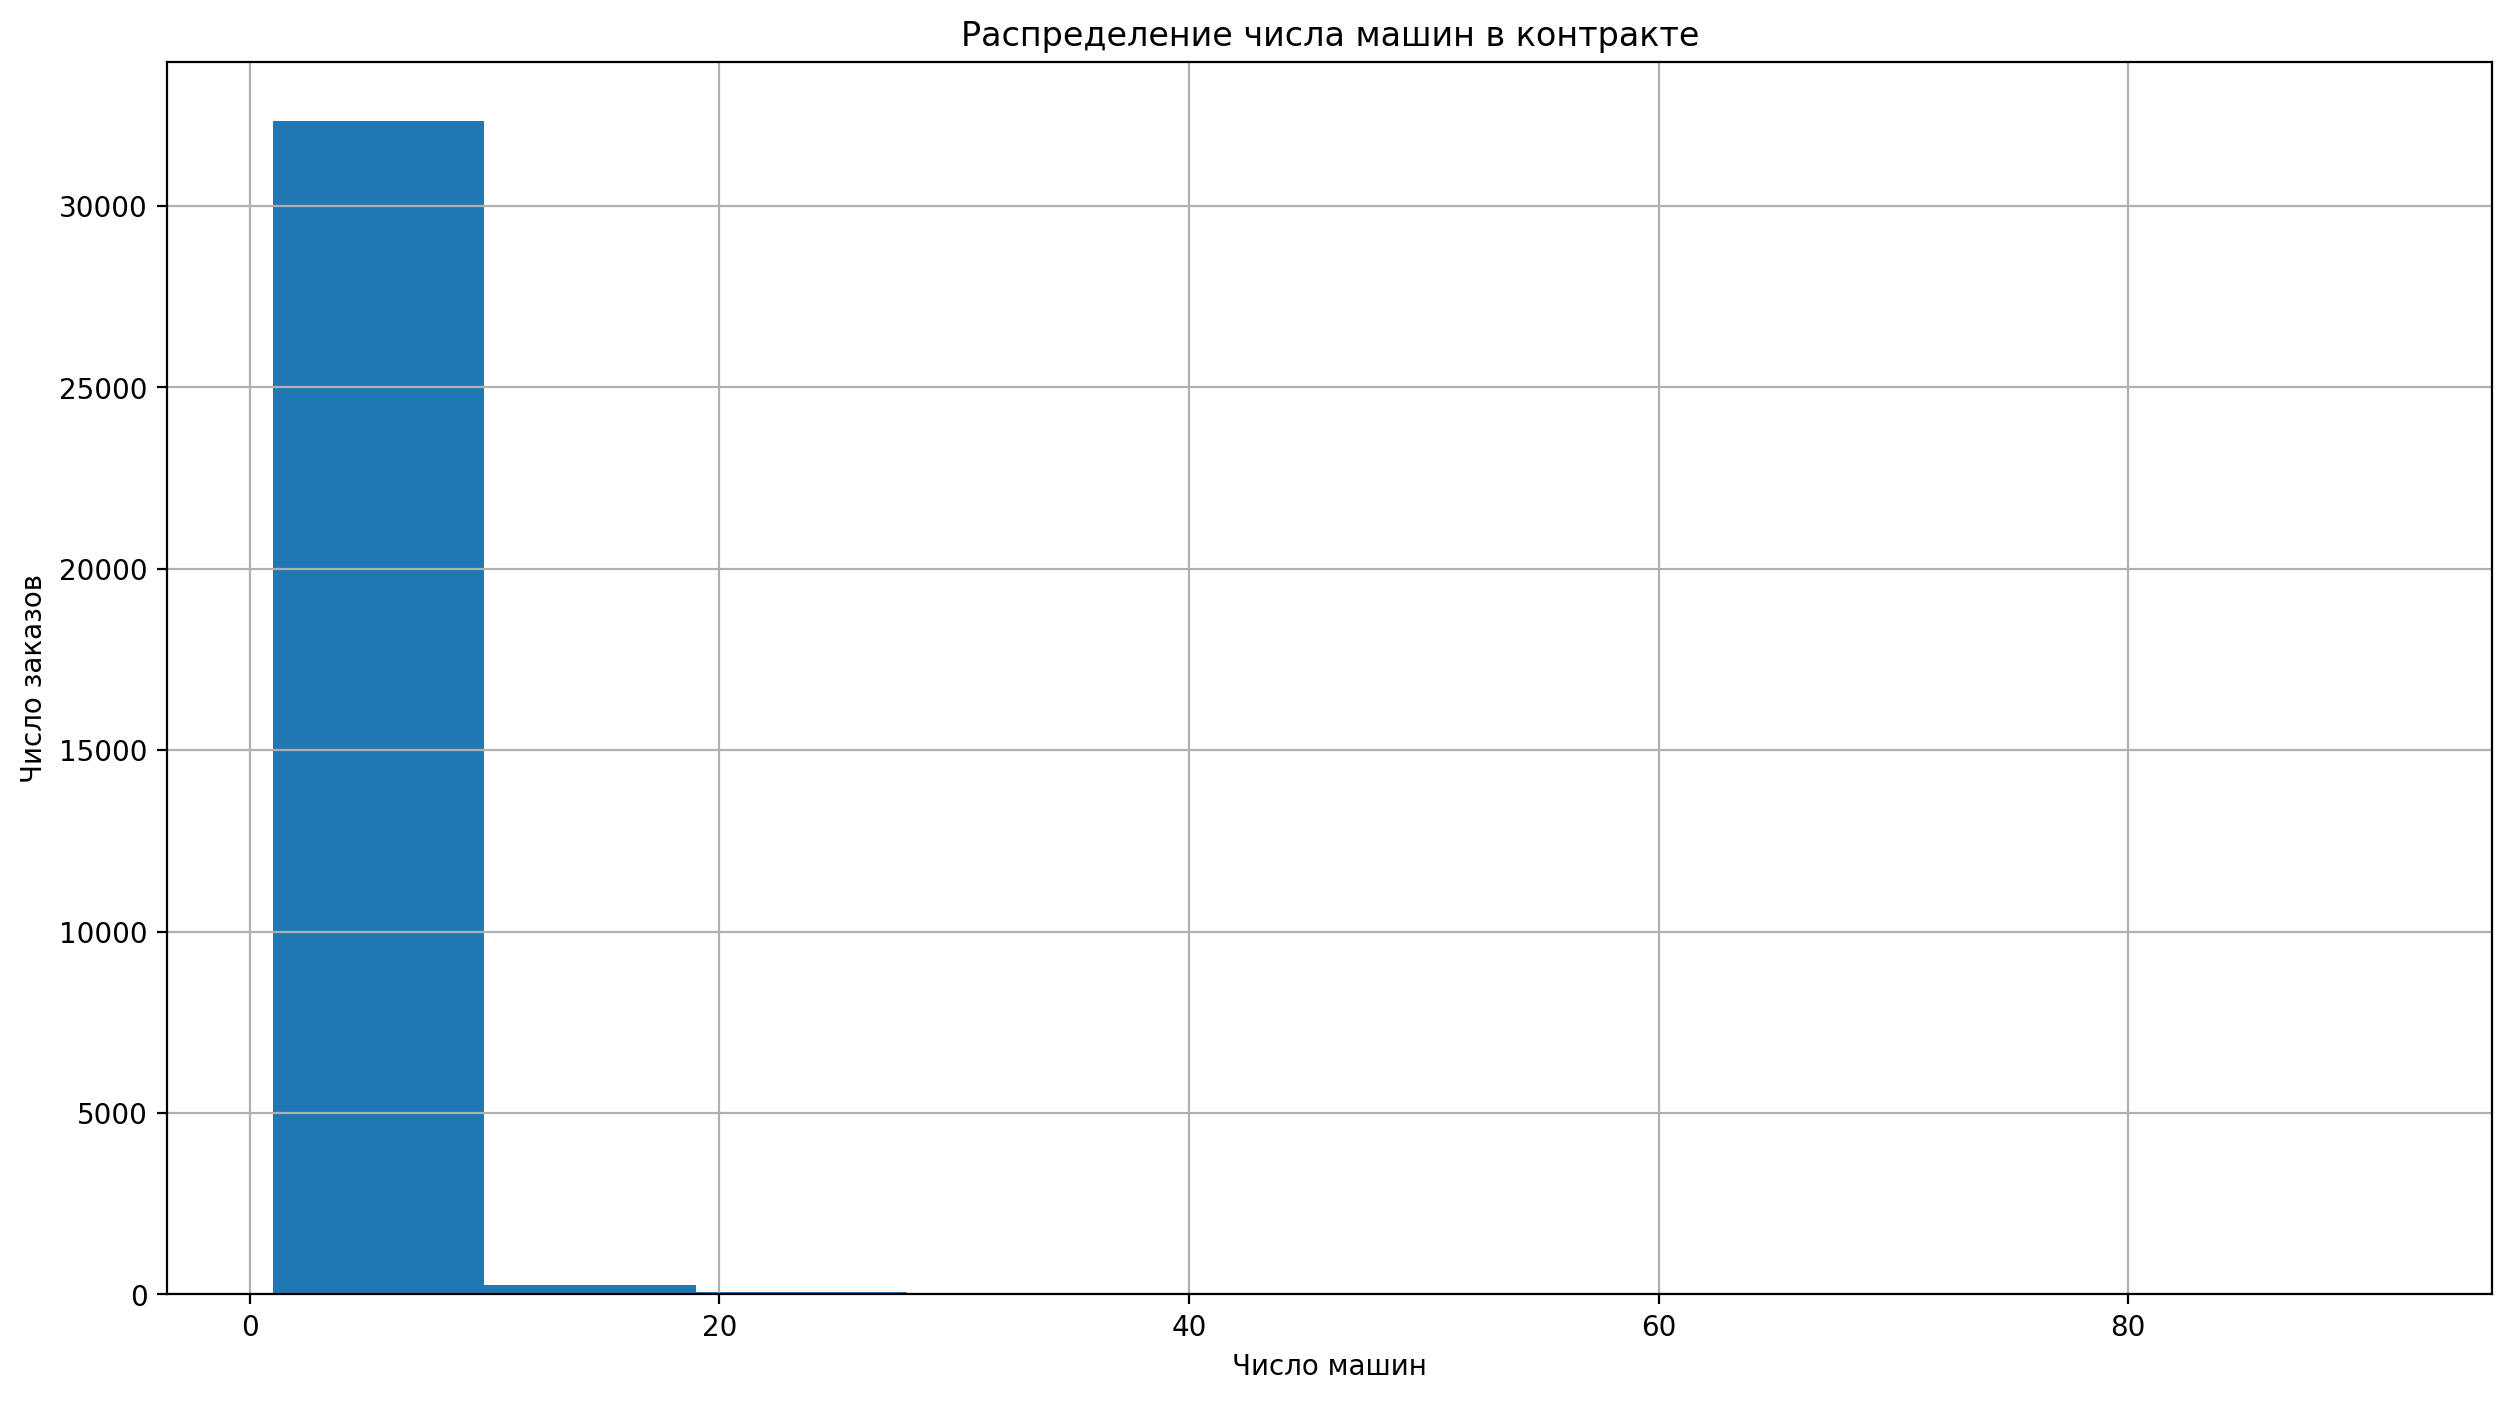

In [39]:
# Посмотрим распределение числа машин в заказах.

data['Количество'].hist()
plt.title('Распределение числа машин в контракте')
plt.ylabel('Число заказов')
plt.xlabel('Число машин');

Логично, что в абсолютном большинстве контрактов один автомобиль: более одного, скорее всего, покупают юридические лица. Для детального анализа лучше отдельно смотреть данные по покупкам одного автомобиля и более одного.
На этапе анализа можно будет разделить на два датасета.

In [40]:
# Посчитаем 95-го и 99-го перцентилей числа машин в контракте по всем контрактам.

np.percentile(data.loc[~data['Количество'].isna(), 'Количество'], [95, 99])

array([ 2., 10.])

In [41]:
# Посчитаем 95-го и 99-го перцентилей числа машин в контракте по контрактам с более чем одним автомобилем.

np.percentile(data.loc[data['Количество'] > 1, 'Количество'], [95, 99])

array([18.  , 30.94])

Заметная разница для оценкци выбросов — посмотрим, сколько контарктов с числом машин более 30.

In [42]:
data.loc[data['Количество']>30, 'Год'].count()

25

Таких контрактов немного — можно удалить.

In [43]:
# Удалим контракты с числом машин более 30.

print(data['Год'].count())
data = data.loc[~(data['Количество']>30)]
data['Год'].count()

32695


32670

<a id='18-bullet'></a>

### Обработка столбца "Цена, USD"

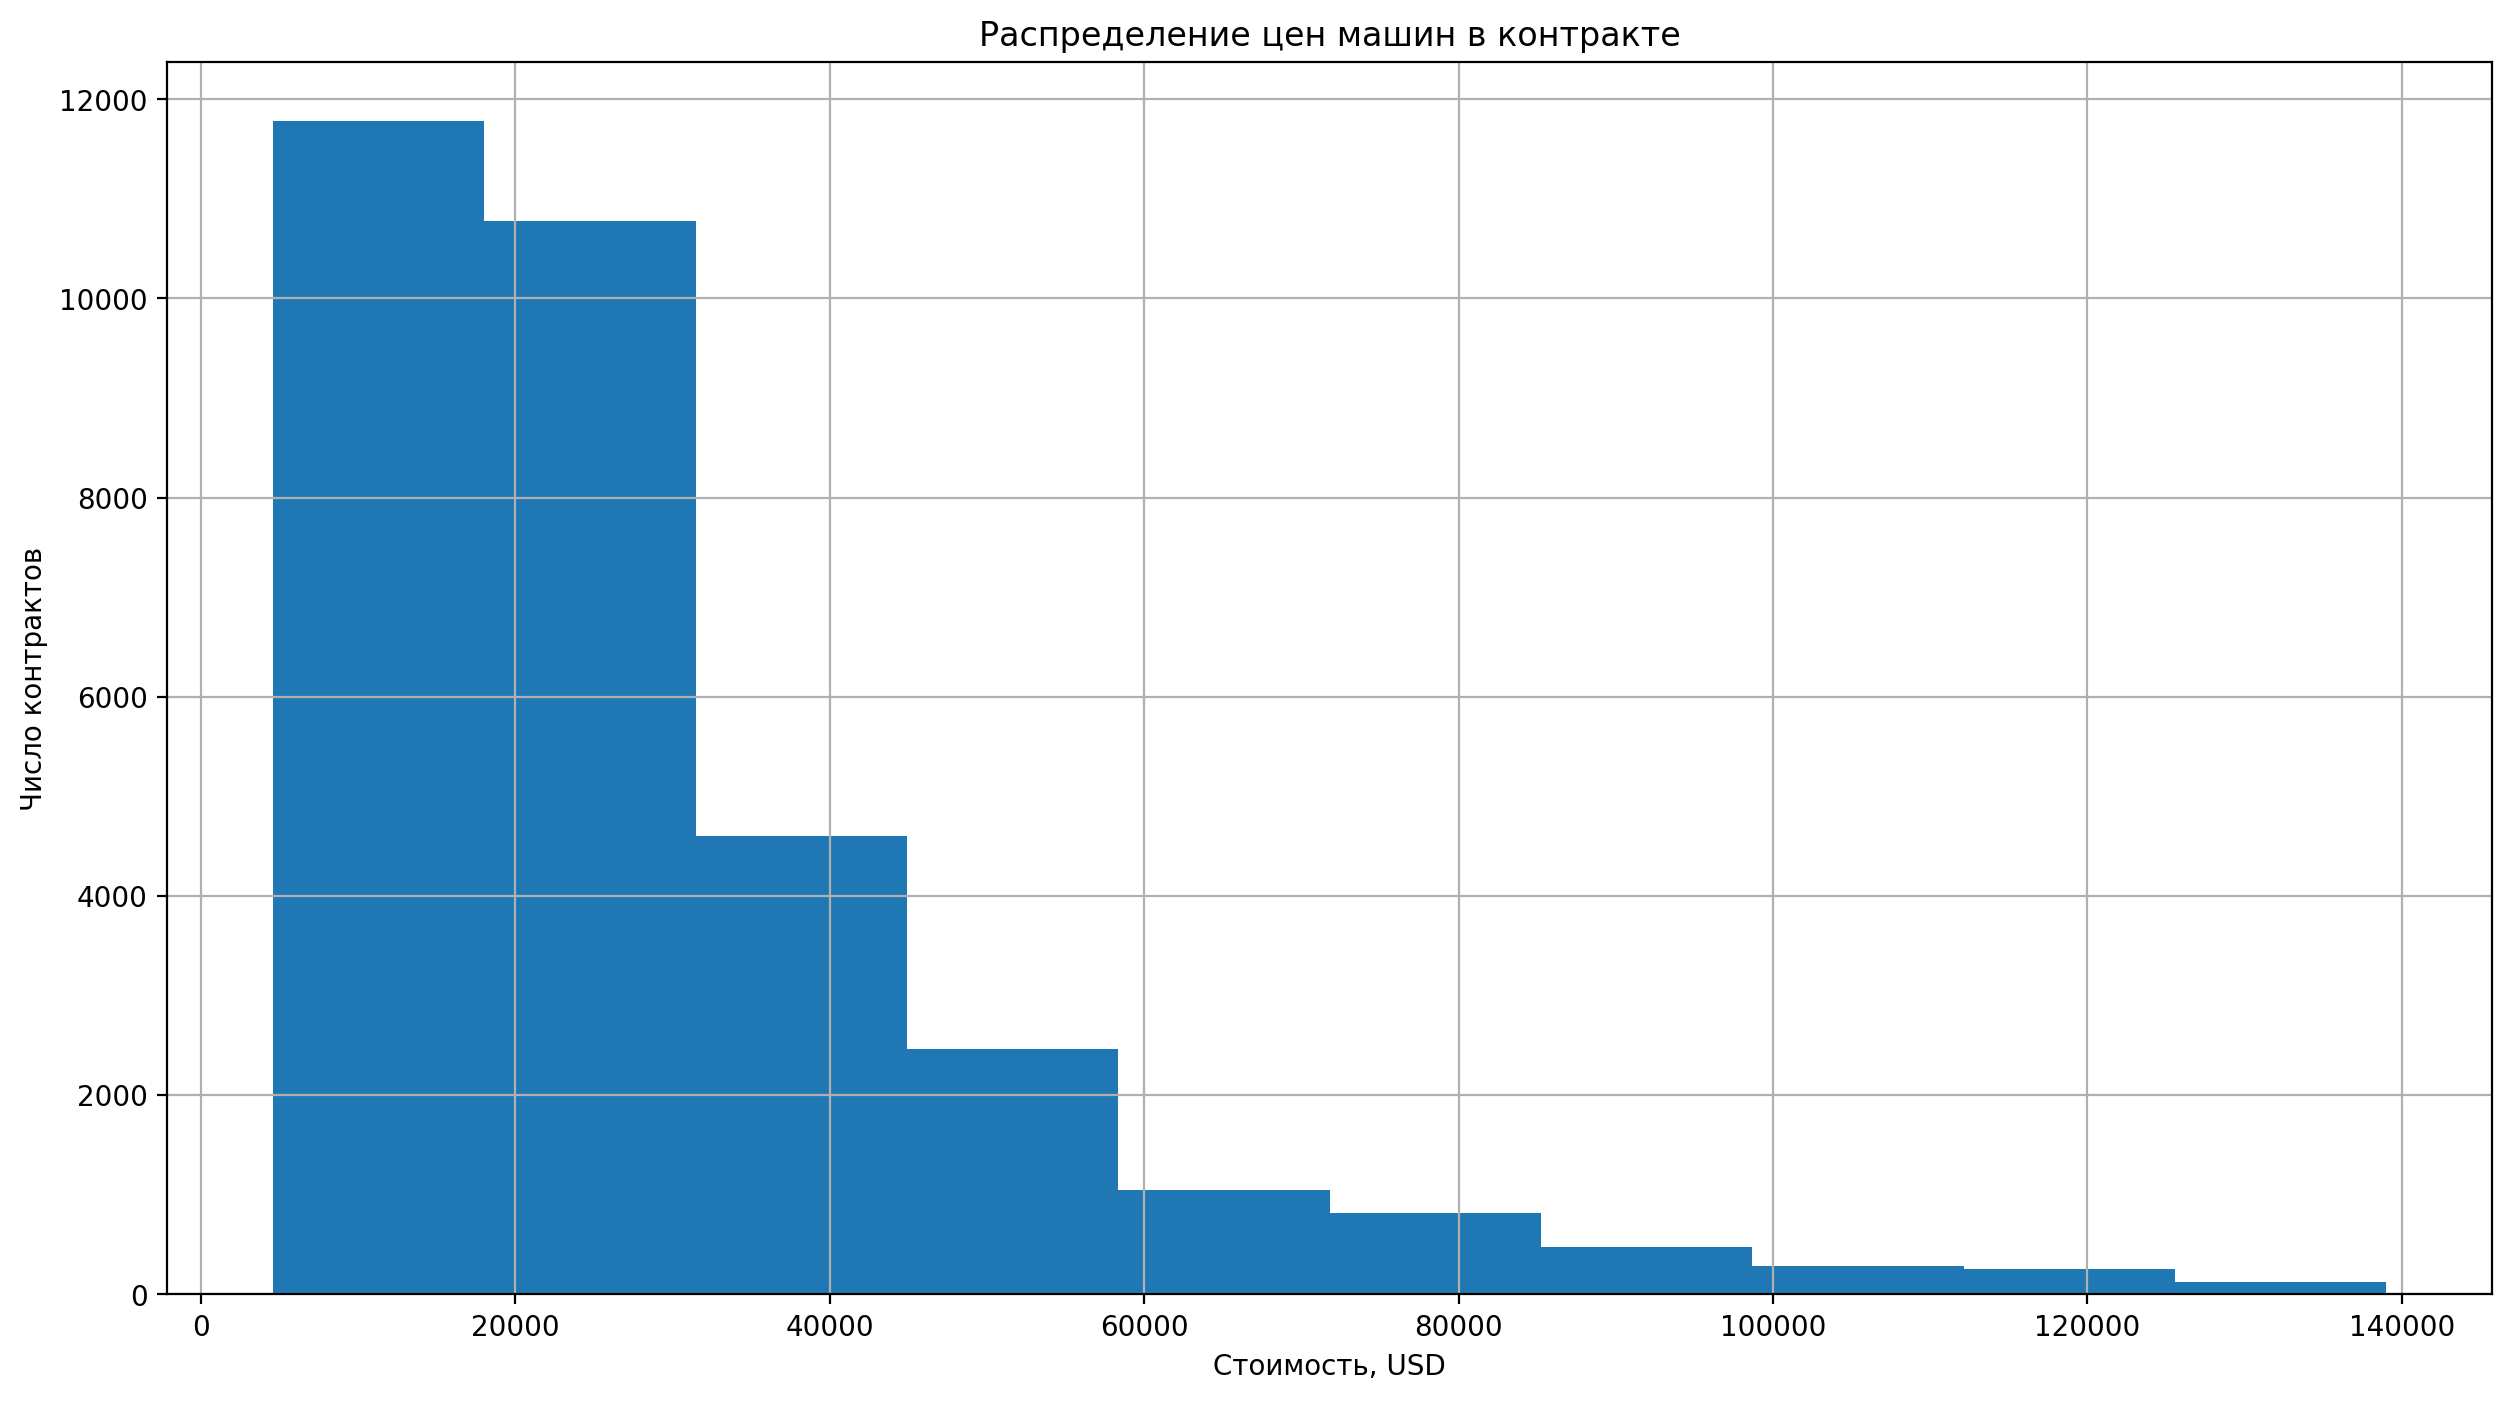

In [44]:
# Посмотрим распределение цена на автомобили.

data['Цена, USD'] = data['Цена, USD'].astype(float)
data.loc[data['Цена, USD'] < 140000, 'Цена, USD'].hist()
plt.title('Распределение цен машин в контракте')
plt.ylabel('Число контрактов')
plt.xlabel('Стоимость, USD');

Больлше всего машин стоимостью до 20 тыс. долларов.

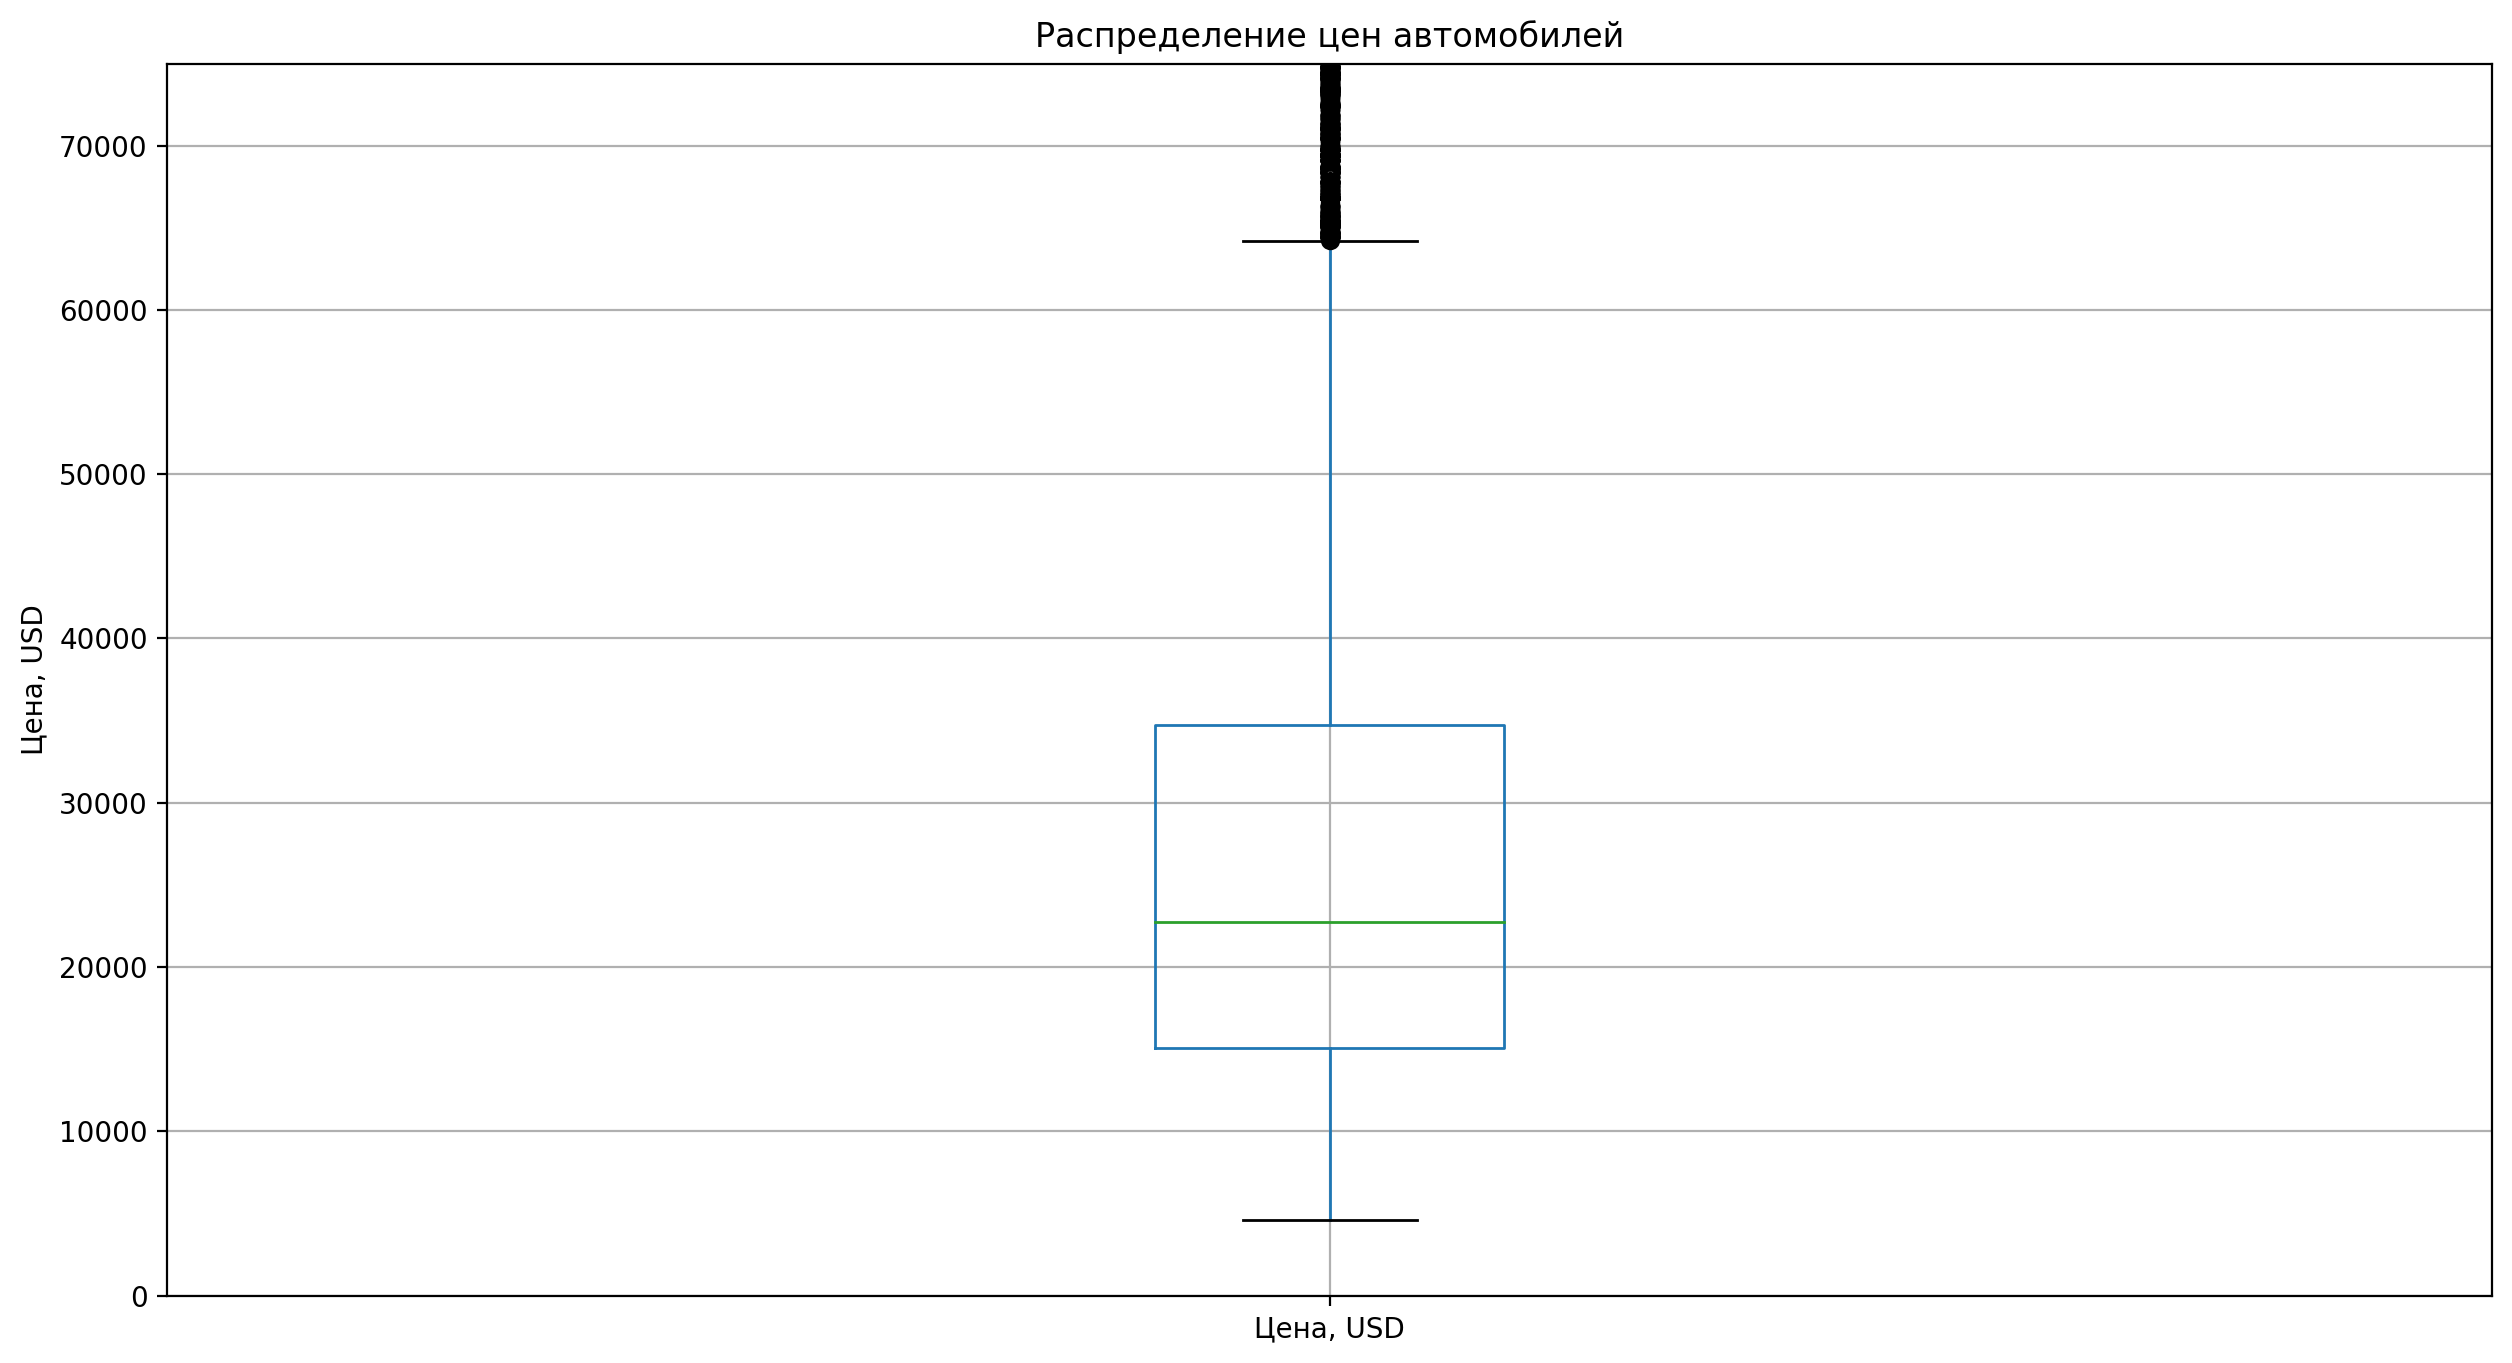

In [45]:
# Посмотрим распределение цен с помощью boxplot.

ax = data.boxplot('Цена, USD')
ax.set_ylim(0, 75000)
ax.set_title('Распределение цен автомобилей')
ax.set_ylabel('Цена, USD');

Визуально, цену больше 65 тыс. долларов можно считать выбросом, но их довольно много.

In [46]:
# Посчитаем 95-го и 99-го перцентилей цен машин.

np.percentile(data.loc[~data['Цена, USD'].isna(), 'Цена, USD'], [95, 99])

array([ 77335.59601563, 114348.34530256])

In [47]:
# Посмотрим, какие авто дороже 115 тыс. долларов.

data.loc[data['Цена, USD'] > 115000].groupby(['Бренд', 'Модель']).size()

Бренд                 Модель        
ANKAI                 HFF6111K10EV21      5
Audi                  A8                  8
BMW                   5 серия             4
                      7 серия             3
Cadillac              Escalade            4
Daewoo                ВС 211 МА           1
Hyundai Truck & Bus   Universe            6
Land Rover            Range Rover        53
Lexus                 LC                  3
                      LS                 13
                      LX                160
MAN                   R 61                1
                      TG                  1
Mercedes-Benz         G-Class             5
                      Maybach S500        1
                      S-Class             4
Mercedes-Benz Trucks  Tourismo            1
Porsche               911 Carrera S       2
                      Cayenne             5
                      Panamera            9
Rolls Royce           Ghost               1
Scania                G-Series         

Поиск в интеренте показывает, что высокие цены на данные машины корректны, но необходима консультация со специалистом по авторынку. 

Поскольку наша основная задача подготовка данных, удалять информацию о каких-то автомобилях на основании их высокой цены (скорее всего, коррктной) неправильно. Лучше на этапе анализа отделить легковые автомобили от грузовиков и автобусов.

In [48]:
# Для удобства сделаем столбец со стоимостью в тысячах долларов.

data['Стоимость, тыс. USD'] = data['Цена, USD'] / 1000

<a id='19-bullet'></a>

### Обработка столбца "Продажа, USD"

In [49]:
# Поскольку общая сумма заказа является произведением числа машин на стоиомость, проверим это,
# добавив погрешность в 1 доллар в каждую сторону.

data['Продажа, USD'] = data['Продажа, USD'].astype(float)
data.loc[(data['Продажа, USD'] > (data['Цена, USD'] * data['Количество']+1)) | 
         (data['Продажа, USD'] < (data['Цена, USD'] * data['Количество']-1))]

Empty DataFrame
Columns: [Год, Месяц, Компания, Бренд, Модель, Год выпуска, Страна-производитель, Вид топлива, Объём двиг, л,, Коробка передач, Тип привода, Регион, Количество, Цена, USD, Продажа, USD, Сегментация 2013, Класс 2013, Сегментация Eng, Месяц_продажи, alpha3, Код топлива, Стоимость, тыс. USD]
Index: []

Ошибок нет.

In [50]:
# Для удобства сделаем столбец с суммой контаркта в тысячах долларов.

data['Сумма, тыс. USD'] = data['Продажа, USD'] / 1000

<a id='20-bullet'></a>

### Обработка столбца "Сегментация 2013"

In [51]:
# Проверим столбец с сегментацией.

data['Сегментация 2013'] = data['Сегментация 2013'].str.rstrip()
data['Сегментация 2013'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

Данные корректны.

<a id='21-bullet'></a>

### Обработка столбца "Класс 2013"

In [52]:
# Проверим столбец с классом.

data['Класс 2013'] = data['Класс 2013'].str.rstrip()
data['Класс 2013'].unique()

array(['C класс', 'D класс', 'Спортивные автомобили', 'E класс',
       'F класс', 'Среднеразмерные SUV', 'Стандартные SUV', 'B класс',
       'Компактные SUV', 'Субкомпактные SUV', 'Большие автобусы',
       'Микроавтобусы', 'Малотоннажные грузовики',
       'Крупнотоннажные грузовики', 'Развозные автомобили',
       'Среднетоннажные грузовики', 'Полноразмерный Минивэн',
       'Средние автобусы', 'Полноразмерные SUV', 'Pick-ups', 'A класс',
       'Компактвэн'], dtype=object)

Данные корректны.

<a id='22-bullet'></a>

### Поиск дубликатов

In [53]:
# Проверим на наличие дубликатов.

data.duplicated().sum()

17048

При автоматическом поиске большое число дубликатов, посмотрим на них.

In [54]:
# Посмотрим на строки, воспринимаемые как дубликаты.

data[data.duplicated()]

Год   Месяц     Компания  Бренд  Модель  Год выпуска  \
16     2019  01.01.  Mercur Auto   Audi      A6         2017   
19     2019  01.01.  Mercur Auto   Audi      A6         2017   
37     2019  01.04.  Mercur Auto   Audi      A6         2017   
45     2019  01.08.  Mercur Auto   Audi      A6         2017   
51     2019  01.09.  Mercur Auto   Audi      A6         2017   
...     ...     ...          ...    ...     ...          ...   
32845  2019  01.08.   Allur Auto    Jac     N56         2018   
32847  2019  01.09.     ТК КАМАЗ  KAMAZ  АКН-10         2017   
32848  2019  01.09.     ТК КАМАЗ  KAMAZ  АКН-10         2017   
32849  2019  01.09.     ТК КАМАЗ  KAMAZ  АКН-10         2017   
32850  2019  01.09.     ТК КАМАЗ  KAMAZ  АКН-10         2017   

       Страна-производитель Вид топлива  Объём двиг, л, Коробка передач  \
16                 Германия      Бензин             2.0            АКПП   
19                 Германия      Бензин             2.0            АКПП   
37                 Германия      Бензин             2.0            АКПП   
45                 Германия      Бензин             2.0            АКПП   
51                 Германия      Бензин             2.0            АКПП   
...                     ...         ...             ...             ...   
32845  Республика Казахстан      Дизель             2.8            МКПП   
32847  Российская Федерация      Дизель             NaN            МКПП   
32848  Российская Федерация      Дизель             NaN            МКПП   
32849  Российская Федерация      Дизель             NaN            МКПП   
32850  Российская Федерация      Дизель             NaN            МКПП   

      Тип привода    Регион  Количество     Цена, USD  Продажа, USD  \
16            4WD  Костанай           1  42878.315840  42878.315840   
19            4WD  Костанай           1  42268.471584  42268.471584   
37            4WD    Алматы           1  52351.506492  52351.506492   
45            4WD    Алматы           1  44298.014895  44298.014895   
51            4WD    Алматы           1  46839.064341  46839.064341   
...           ...       ...         ...           ...           ...   
32845         2WD  Костанай           1   9995.048713   9995.048713   
32847         NaN    Астана           1  63359.976443  63359.976443   
32848         NaN    Астана           1  63359.976443  63359.976443   
32849         NaN    Астана           1  63359.976443  63359.976443   
32850         NaN    Астана           1  63359.976443  63359.976443   

              Сегментация 2013                 Класс 2013 Сегментация Eng  \
16         Легковые автомобили                    E класс               E   
19         Легковые автомобили                    E класс               E   
37         Легковые автомобили                    E класс               E   
45         Легковые автомобили                    E класс               E   
51         Легковые автомобили                    E класс               E   
...                        ...                        ...             ...   
32845  Коммерческие автомобили    Малотоннажные грузовики               N   
32847  Коммерческие автомобили  Крупнотоннажные грузовики               O   
32848  Коммерческие автомобили  Крупнотоннажные грузовики               O   
32849  Коммерческие автомобили  Крупнотоннажные грузовики               O   
32850  Коммерческие автомобили  Крупнотоннажные грузовики               O   

      Месяц_продажи alpha3 Код топлива  Стоимость, тыс. USD  Сумма, тыс. USD  
16       2019-01-01    DEU           F            42.878316        42.878316  
19       2019-01-01    DEU           F            42.268472        42.268472  
37       2019-04-01    DEU           F            52.351506        52.351506  
45       2019-08-01    DEU           F            44.298015        44.298015  
51       2019-09-01    DEU           F            46.839064        46.839064  
...             ...    ...         ...                  ...              ...  
32845  

Продажа одних и тех же моделей по одной цене воспринимаются как дубликаты. 

Заказчик дополнительно сообщил, что дубликаты в базе точно отсутствуют.

<a id='23-bullet'></a>

### Обработка пропусков

In [55]:
# Еще раз посмотрим информацию о датасете.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32670 entries, 0 to 32853
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Год                   32670 non-null  object        
 1   Месяц                 32670 non-null  object        
 2   Компания              32670 non-null  object        
 3   Бренд                 32670 non-null  object        
 4   Модель                32670 non-null  object        
 5   Год выпуска           32670 non-null  int64         
 6   Страна-производитель  32670 non-null  object        
 7   Вид топлива           31800 non-null  object        
 8   Объём двиг, л,        30831 non-null  float64       
 9   Коробка передач       31477 non-null  object        
 10  Тип привода           30447 non-null  object        
 11  Регион                32670 non-null  object        
 12  Количество            32670 non-null  int64         
 13  Цена, USD       

Есть пропуски в столбцах "Вид топлива", "Объём двиг, л,", "Коробка передач", "Тип привода" и "Код топлива".
Посчитаем, сколько строк с пропусками в данных столбцах.

In [56]:
# Посчитаем абсолютная и относительное число строк с пропусками.

print('Абсолютное число: ', data.loc[(data['Вид топлива'].isna()) | (data['Объём двиг, л,'].isna()) |
         (data['Коробка передач'].isna()) | (data['Тип привода'].isna()) |
         (data['Код топлива'].isna()), 'Год'].count())
print('Доля строк с пропусками: ', round(((data.loc[(data['Вид топлива'].isna()) |
        (data['Объём двиг, л,'].isna()) | (data['Коробка передач'].isna()) | (data['Тип привода'].isna()) |
         (data['Код топлива'].isna()), 'Год'].count()) / data['Год'].count())*100), ' %')

Абсолютное число:  2589
Доля строк с пропусками:  8  %


Число строк с пропусками значительное, но допустимое для удаления.

In [57]:
# Удалим строки с пропусками.

print(data['Год'].count())
data = data.dropna(subset=['Вид топлива', 'Объём двиг, л,', 'Коробка передач', 'Тип привода', 'Код топлива'])
data['Год'].count()

32670


30081

<a id='24-bullet'></a>

### Проверка числа и доли удаленных данных

In [58]:
# Проверим, сколько данных потеряли при предобработке.

print('Абсолютное число удаленных строк: ', data_start['Год'].count() - data['Год'].count())
print('Доля удаленных строк: ', round(((data_start['Год'].count() - data['Год'].count()) /
                                         data_start['Год'].count()) * 100), ' %')

Абсолютное число удаленных строк:  2773
Доля удаленных строк:  8  %


При предобработке удалили менее 10 % данных — уложились в допустимые пределы.

In [59]:
# Еще раз проверим число данных и типы данных по стогбцам.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30081 entries, 1 to 32853
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Год                   30081 non-null  object        
 1   Месяц                 30081 non-null  object        
 2   Компания              30081 non-null  object        
 3   Бренд                 30081 non-null  object        
 4   Модель                30081 non-null  object        
 5   Год выпуска           30081 non-null  int64         
 6   Страна-производитель  30081 non-null  object        
 7   Вид топлива           30081 non-null  object        
 8   Объём двиг, л,        30081 non-null  float64       
 9   Коробка передач       30081 non-null  object        
 10  Тип привода           30081 non-null  object        
 11  Регион                30081 non-null  object        
 12  Количество            30081 non-null  int64         
 13  Цена, USD       

Пропусков нет, типы данных корректны.

## Анализ данных

<a id='25-bullet'></a>

### Наиболее популярные марки

In [60]:
# Сгруппируем данные по брендам по числу проданных машин по всем данным.

data.groupby('Бренд')['Количество'].sum().reset_index().sort_values(by='Количество', ascending=False).head(15)

Бренд  Количество
35      Toyota        9374
16        Lada        8733
9      Hyundai        5703
7          GAZ        2111
28       Ravon        1727
15         Kia        1701
25      Nissan        1647
36         UAZ        1063
18       Lexus        1051
14         Jac         984
4    Chevrolet         727
19       Lifan         566
37  Volkswagen         558
29     Renault         558
33      Subaru         520

In [61]:
# Сгруппируем данные по брендам по стоимости проданных машин по всем данным.

(
data.groupby('Бренд')['Сумма, тыс. USD'].sum().round().reset_index()
    .sort_values(by='Сумма, тыс. USD', ascending=False).head(15)
)

Бренд  Сумма, тыс. USD
35      Toyota         383875.0
9      Hyundai         124847.0
16        Lada          85314.0
18       Lexus          83285.0
7          GAZ          40421.0
25      Nissan          36970.0
15         Kia          34700.0
2          BMW          23266.0
33      Subaru          17312.0
28       Ravon          17149.0
36         UAZ          15808.0
14         Jac          13671.0
24  Mitsubishi          13122.0
31       Skoda          12490.0
37  Volkswagen          11451.0

In [62]:
# Сгруппируем данные по брендам по числу проданных машин только по единичным покупкам.

(
data.loc[data['Количество'] == 1].groupby('Бренд')['Количество'].sum()
    .reset_index().sort_values(by='Количество', ascending=False).head()
)

Бренд  Количество
35   Toyota        9374
9   Hyundai        5703
7       GAZ        2111
28    Ravon        1727
18    Lexus        1051

In [63]:
# Сгруппируем данные по брендам по числу проданных машин по контрактам с более чем одним авто.

(
data.loc[data['Количество'] > 1].groupby('Бренд')['Количество'].sum()
    .reset_index().sort_values(by='Количество', ascending=False).head()
)

Бренд  Количество
8     Lada        7893
7      Kia        1366
13  Nissan         993
15   Skoda         354
1      BMW         262

In [64]:
# Сгруппируем данные по брендам по стоимости проданных машин по единичным покупкам.

(
data.loc[data['Количество'] == 1].groupby('Бренд')['Сумма, тыс. USD'].sum().round().reset_index()
    .sort_values(by='Сумма, тыс. USD', ascending=False).head()
)

Бренд  Сумма, тыс. USD
35   Toyota         383875.0
9   Hyundai         124847.0
18    Lexus          83285.0
7       GAZ          40421.0
33   Subaru          17312.0

In [65]:
# Сгруппируем данные по брендам по стоимости проданных машин по контарктам с более чем одним авто.

(
data.loc[data['Количество'] > 1].groupby('Бренд')['Сумма, тыс. USD'].sum().round().reset_index()
    .sort_values(by='Сумма, тыс. USD', ascending=False).head()
)

Бренд  Сумма, тыс. USD
8     Lada          76066.0
7      Kia          27566.0
13  Nissan          20165.0
1      BMW          16850.0
3   Daewoo           8731.0

ТОП-5 брендов по всем продажам
- По числу проданных автомоблией: Toyota (9,4 тыс.), Lada (8,7 тыс.), Hyundai (5,7 тыс.), GAZ (2,1 тыс), Ravon (1,7 тыс.);
- По суммарной стоимости: Toyota (384 млн. USD), Hyundai (125 млн. USD), (Lada 85 млн. USD), Lexus	(83 млн. USD), GAZ (40 млн. USD).

Состав тройки лидеров и по числу проданных машин, и по суммарной стоимости идентичен, Lada и Hyundai лишь меняются местами в силу более высокой стоимости автомобилей Hyundai. GAZ, видимо, самый популярный автомобиль для небольших. перевозок (как грузовых, так и пассажирских).

ТОП-5 брендов среди единичных покупок:
- По числу проданных автомоблией: Toyota	(9,4 тыс.), Hyundai	(5,7 тыс.), GAZ	(2,1 тыс.), Ravon (1,7 тыс.), Lexus	(1 тыс.);
- По суммарной стоимости: Toyota (384 млн. USD), Hyundai (125 млн. USD), Lexus	(83 млн. USD), GAZ (40 млн. USD), Subaru (17  млн. USD).

Среди единичных покупателей Toyota и Hyundai тоже лидируют, причем как в численом выражении, так и в стоимостном. На третьем месте по числу проданных машин GAZ: видимо, люди покупают для малого бизнеса, а по сотоимости на третьем месте Lexus.

ТОП-5 брендов среди конреатов более чем на одни автомобиль:
- По числу проданных автомоблией: Lada	(7,9 тыс.), Kia	(1,4 тыс.), Nissan	(1 тыс.), Skoda	(354), BMW	(262);
- По суммарной стоимости: Lada (76 млн. USD), Kia	(28 млн. USD), Nissan (20 млн. USD), BMW	(17 млн. USD), Daewoo (9  млн. USD).

Lada, Kia и Nissan пользуются популярностью при покупках нескольких автомобилей — скорее всего, значительная часть это для таксопарков, а так же в качестве служебных автомобилей.

<a id='26-bullet'></a>

### Анализ популярности моделей

In [66]:
# Посомтрим наиболее популярные модели у ТОП-3 брендов Toyota, Lada и Hyundai.

(
data.loc[(data['Бренд'] == 'Toyota') | (data['Бренд'] == 'Hyundai') | 
         (data['Бренд'] == 'Lada')].groupby(['Бренд', 'Модель'])['Количество'].sum()
    .reset_index().sort_values(by='Количество', ascending=False).head(10)
)

Бренд    Модель  Количество
18   Toyota     Camry        3440
11     Lada    Granta        2552
9      Lada       4x4        1991
8   Hyundai    Tucson        1890
14     Lada     Vesta        1752
23   Toyota  LC Prado        1489
13     Lada    Largus        1359
25   Toyota      RAV4        1348
0   Hyundai    Accent        1332
1   Hyundai     Creta        1202

Из десяти наиболее популярных моделей пять — кроссоверы и джип, что может говорить о качестве дорог в Казахстане.
Самая попярная модель Toyota — Camry, модель Lada — Granta, модель Hyundai — Tucson.

<a id='27-bullet'></a>

### Суммарные продажи

In [67]:
# Посчиатем продажи по всем контрактам.

print('Общее число проданных машин : ', data['Количество'].sum())
print('Общая сумма продаж: ', round(data['Сумма, тыс. USD'].sum() / 1000), ' млн. USD')

Общее число проданных машин :  39606
Общая сумма продаж:  1013  млн. USD


In [68]:
# Посчиатем продажи по единичным покупкам.

print('Общее число проданных машин : ', data.loc[data['Количество'] == 1, 'Количество'].sum(), '(доля: ',
     round((data.loc[data['Количество'] == 1, 'Количество'].sum() / data['Количество'].sum())*100), '%)')
print('Общая сумма продаж: ', round(data.loc[data['Количество'] == 1,
                                             'Сумма, тыс. USD'].sum() / 1000), ' млн. USD',
     '(доля: ', round((data.loc[data['Количество'] == 1, 'Сумма, тыс. USD'].sum() /
                       data['Сумма, тыс. USD'].sum())*100), '%)')

Общее число проданных машин :  27825 (доля:  70 %)
Общая сумма продаж:  828  млн. USD (доля:  82 %)


In [69]:
# Посчиатем продажи по контрактам с более чем одной машиной.

print('Общее число проданных машин : ', data.loc[data['Количество'] > 1, 'Количество'].sum(),
     '(доля: ',
     round((data.loc[data['Количество'] > 1, 'Количество'].sum() / data['Количество'].sum())*100), '%)')
print('Общая сумма продаж: ', round(data.loc[data['Количество'] > 1, 'Сумма, тыс. USD'].sum() / 1000), ' млн. USD',
     '(доля: ', round((data.loc[data['Количество'] > 1, 'Сумма, тыс. USD'].sum() /
                       data['Сумма, тыс. USD'].sum())*100), '%)')

Общее число проданных машин :  11781 (доля:  30 %)
Общая сумма продаж:  185  млн. USD (доля:  18 %)


За исследуемый период продано почти 40 тыс. автомобилей (из них 70 % по одной штуке в контракте) на 1 миллиард 13 миллионов долларов (82 % по одной штуке).
Основу автомобильного рынка составляют единичные покупки.

<a id='28-bullet'></a>

### Динамика продаж

In [70]:
# Сгруппируем продажи по месяцам.

month_count = data.groupby('Месяц_продажи')['Количество'].sum().reset_index()
month_count

Месяц_продажи  Количество
0    2019-01-01        3111
1    2019-02-01        3897
2    2019-03-01        3982
3    2019-04-01        4278
4    2019-05-01        4808
5    2019-06-01        4923
6    2019-07-01        4632
7    2019-08-01        5040
8    2019-09-01        4935

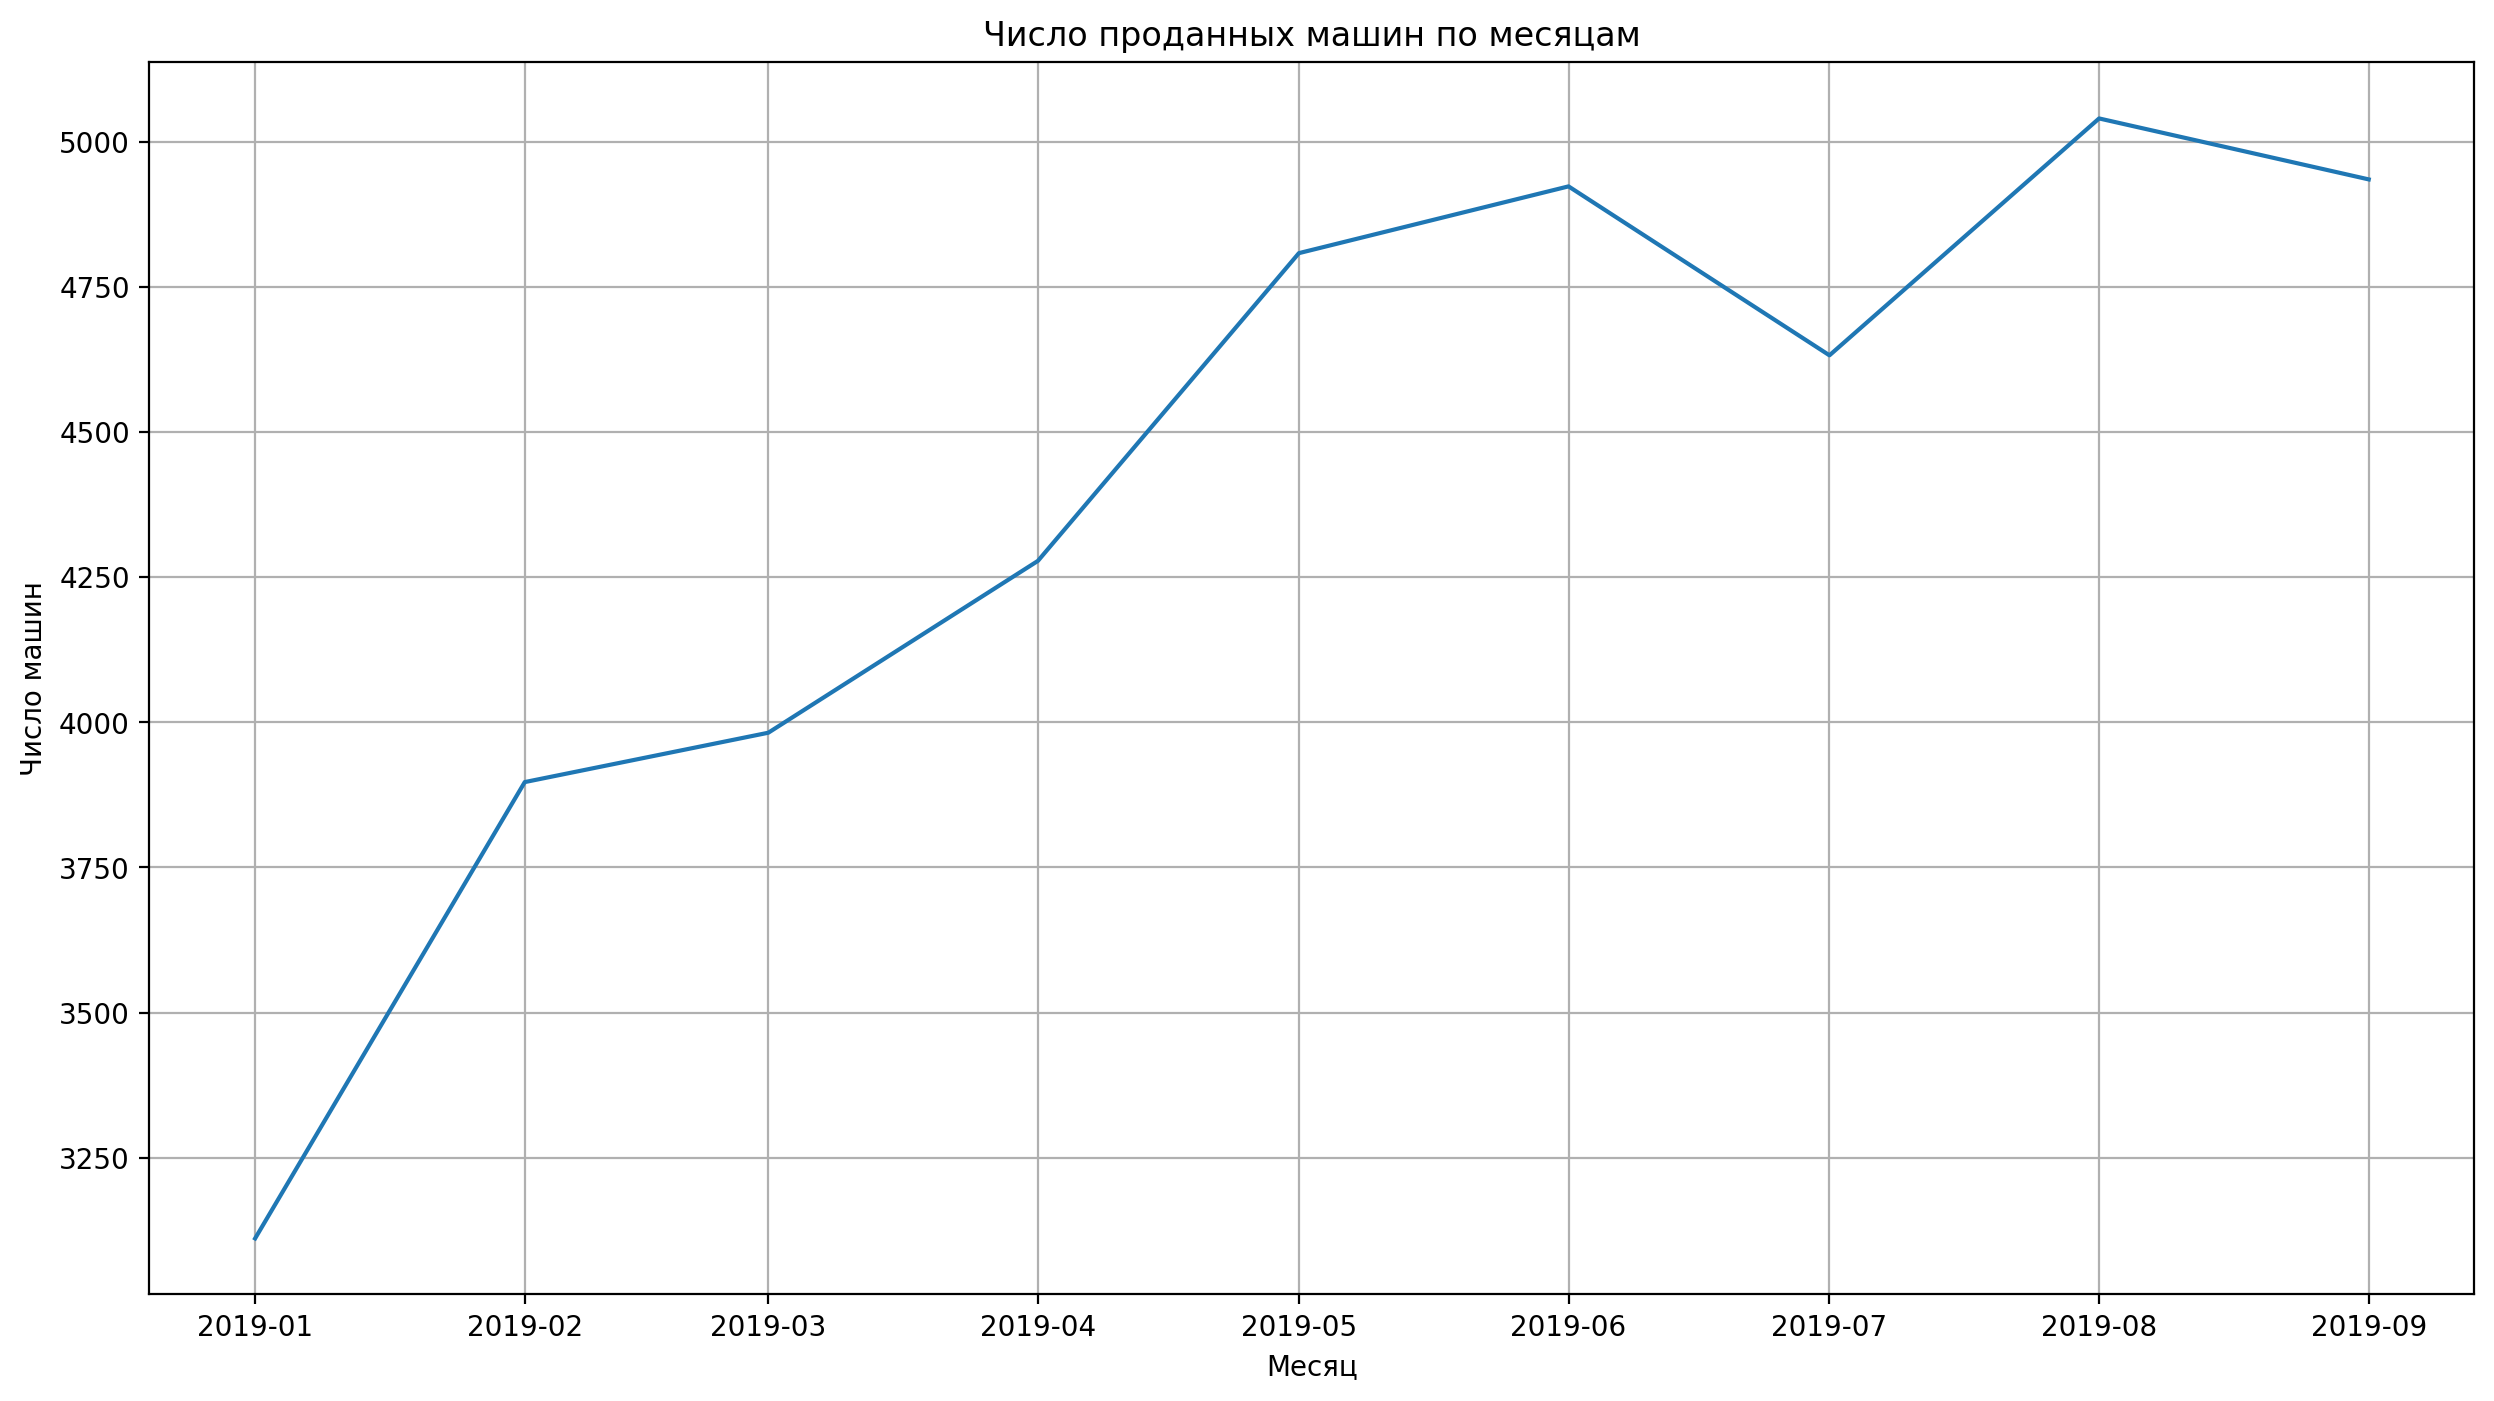

In [71]:
# Визуализируем их.

plt.plot(month_count['Месяц_продажи'], month_count['Количество'])
plt.grid(True)
plt.title('Число проданных машин по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Число машин");

In [72]:
# Сгруппируем суммы продаж по месяцам.

month_sum = data.groupby('Месяц_продажи')['Сумма, тыс. USD'].sum().reset_index()
month_sum['Сумма, млн. USD'] = round(month_sum['Сумма, тыс. USD'] / 1000)
month_sum

Месяц_продажи  Сумма, тыс. USD  Сумма, млн. USD
0    2019-01-01     74641.302416             75.0
1    2019-02-01     93729.035008             94.0
2    2019-03-01     90579.599802             91.0
3    2019-04-01    104285.289361            104.0
4    2019-05-01    129504.124660            130.0
5    2019-06-01    136258.822648            136.0
6    2019-07-01    126480.586266            126.0
7    2019-08-01    130255.448164            130.0
8    2019-09-01    127219.518828            127.0

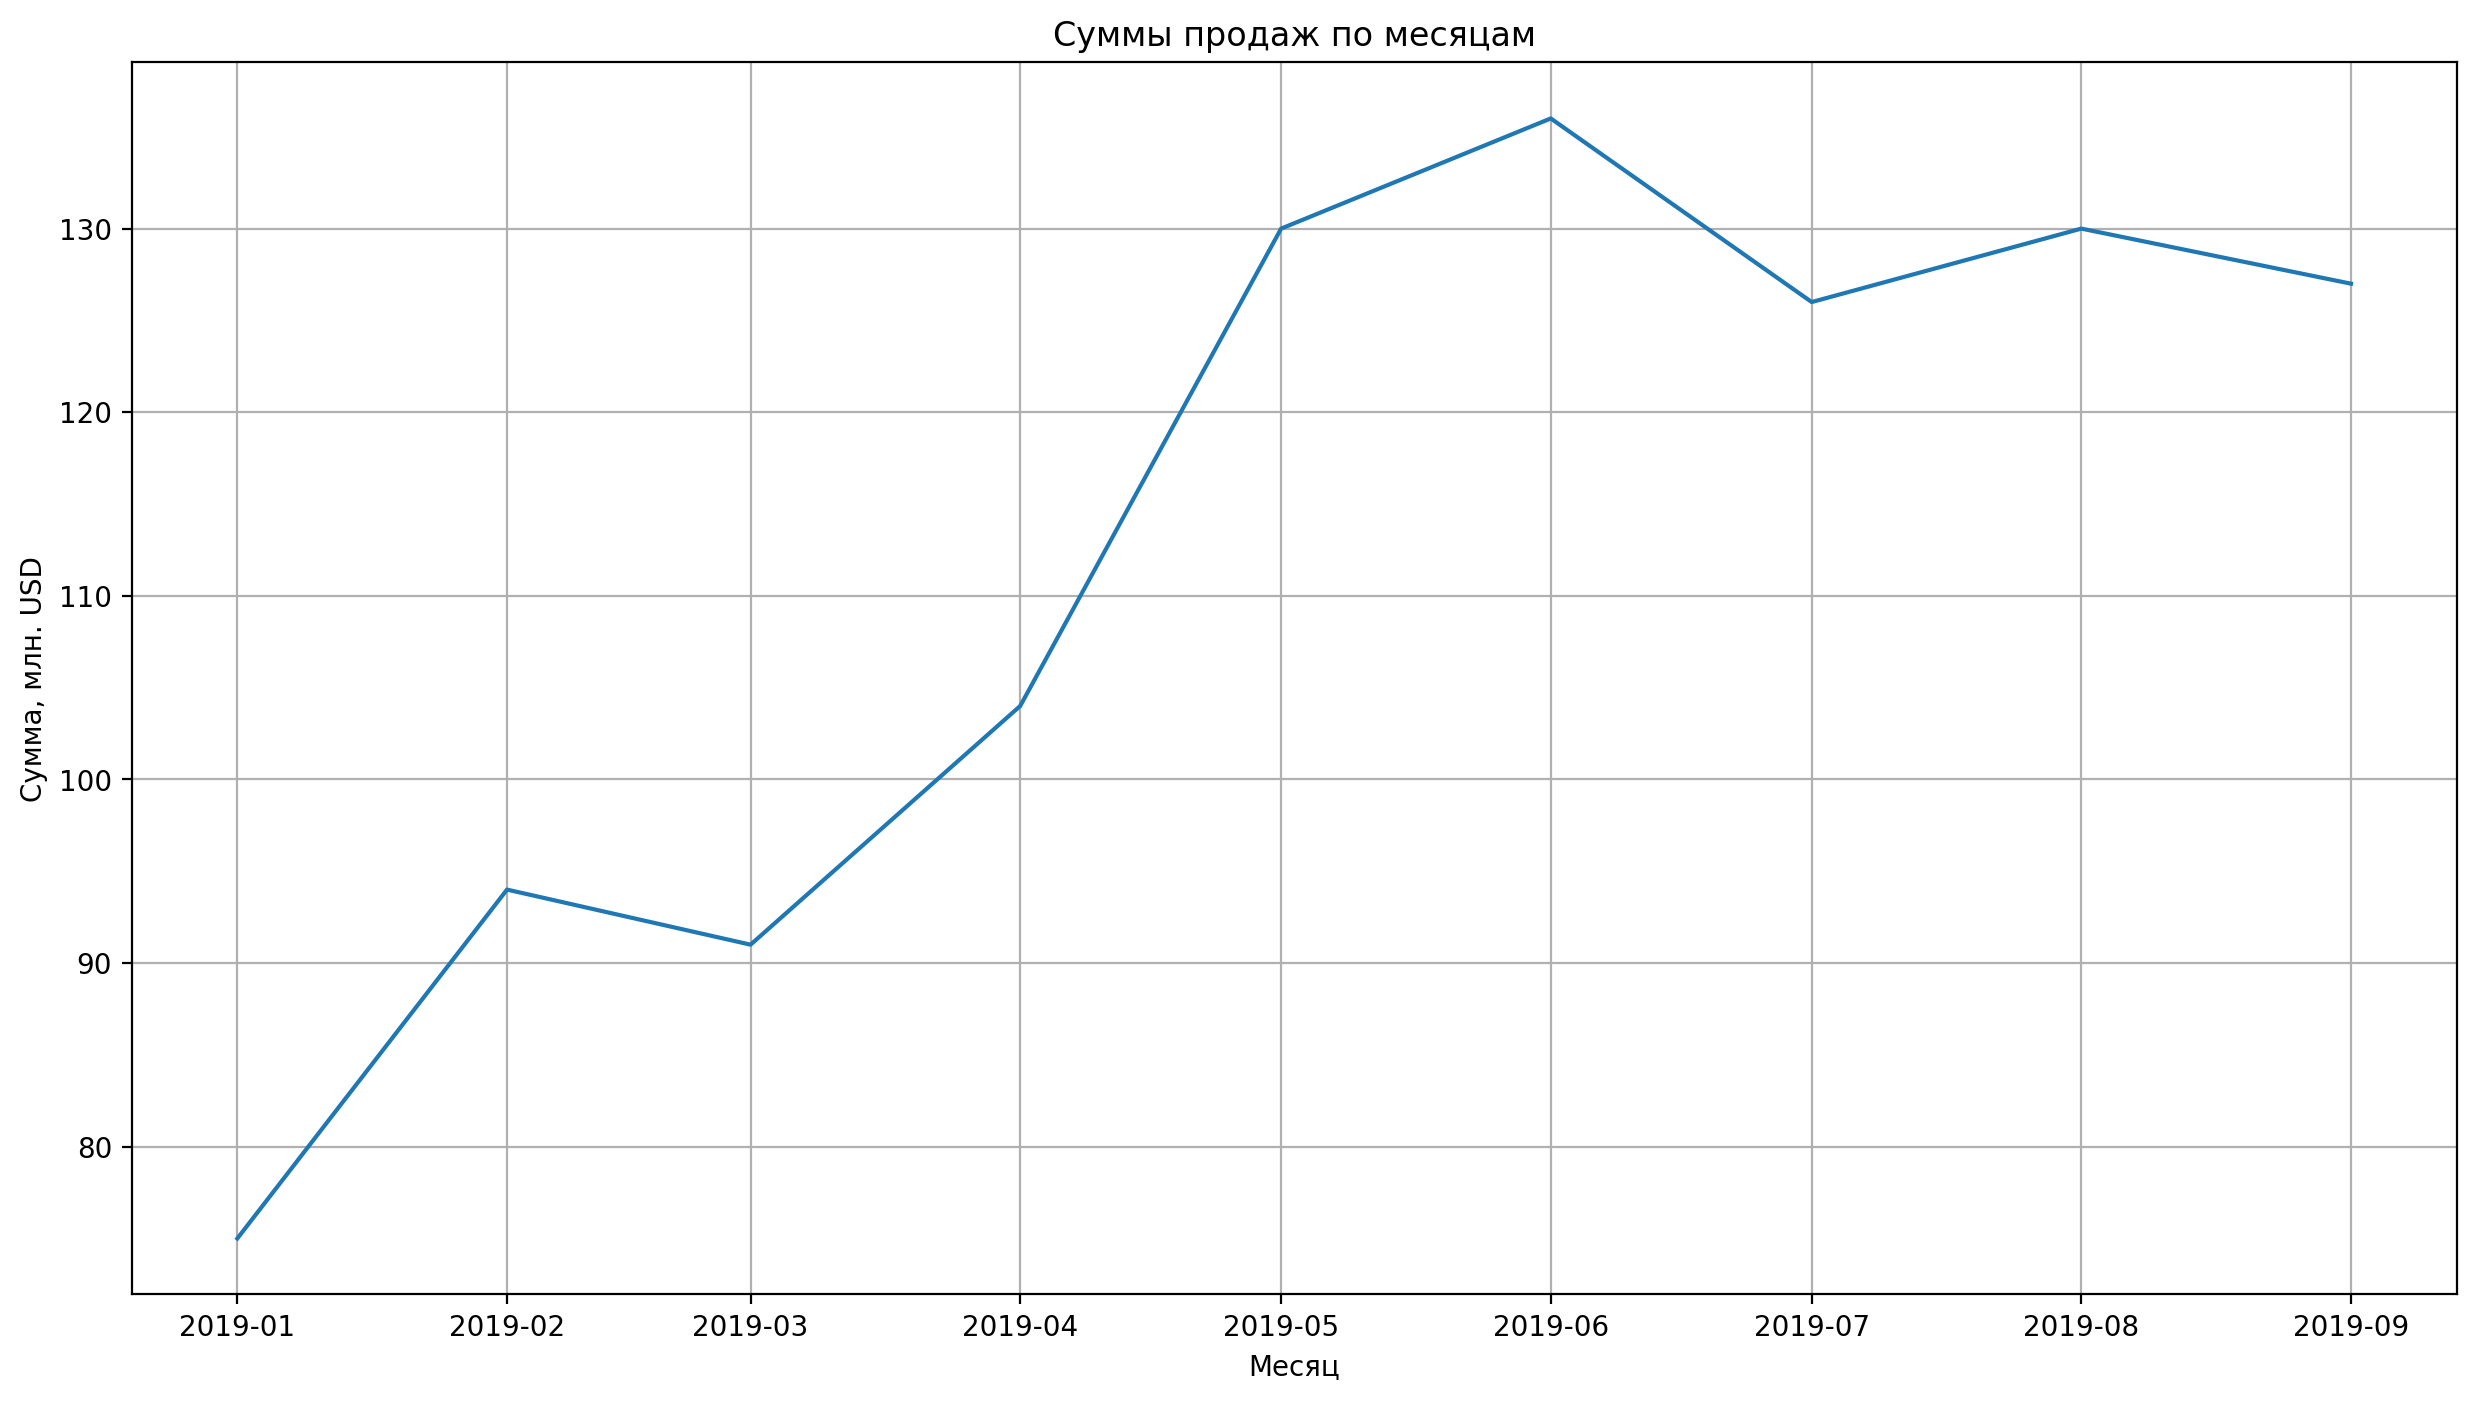

In [73]:
# Визуализируем их.

plt.plot(month_sum['Месяц_продажи'], month_sum['Сумма, млн. USD'])
plt.grid(True)
plt.title('Суммы продаж по месяцам')
plt.xlabel("Месяц")
plt.ylabel("Сумма, млн. USD");

Продажи и в штучном, и в денежном выражении растут в феврале к январю, затем в марте есть некоторое снижение, затем бурный рост весной с замедлением в июне и снижением продаж в июле, в августе восстановление роста, в сентябре снижение.

<a id='29-bullet'></a>

### Динамика продаж по классам, сегментам и виду топлива

In [74]:
# Выеберем ТОП-5 классов по числу проданных машин.

top_classes = (data.groupby('Класс 2013')['Количество'].sum()
               .reset_index().sort_values(by='Количество', ascending=False).head())
top_classes

Класс 2013  Количество
1             B класс       10938
9      Компактные SUV        5246
21  Субкомпактные SUV        3947
4             E класс        3798
2             C класс        3462

In [75]:
# Создадим отдельный солбец с ТОП-классами, остальные обозначим как "Другой".

# Пытался автоматизировать процесс, чтобы если класс входит в top_classes возвращался класс из столбца "Класс 2013",
# если нет, то вписывалось "Другой", но забыл/не нашел как сделать.

data['top_classes'] = 'Другой'
data.loc[data['Класс 2013'] == 'B класс ', 'top_classes'] = 'B класс'
data.loc[data['Класс 2013'] == 'Компактные SUV ', 'top_classes'] = 'Компактные SUV'
data.loc[data['Класс 2013'] == 'Субкомпактные SUV ', 'top_classes'] = 'Субкомпактные SUV'
data.loc[data['Класс 2013'] == 'E класс ', 'top_classes'] = 'E класс'
data.loc[data['Класс 2013'] == 'C класс ', 'top_classes'] = 'C класс'

In [76]:
# Соберем данные по месяцам.

classes = data.groupby(['Месяц_продажи', 'top_classes'])['Количество'].sum().reset_index()
classes.head()

Месяц_продажи top_classes  Количество
0    2019-01-01      Другой        3111
1    2019-02-01      Другой        3897
2    2019-03-01      Другой        3982
3    2019-04-01      Другой        4278
4    2019-05-01      Другой        4808

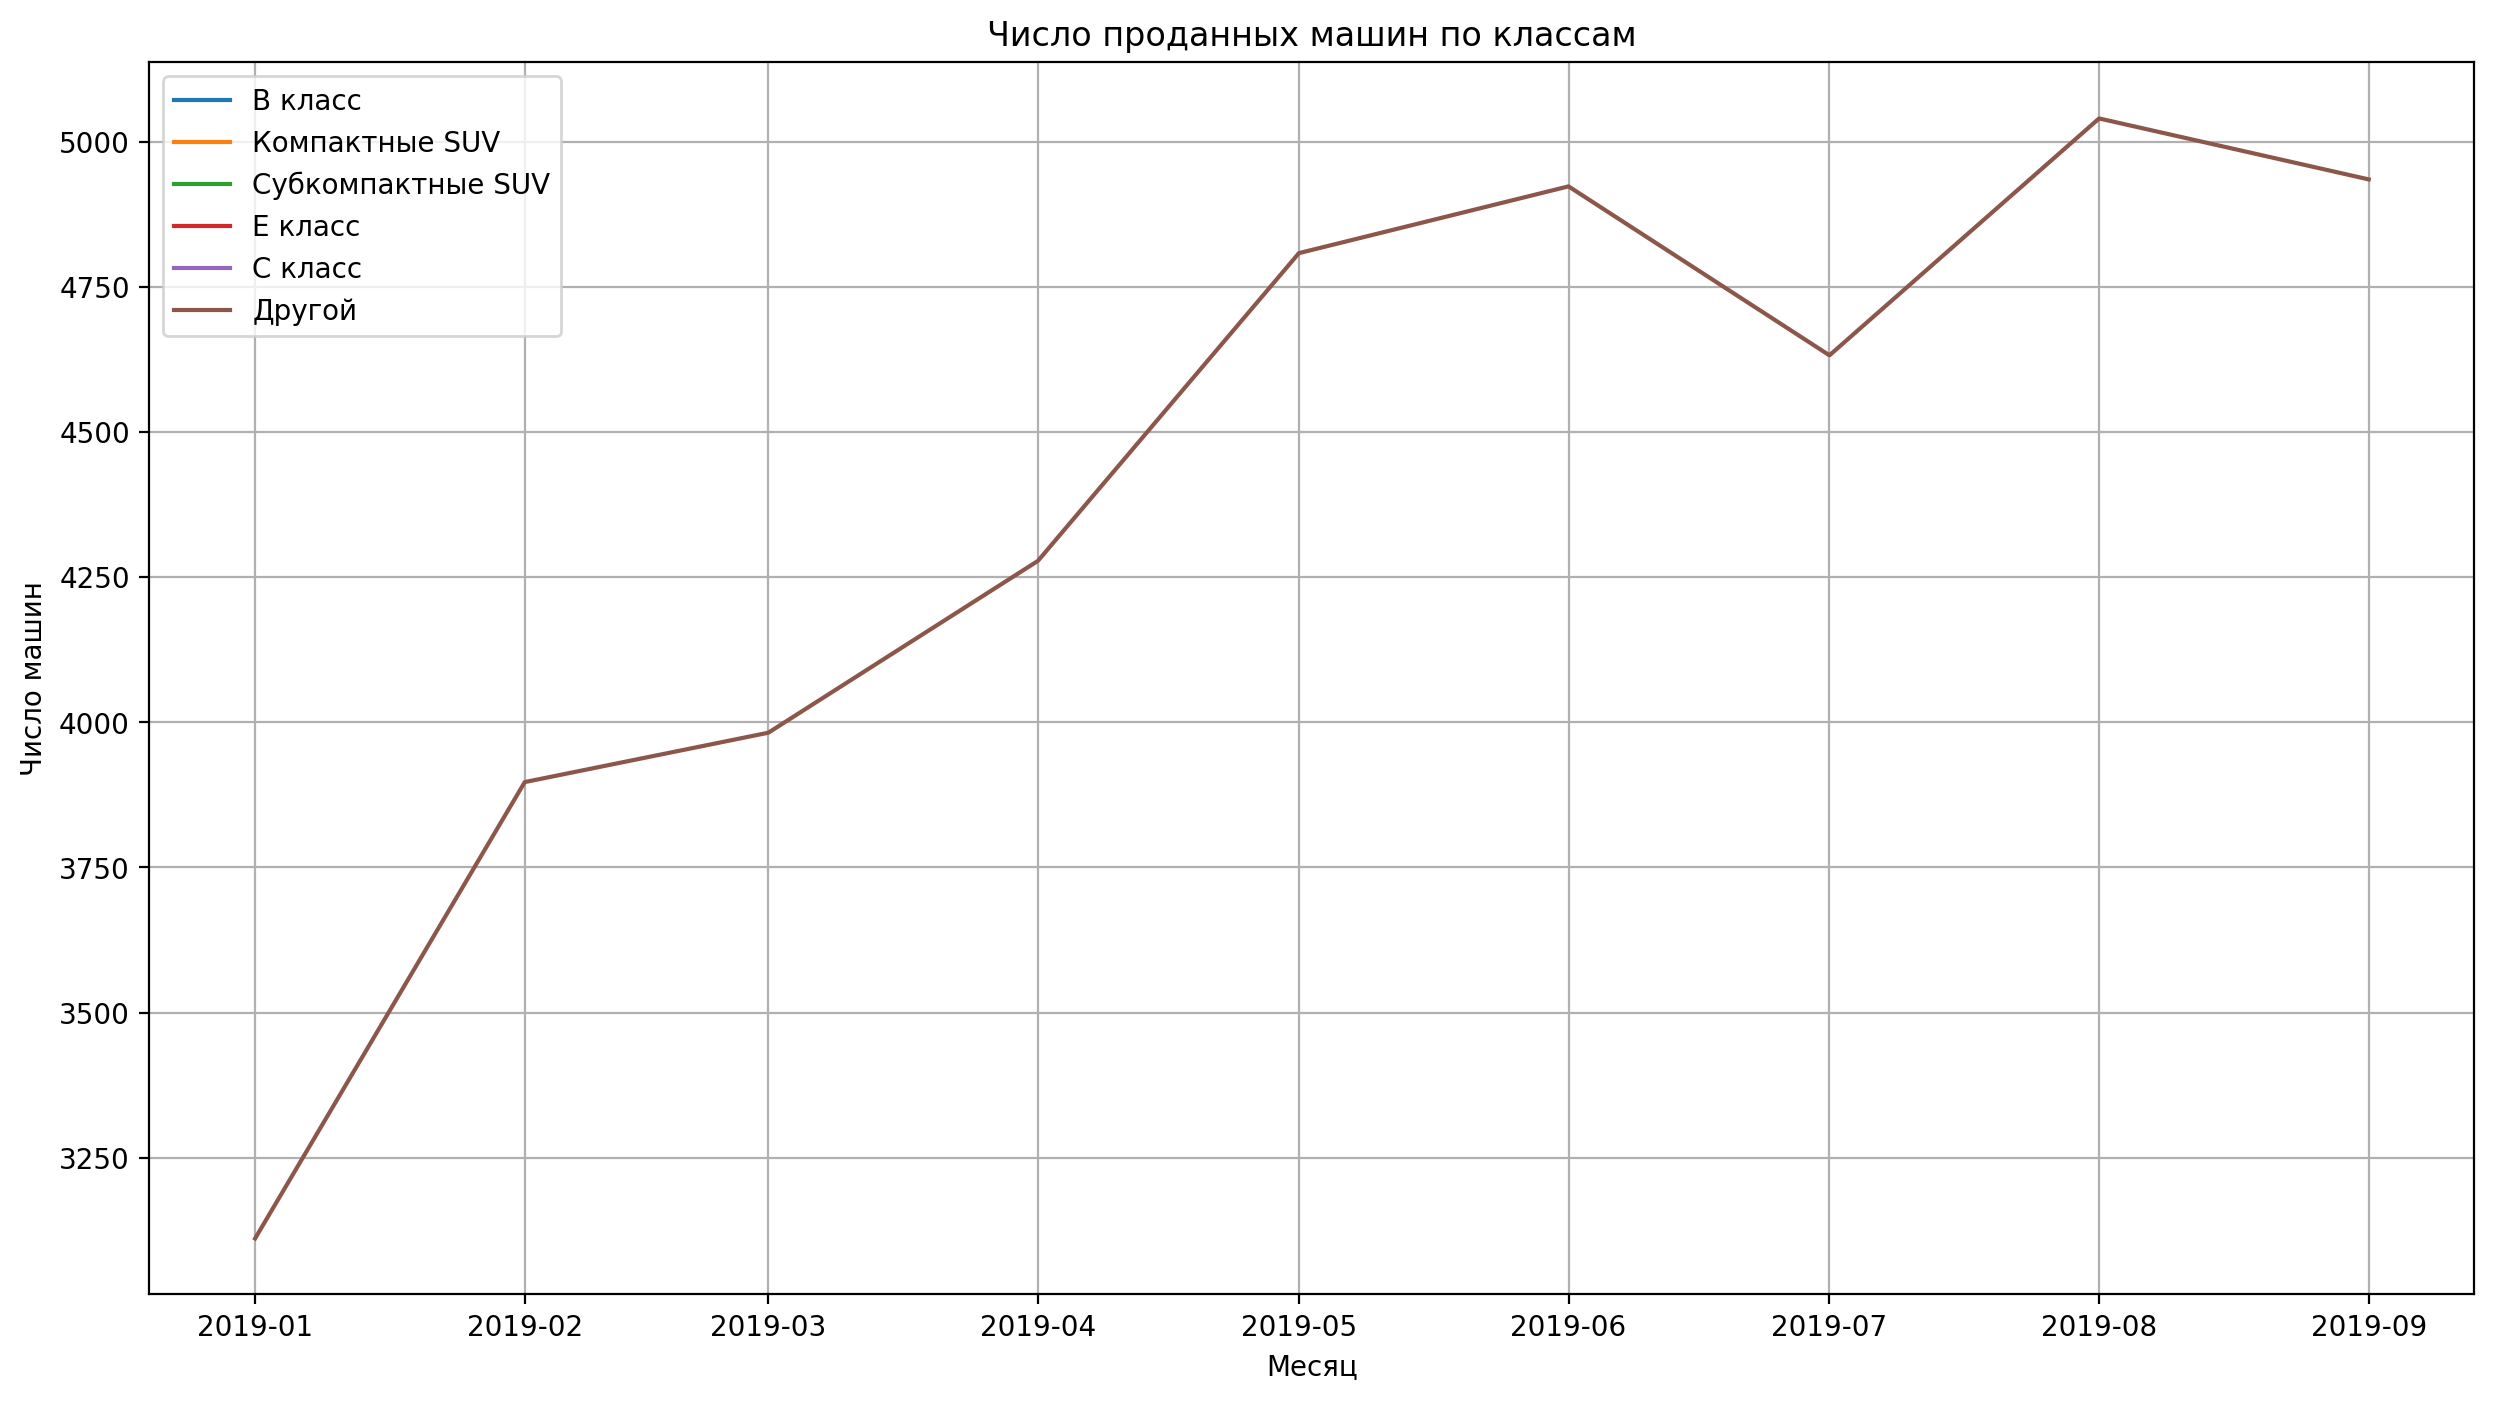

In [77]:
# Визуализируем их.

plt.plot(classes.loc[classes['top_classes'] == 'B класс', 'Месяц_продажи'],
         classes.loc[classes['top_classes'] == 'B класс', 'Количество'], label='B класс')
plt.plot(classes.loc[classes['top_classes'] == 'Компактные SUV', 'Месяц_продажи'],
         classes.loc[classes['top_classes'] == 'Компактные SUV', 'Количество'], label='Компактные SUV')
plt.plot(classes.loc[classes['top_classes'] == 'Субкомпактные SUV', 'Месяц_продажи'],
         classes.loc[classes['top_classes'] == 'Субкомпактные SUV', 'Количество'], label='Субкомпактные SUV')
plt.plot(classes.loc[classes['top_classes'] == 'E класс', 'Месяц_продажи'],
         classes.loc[classes['top_classes'] == 'E класс', 'Количество'], label='E класс')
plt.plot(classes.loc[classes['top_classes'] == 'C класс', 'Месяц_продажи'],
         classes.loc[classes['top_classes'] == 'C класс', 'Количество'], label='C класс')
plt.plot(classes.loc[classes['top_classes'] == 'Другой', 'Месяц_продажи'],
         classes.loc[classes['top_classes'] == 'Другой', 'Количество'], label='Другой')
plt.grid(True)
plt.legend()
plt.title('Число проданных машин по классам')
plt.xlabel("Месяц")
plt.ylabel("Число машин");

Продажи по классам-лидерам тоже растут от января к сентябрю, но более плавно, чем другие категории.

In [78]:
# Соберем данные по месяцам по сегментам.

segments = data.groupby(['Месяц_продажи', 'Сегментация 2013'])['Количество'].sum().reset_index()
segments.head()

Месяц_продажи         Сегментация 2013  Количество
0    2019-01-01             Внедорожники        1155
1    2019-01-01  Коммерческие автомобили         251
2    2019-01-01      Легковые автомобили        1615
3    2019-01-01                 Минивэны           9
4    2019-01-01                   Пикапы          81

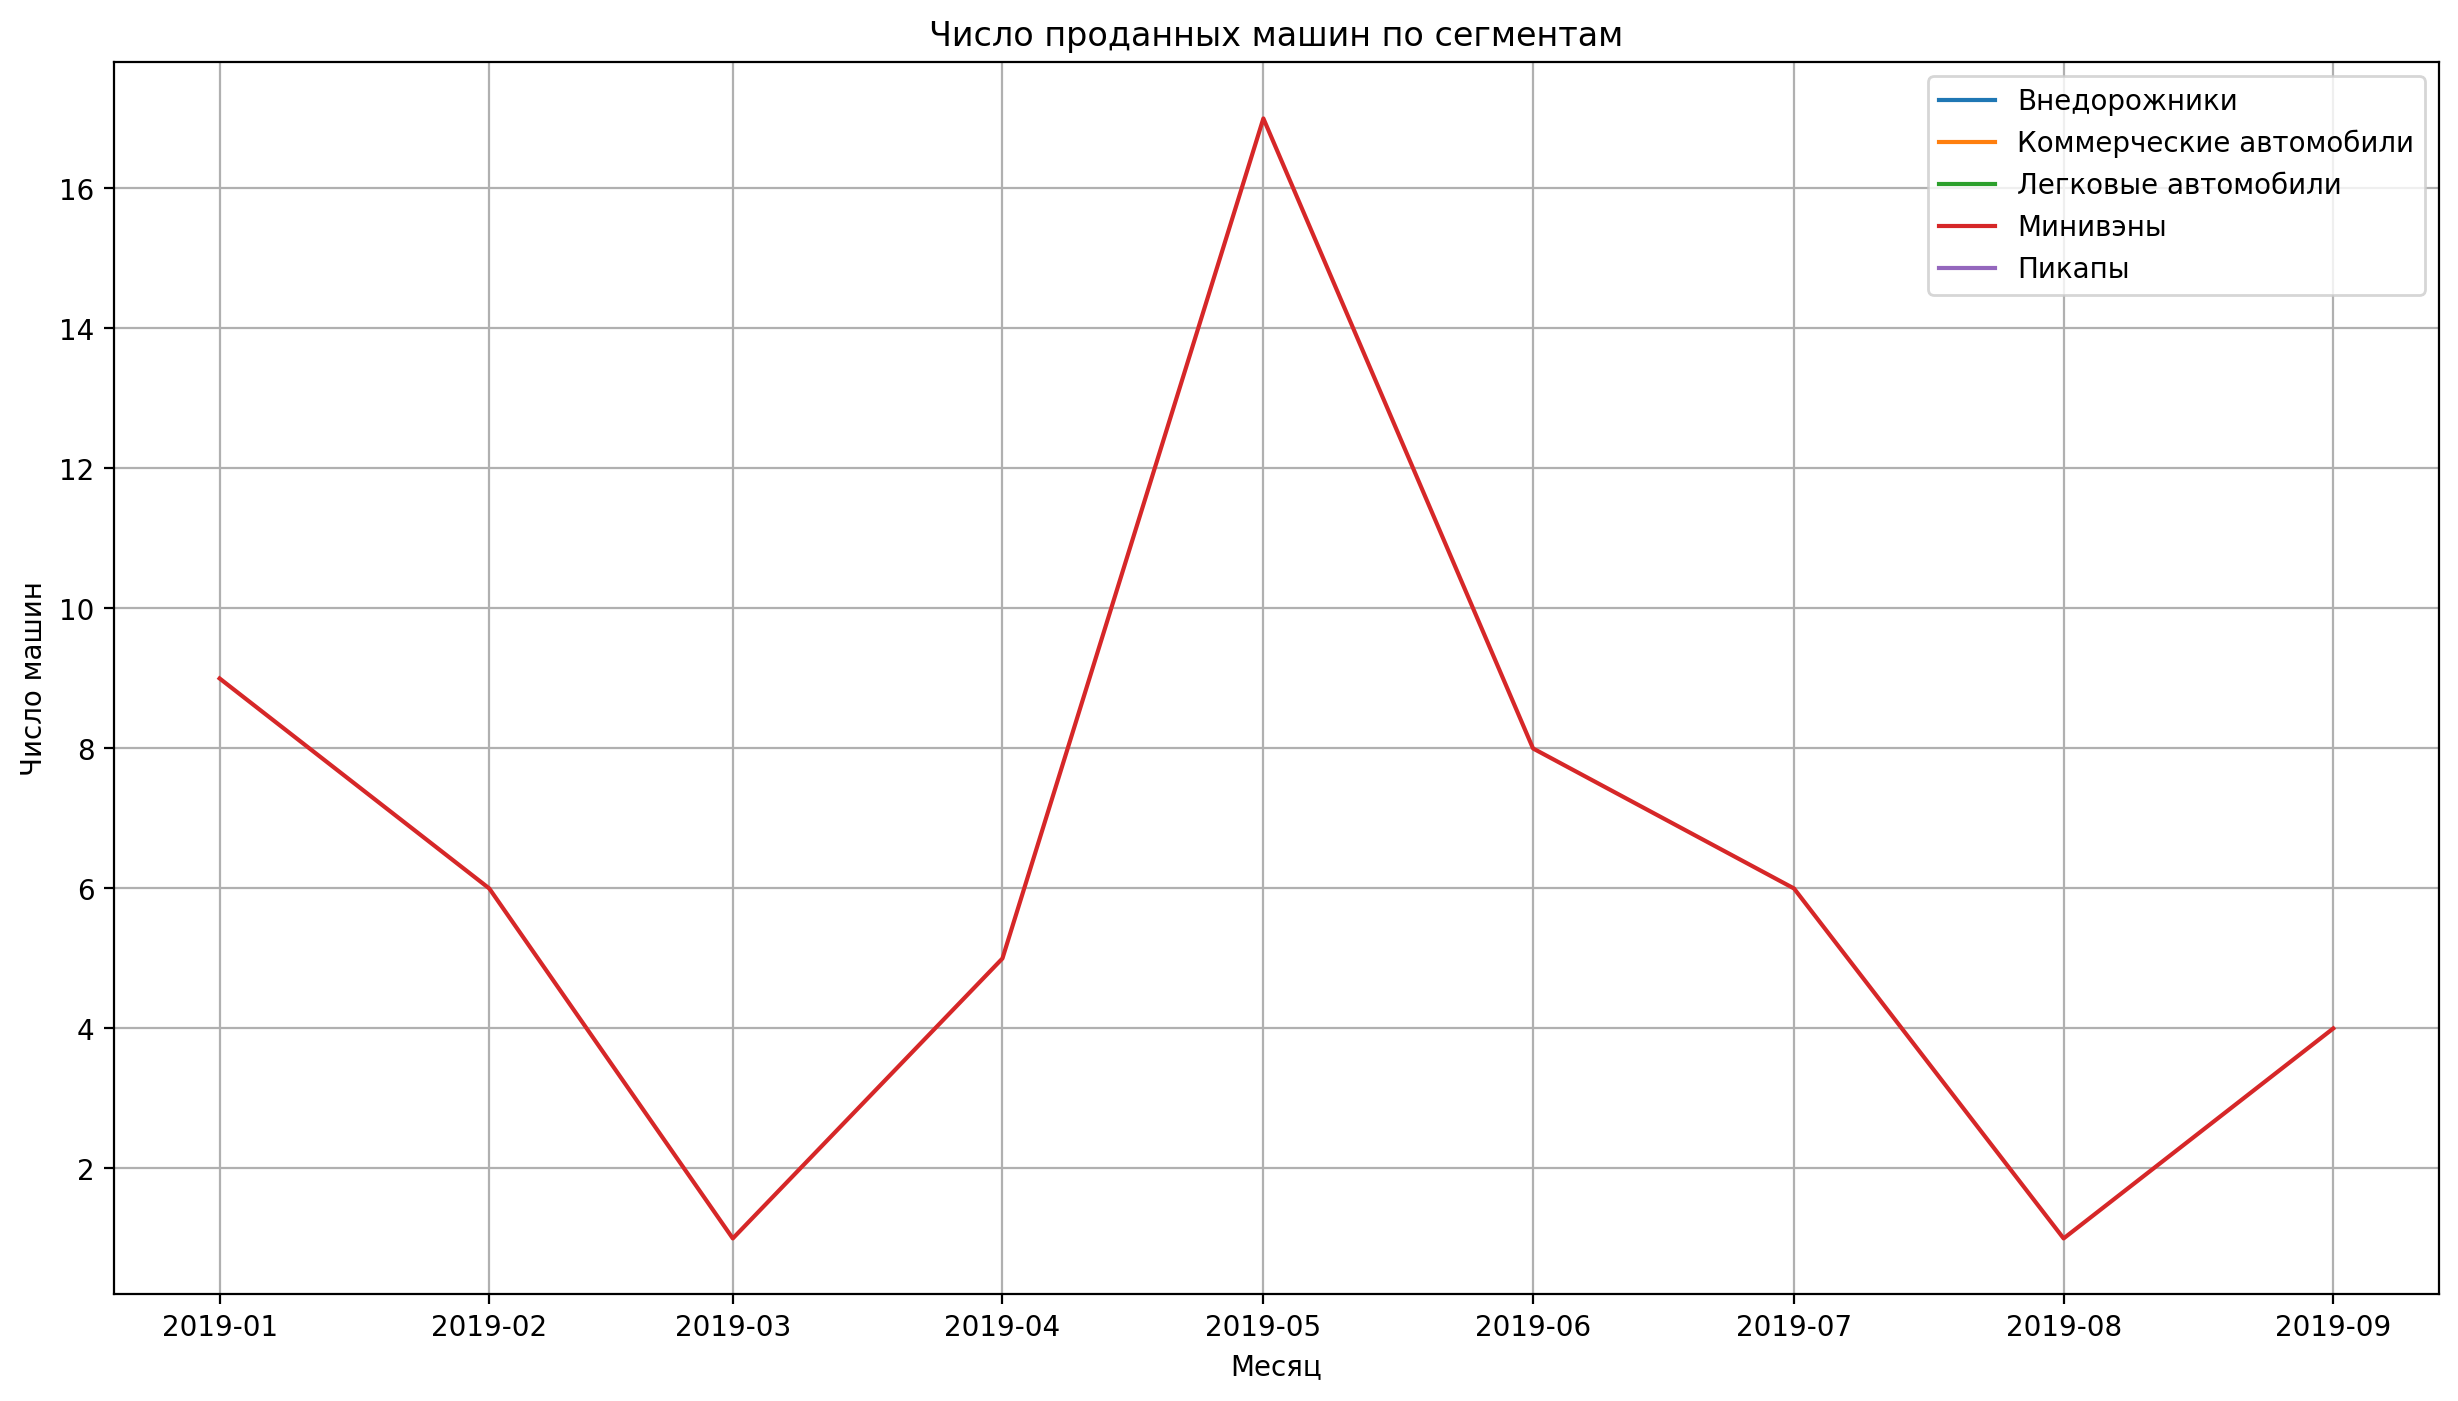

In [79]:
# Визуализируем их.

plt.plot(segments.loc[segments['Сегментация 2013'] == 'Внедорожники ', 'Месяц_продажи'],
         segments.loc[segments['Сегментация 2013'] == 'Внедорожники ', 'Количество'], label='Внедорожники')
plt.plot(segments.loc[segments['Сегментация 2013'] == 'Коммерческие автомобили ', 'Месяц_продажи'],
         segments.loc[segments['Сегментация 2013'] == 'Коммерческие автомобили ', 'Количество'],
         label='Коммерческие автомобили')
plt.plot(segments.loc[segments['Сегментация 2013'] == 'Легковые автомобили ', 'Месяц_продажи'],
         segments.loc[segments['Сегментация 2013'] == 'Легковые автомобили ', 'Количество'],
         label='Легковые автомобили')
plt.plot(segments.loc[segments['Сегментация 2013'] == 'Минивэны', 'Месяц_продажи'],
         segments.loc[segments['Сегментация 2013'] == 'Минивэны', 'Количество'], label='Минивэны')
plt.plot(segments.loc[segments['Сегментация 2013'] == 'Пикапы ', 'Месяц_продажи'],
         segments.loc[segments['Сегментация 2013'] == 'Пикапы ', 'Количество'], label='Пикапы')
plt.grid(True)
plt.legend()
plt.title('Число проданных машин по сегментам')
plt.xlabel("Месяц")
plt.ylabel("Число машин");

Больше всего продается легковых автомобилей, пик продаж в мае. На втором месте внедорожники, пик продаж в августе. На третьем месте коммерческие автомобили, динамика продаж более плавная, невыраженный пик прода в июле. Продажи пикапов и минивенов почти не меняются по месяцам.

In [80]:
# Соберем данные по месяцам по видам топлива.

fuel = data.groupby(['Месяц_продажи', 'Код топлива'])['Количество'].sum().reset_index()
fuel

Месяц_продажи Код топлива  Количество
0     2019-01-01           D          81
1     2019-01-01           F        3029
2     2019-01-01         HYB           1
3     2019-02-01           D          84
4     2019-02-01           F        3812
5     2019-02-01         HYB           1
6     2019-03-01           D          67
7     2019-03-01           F        3915
8     2019-04-01           D         128
9     2019-04-01           F        4147
10    2019-04-01         HYB           3
11    2019-05-01           D         101
12    2019-05-01           F        4706
13    2019-05-01         HYB           1
14    2019-06-01           D          84
15    2019-06-01           F        4832
16    2019-06-01         HYB           7
17    2019-07-01           D         120
18    2019-07-01           F        4436
19    2019-07-01           G          70
20    2019-07-01         HYB           6
21    2019-08-01           D         122
22    2019-08-01           F        4916
23    2019-08-01         HYB           2
24    2019-09-01           D          95
25    2019-09-01           F        4837
26    2019-09-01         HYB           3

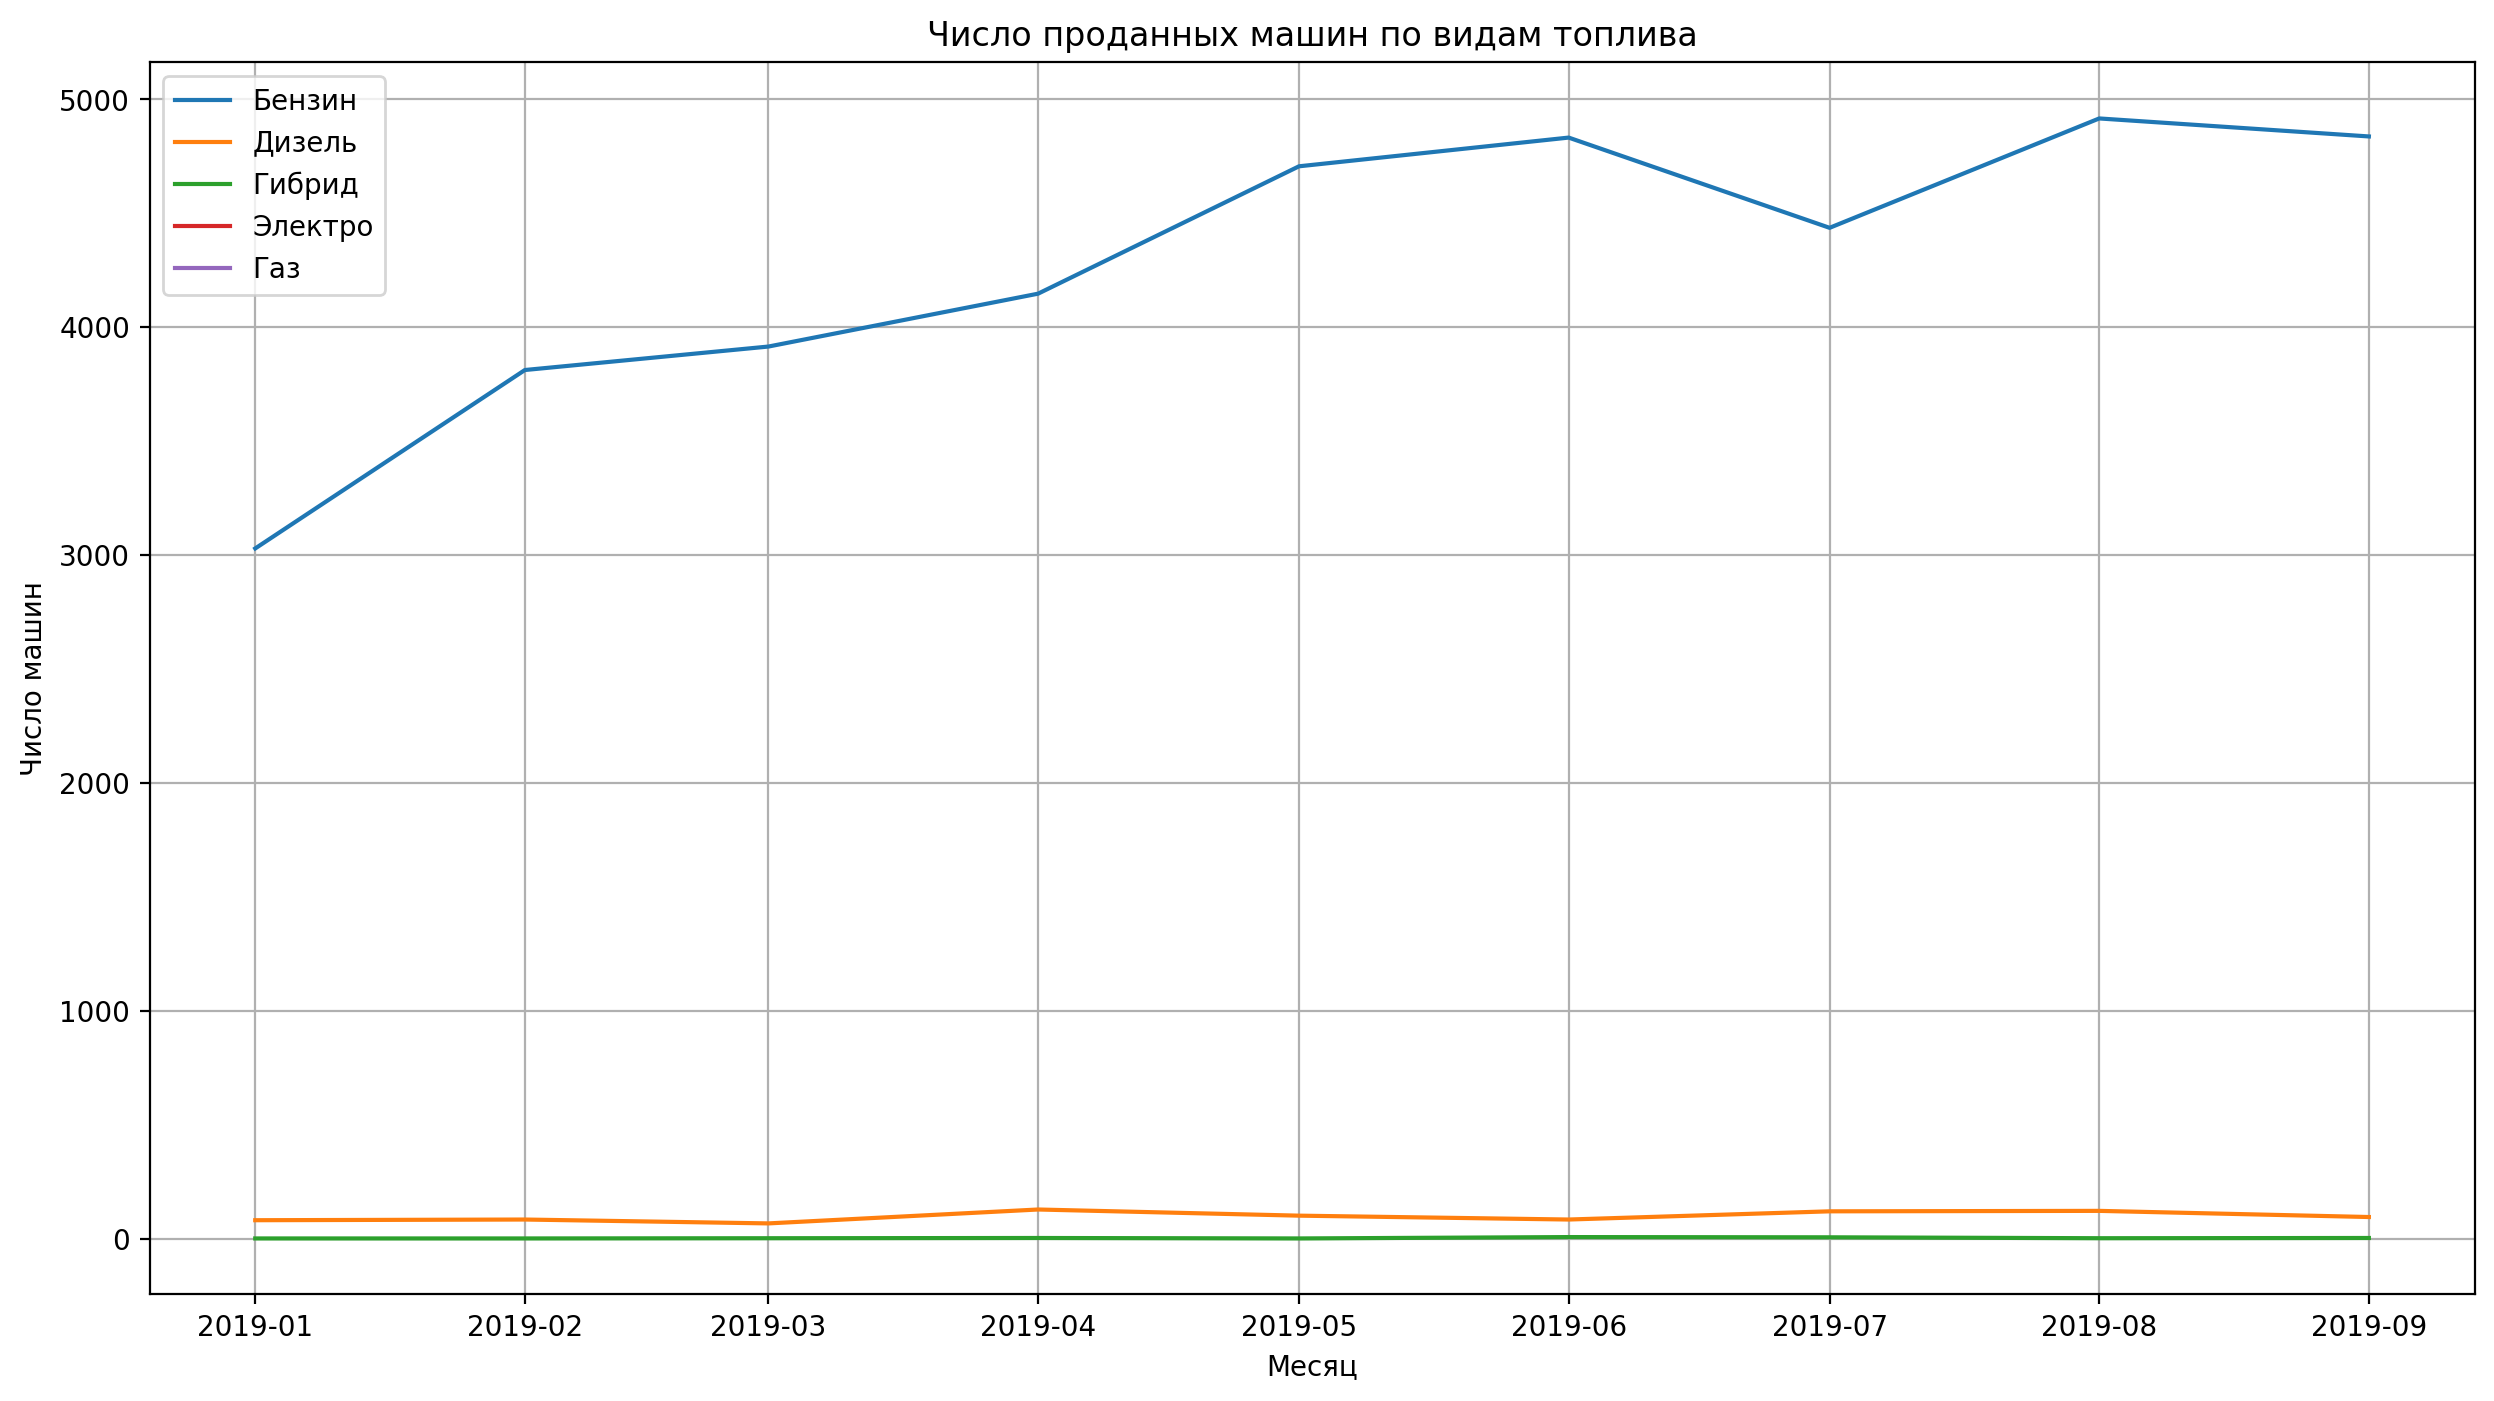

In [81]:
# Визуализируем их.

plt.plot(fuel.loc[fuel['Код топлива'] == 'F', 'Месяц_продажи'],
         fuel.loc[fuel['Код топлива'] == 'F', 'Количество'], label='Бензин')
plt.plot(fuel.loc[fuel['Код топлива'] == 'D', 'Месяц_продажи'],
         fuel.loc[fuel['Код топлива'] == 'D', 'Количество'], label='Дизель')
plt.plot(fuel.loc[fuel['Код топлива'] == 'HYB', 'Месяц_продажи'],
         fuel.loc[fuel['Код топлива'] == 'HYB', 'Количество'], label='Гибрид')
plt.plot(fuel.loc[fuel['Код топлива'] == 'E', 'Месяц_продажи'],
         fuel.loc[fuel['Код топлива'] == 'E', 'Количество'], label='Электро')
plt.plot(fuel.loc[fuel['Код топлива'] == 'G', 'Месяц_продажи'],
         fuel.loc[fuel['Код топлива'] == 'G', 'Количество'], label='Газ')
plt.grid(True)
plt.legend()
plt.title('Число проданных машин по видам топлива')
plt.xlabel("Месяц")
plt.ylabel("Число машин");

Абсолютное лидерство у бензиновых автомобилей, меньше всего газовых (70) и. только 1 электромобиль. Видимо, это следствие наличия в Казахстане нефти и нефтепереработки и отсутствия инфраструктуры для газовых и электромобилей.

<a id='30-bullet'></a>

### Продажи по регионам

In [82]:
# Сгруппируем продажи по регионам.

regions = (
    data.groupby(['Регион']).agg({'Количество': 'sum', 'Сумма, тыс. USD': 'sum'})
    .reset_index().sort_values(by='Сумма, тыс. USD', ascending=False)
)
regions['Сумма, тыс. USD'] = round(regions['Сумма, тыс. USD'])
regions['Доля в шт., %'] = round((regions['Количество'] / regions['Количество'].sum())*100)
regions['Доля в выручке, %'] = round((regions['Сумма, тыс. USD'] / regions['Сумма, тыс. USD'].sum())*100)
regions.head()

Регион  Количество  Сумма, тыс. USD  Доля в шт., %  Доля в выручке, %
3     Алматы       10434         325839.0           26.0               32.0
4     Астана        7483         224634.0           19.0               22.0
5     Атырау        2827          64881.0            7.0                6.0
19   Шымкент        2488          53662.0            6.0                5.0
8   Костанай        2465          53481.0            6.0                5.0

Вопрос: можло ли как-то сразу при группировке применить и суммирование, и округление? Чтобы не писать дополнительную строчку с округелнием?

На первом месте с большим отрывом продажи в Алматы с долей 26 % в натуральном выражении и 32 % в денежном.
На втором месте Астана с 19 % в натуральном выражении и 22 % в дененом.
На третьем месте Атырау: 7 % в натуарльном выражении и 6 % в денежном.
Четвертое и пятое место - Шымкент и Костанай по 6 % в натуральном выражении и 5 % в денежном.

<a id='31-bullet'></a>

### Продажи по дилерам

In [83]:
# Сгруппируем продажи по дилерам.

dealers = (
    data.groupby(['Компания']).agg({'Количество': 'sum', 'Сумма, тыс. USD': 'sum'})
    .reset_index().sort_values(by='Сумма, тыс. USD', ascending=False)
)
dealers['Сумма, тыс. USD'] = round(dealers['Сумма, тыс. USD'])
dealers.head(10)

Компания  Количество  Сумма, тыс. USD
17   Toyota Motor Kazakhstan       10425         467160.0
20                БИПЭК АВТО       11491         140634.0
1              Astana Motors        5779         128815.0
21                     Вираж        3358          58117.0
11  Nissan Manufacturing RUS        1738          43245.0
0                 Allur Auto        1303          28052.0
10               Mercur Auto         723          24323.0
18         Автоцентр-Бавария         387          24188.0
16         Subaru Kazakhstan         520          17312.0
26          УзАвто-Казахстан        1727          17149.0

Лидер в натуральном выражении - БИПЭК АВТО, который продает 11,5 тыс. автомобилей, при этом на него приходится 140,6 млн. долларов выручкирынки, лидер в денежном выражении - Toyota Motor Kazakhstan 467,2 млн. долларов выручки при 10,4 тыс. проданных машин.

Третье место - Astana Motors 5,8 тыс. машин, 128,8 млн. долларов.	

Четвертое - Вираж - 3,4 тыс. машин,	58,1 млн. долларов.	

Пятое - Nissan Manufacturing RUS - 1,7 тыс. машин,	43,2 млн. долларов.

<a id='32-bullet'></a>

### Объем продаж по бренду и классу авто

In [84]:
# Построим сводную таблицу по брендам и классу авто.

brend_class = pd.pivot_table(data, index='Бренд',
                             columns='Класс 2013', values='Количество', aggfunc=np.sum, fill_value=0).reset_index()
brend_class

Класс 2013                 Бренд  A класс  B класс  C класс  D класс  E класс  \
0                          ANKAI        0        0        0        0        0   
1                           Audi        0        0        3        1       51   
2                            BMW        0        0        2       17       58   
3                       Cadillac        0        0        0        0        0   
4                      Chevrolet        0       86        0        0        0   
5                         Daewoo        0        0        0        0        0   
6                           Ford        0       38       74        9        0   
7                            GAZ        0        0        0        0        0   
8                           Hino        0        0        0        0        0   
9                        Hyundai        0     1332     1152        0       22   
10           Hyundai Truck & Bus        0        0        0        0        0   
11                      Infiniti        0        0        0       15        0   
12                         Isuzu        0        0        0        0        0   
13                         Iveco        0        0        0        0        0   
14                           Jac        0        0        0        0        0   
15                           Kia        2      420      228       48        0   
16                          Lada        0     6722        0        0        0   
17                    Land Rover        0        0        0        0        0   
18                         Lexus        0        0        0        0       59   
19                         Lifan        0      158       66       17        0   
20                           MAN        0        0        0        0        0   
21                 Mercedes-Benz        0        0        0        4       15   
22          Mercedes-Benz Trucks        0        0        0        0        0   
23                          Mini        0        3        0        0        0   
24                    Mitsubishi        0        0        0        0        0   
25                        Nissan        0        0      449        0        0   
26                       Peugeot        0      110        0        1        0   
27                       Porsche        0        0        0        0        0   
28                         Ravon      156     1506       65        0        0   
29                       Renault        0       39       75        0        0   
30                   Rolls Royce        0        0        0        0        0   
31                         Skoda        0      145      167        0      147   
32                     SsangYong        0        0        0        0        0   
33                        Subaru        0        0        0        9        0   
34                        Suzuki        0        0        0        0        0   
35                        Toyota        0        0     1103        0     3440   
36                           UAZ        0        0        0        0        0   
37                    Volkswagen        0      379       78        7        0   
38                         Volvo        0        0        0        0        6   
39                           МАЗ        0        0        0        0        0   

Класс 2013  F класс  Pick-ups  Большие автобусы  Компактвэн  Компактные SUV  \
0                 0         0                70           0               0   
1                 8         0                 0           0               0   
2                22         0                 0           0             176   
3                 0         0                 0           0               0   
4                 0         0                 0           0               0   
5                 0         0                92           0               0   
6                 0         0                 0           0              51   
7                 0         0                 

<a id='33-bullet'></a>

### Распределение брендов по классам

In [85]:
# Посмотрим, в скольких классах встречаются бренды.

print(
    data.groupby('Бренд')['Класс 2013'].nunique().reset_index()
    .sort_values(by='Класс 2013', ascending=False).head(7)
)
(
data.groupby('Бренд')['Класс 2013'].nunique().reset_index()
    .sort_values(by='Класс 2013').head(8)
)

         Бренд  Класс 2013
9      Hyundai           8
2          BMW           8
37  Volkswagen           8
36         UAZ           7
15         Kia           7
1         Audi           7
35      Toyota           7


Бренд  Класс 2013
0         ANKAI           1
30  Rolls Royce           1
20          MAN           1
12        Isuzu           1
8          Hino           1
39          МАЗ           1
5        Daewoo           1
3      Cadillac           1

Больше всего различных классов машин проивзодят BMW, Hyundai и Volkswagen по 8, UAZ, Kia, Audi и Toyota по 7.

Восемь брендов представлены только в одном классе.

<a id='34-bullet'></a>

### Число брендов у дилеров

In [86]:
# Посмотрим, сколько брендов представлют дилеры и какая у них выручка.

(
data.groupby('Компания')['Бренд'].nunique().reset_index()
    .sort_values(by='Бренд', ascending=False)
)

Компания  Бренд
0                      Allur Auto      6
20                     БИПЭК АВТО      6
21                          Вираж      3
10                    Mercur Auto      3
1                   Astana Motors      3
18              Автоцентр-Бавария      3
17        Toyota Motor Kazakhstan      2
2                     Autokapital      2
24                            СВС      2
5           Eurasia Motor Premium      2
11       Nissan Manufacturing RUS      2
15        Sivi Finance Consulting      2
25                    ТК Рос-Авто      1
23                        ММС Рус      1
22               Лифан Моторс Рус      1
19                     Алматы АТО      1
13                            SMC      1
16              Subaru Kazakhstan      1
14            Scandinavian Motors      1
12                 Renault Россия      1
9                         MMC RUS      1
8               Jaguar Land Rover      1
7   Hyundai Com Trans Kazakhstan       1
6          Hino Motors Kazakhstan      1
4           Daewoo Bus Kazakhstan      1
3                  Caspian Motors      1
26               УзАвто-Казахстан      1

Большинство дилеров представляет только один бренд, 6 из 27 дилеров представляют два бренда, 4 дилера - три, и 2 дилера - шесть брендов.

<a id='35-bullet'></a>

### Коробки передач

In [87]:
# Посмотрим распределение коробок передач.

transmission = data.groupby('Коробка передач')['Количество'].sum().reset_index()
transmission['%'] = round(transmission['Количество'] / transmission['Количество'].sum() * 100)
transmission

Коробка передач  Количество     %
0            АКПП       24285  61.0
1            МКПП       15321  39.0

На машины с автоматической коробкой передач приходится 61 % машин, 39 % с механической коробкой.

<a id='36-bullet'></a>

### Приводы

In [88]:
# Посмотрим распределение приводов.

drive = data.loc[data['Тип привода'] != '-'].groupby('Тип привода')['Количество'].sum().reset_index()
drive['%'] = round(drive['Количество'] / drive['Количество'].sum() * 100)
drive

Тип привода  Количество     %
0         2WD        6633  17.0
1         4WD       15157  38.0
2         FWD       15858  40.0
3         RWD        1940   5.0

In [89]:
# Визуализируем.

fig = px.pie(drive, values="%", names="Тип привода",
             title='Распределение приводов')
fig.show()

Больше всего продавется автомобилей с передним приводом (40 %), навярняка их доля выше, так как в приводе 2WD, скорее всего, значительная часть именно передне приводные авто.
38 % приходится на полноприводные авто, заднеприводных 5 %.

<a id='37-bullet'></a>

### Объемы двигателей

In [90]:
# Для анализа с учетом числа машин в контракте разделим автомоблили по объемам двигателей на группы.

volume_labels = ['1.0-2.0', '2.1-3.0', '3.1-4.0', '4.1-5.0', '> 5.0']
volume_bins = [1, 2, 3, 4, 5, 15]

data['Объем двигателя'] = pd.cut(data['Объём двиг, л,'], bins=volume_bins, labels=volume_labels)

In [91]:
# Посмотрим распределение по категориям.

engine_capacity = data.groupby('Объем двигателя')['Количество'].sum().reset_index()
engine_capacity['%'] = round(engine_capacity['Количество'] / engine_capacity['Количество'].sum() * 100)
engine_capacity

Объем двигателя  Количество     %
0         1.0-2.0       26480  67.0
1         2.1-3.0       10195  26.0
2         3.1-4.0        1338   3.0
3         4.1-5.0        1022   3.0
4           > 5.0         571   1.0

Больше половины проданных машин с объемом от 1 до 2 литров, 26 % - с объемом от 2 до 3 литров, по 3 % - с объемом от 3 до 4 литров и от 4 до 5 литров, больше 6 литров объем только у 1 % машин. 

<a id='38-bullet'></a>

### Виды топлива

In [92]:
# Посмотрим распределение по категориям.

fuel_percent = data.groupby('Код топлива')['Количество'].sum().reset_index()
fuel_percent['%'] = round(fuel_percent['Количество'] / fuel_percent['Количество'].sum() * 100, 1)
fuel_percent

Код топлива  Количество     %
0           D         882   2.2
1           F       38630  97.5
2           G          70   0.2
3         HYB          24   0.1

## Подсчет показателей

<a id='39-bullet'></a>

### Прибыль и выручка

По данным от заказчика, прибыль дилера 3 % с машины.

In [93]:
# Посчитаем общую прибыль.

round(data['Сумма, тыс. USD'].sum() * 0.03)

30389

Суммарная прибыль более 30 мнл. долларов.

In [94]:
# Посчитаем прибыль по брендам.

margin_brand = (
    data.groupby('Бренд')['Сумма, тыс. USD'].sum().reset_index()
    .sort_values(by='Сумма, тыс. USD', ascending=False)
)
margin_brand['Сумма, тыс. USD'] = round(margin_brand['Сумма, тыс. USD'] * 0.03)
margin_brand.head()

Бренд  Сумма, тыс. USD
35   Toyota          11516.0
9   Hyundai           3745.0
16     Lada           2559.0
18    Lexus           2499.0
7       GAZ           1213.0

Наиболее прибыльна продажа Toyota: 11,5 млн. долларов, следом с большим отрывом Hyundai - 3,7 млн. долларов и Lada - 2,6 млн. долларов.

In [95]:
# Посчитаем среднюю стоимость продажи сначала по контактам с одним авто.

round(
data.loc[data['Количество'] == 1, 'Продажа, USD'].sum() / 
data.loc[data['Количество'] == 1, 'Количество'].sum()
)

29771

Средняя стоимость автомобиля при единичной покупке почти 30 тыс. долларов.

In [96]:
# Посчитаем среднюю стоимость продажи по контактам с более чем одним авто.

round(
data.loc[data['Количество'] > 1, 'Продажа, USD'].sum() / 
data.loc[data['Количество'] > 1, 'Количество'].sum()
)

15666

Среди мелкооптовых покупок средняя стоимость почти вдое ниже: 15,6 тыс. долларов. Видимо, сказывается большое число дешевых автомобилей.

In [97]:
# Посчитаем среднюю стоимость по брендам.

data.groupby('Бренд')['Цена, USD'].mean().reset_index().sort_values(by='Цена, USD', ascending=False)


Бренд      Цена, USD
30           Rolls Royce  498787.514716
27               Porsche  109123.072273
5                 Daewoo   99577.538675
3               Cadillac   99507.139102
20                   MAN   82632.407998
18                 Lexus   79243.565435
0                  ANKAI   77335.596016
38                 Volvo   67834.371247
11              Infiniti   66333.388139
21         Mercedes-Benz   64631.039339
13                 Iveco   63229.630588
22  Mercedes-Benz Trucks   60832.852542
1                   Audi   60493.956037
2                    BMW   60106.462013
10   Hyundai Truck & Bus   57876.345531
39                   МАЗ   53600.578094
17            Land Rover   45957.743882
35                Toyota   40951.052984
8                   Hino   40612.434456
24            Mitsubishi   36289.130687
12                 Isuzu   33622.643488
33                Subaru   33291.449032
23                  Mini   30088.820794
25                Nissan   24545.081728
34                Suzuki   23909.064017
31                 Skoda   23831.936508
9                Hyundai   21891.495572
37            Volkswagen   21104.866575
15                   Kia   20962.345679
7                    GAZ   19147.605401
32             SsangYong   17951.710241
6                   Ford   17497.409490
36                   UAZ   15208.175842
26               Peugeot   14367.450644
4              Chevrolet   14275.201600
19                 Lifan   14026.519836
14                   Jac   13893.132411
29               Renault   13306.879048
16                  Lada   10638.001664
28                 Ravon    9929.988664

Самая высокая средняя стоимость у Rolls Royce - почти 500 тыс. долларов, следом Porsche - 109 тыс. долларов, на тертьем месте Daewoo - почти 100 тыс. долларов.

Самые дешевые: Ravon - 9,9 тыс. долларов, Lada - 10,6 тыс. долларов и Renault - 13,3 тыс.

In [98]:
# Посчитаем ежемесячную прибыль по дрендам.

brend_month_margin = pd.pivot_table(data, index='Бренд',
                             columns='Месяц_продажи', values='Сумма, тыс. USD',
                                    aggfunc=np.sum, fill_value=0).reset_index()
for name in brend_month_margin.columns:
   if name != 'Месяц_продажи' and name != 'Бренд':
    brend_month_margin[name] = round(brend_month_margin[name] * 0.03)
   else:
        pass
brend_month_margin.columns = ['Бренд', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль',
                              'август', 'сентябрь']

brend_month_margin['Сумма, тыс. USD'] = (brend_month_margin['январь'] + 
                               brend_month_margin['февраль'] +
                               brend_month_margin['март'] + 
                               brend_month_margin['апрель'] + 
                               brend_month_margin['май'] + 
                               brend_month_margin['июнь'] + 
                               brend_month_margin['июль'] + 
                               brend_month_margin['август'] + 
                               brend_month_margin['сентябрь'])
    
brend_month_margin.sort_values(by='Сумма, тыс. USD', ascending=False)

Бренд  январь  февраль   март  апрель     май    июнь  \
35                Toyota   911.0   1006.0  809.0  1019.0  1573.0  1836.0   
9                Hyundai   156.0    368.0  386.0   315.0   544.0   503.0   
16                  Lada   228.0    261.0  265.0   290.0   269.0   265.0   
18                 Lexus   159.0    194.0  121.0   323.0   370.0   316.0   
7                    GAZ    85.0    126.0  156.0   148.0   156.0   139.0   
25                Nissan    62.0     84.0  113.0    85.0   114.0   156.0   
15                   Kia    80.0    123.0  151.0   179.0   118.0   112.0   
2                    BMW    59.0     74.0   82.0    88.0    78.0   105.0   
33                Subaru    37.0     48.0   43.0    74.0    59.0    50.0   
28                 Ravon   145.0    154.0  116.0    63.0    21.0     9.0   
36                   UAZ    30.0     43.0   32.0    61.0    41.0    41.0   
14                   Jac    13.0     45.0   48.0    65.0    52.0    51.0   
24            Mitsubishi    26.0     18.0   60.0    32.0    46.0    64.0   
31                 Skoda    15.0     16.0   17.0    25.0    32.0    59.0   
37            Volkswagen    28.0      0.0   23.0    81.0    75.0    63.0   
4              Chevrolet    24.0     30.0   32.0    42.0    38.0    43.0   
5                 Daewoo     0.0     28.0   47.0    30.0    62.0    12.0   
10   Hyundai Truck & Bus    29.0     21.0   23.0    24.0    32.0    38.0   
19                 Lifan    16.0     19.0   27.0    24.0    33.0    39.0   
29               Renault     0.0      0.0   39.0    33.0    44.0    28.0   
13                 Iveco    40.0      8.0    4.0     8.0    18.0     1.0   
27               Porsche    11.0     24.0    9.0    15.0    29.0    29.0   
1                   Audi    21.0     26.0   17.0    13.0    10.0    25.0   
11              Infiniti    14.0     22.0   36.0    16.0    11.0    25.0   
0                  ANKAI     0.0      0.0    0.0     0.0     0.0     0.0   
21         Mercedes-Benz     0.0      0.0    0.0     0.0     0.0    33.0   
22  Mercedes-Benz Trucks     7.0     11.0    5.0    10.0    21.0    11.0   
6                   Ford     4.0      7.0   22.0    39.0    13.0     5.0   
8                   Hino    13.0     23.0   13.0     6.0     5.0     5.0   
3               Cadillac    10.0      3.0    4.0     3.0     3.0     7.0   
26               Peugeot     6.0      7.0    5.0     9.0    15.0     2.0   
38                 Volvo     0.0      0.0    7.0     6.0     0.0    11.0   
12                 Isuzu    10.0     13.0    0.0     0.0     0.0     0.0   
30           Rolls Royce     0.0      0.0    0.0     0.0     0.0     0.0   
23                  Mini     1.0      2.0    1.0     1.0     0.0     2.0   
39                   МАЗ     0.0      8.0    0.0     0.0     0.0     2.0   
32             SsangYong     1.0      0.0    1.0     1.0     1.0     0.0   
17            Land Rover     0.0      0.0    0.0     0.0     3.0     0.0   
34                Suzuki     0.0      0.0    0.0     0.0     0.0     0.0   
20                   MAN     0.0      0.0    2.0     0.0     0.0     0.0   

      июль  август  сентябрь  Сумма, тыс. USD  
35  1450.0  1480.0    1433.0          11517.0  
9    454.0   486.0     535.0           3747.0  
16   315.0   326.0     342.0           2561.0  
18   321.0   298.0     397.0           2499.0  
7    135.0   119.0     148.0           1212.0  
25   132.0   160.0     203.0           1109.0  
15   121.0    81.0      77.0           1042.0  
2     71.0    96.0      44.0            697.0  
33    83.0    70.0      54.0            518.0  
28     5.0     0.0       0.0            513.0  
36    56.0   120.0      51.0            475.0  
14    43.0    84.0      10.0            411.0  
24    41.0    52.0      54.0            393.0  
31    79.0    64.0      67.0            374.0  
37     1.0    20.0      52.0            343.0  
4     33.0    42.0      35.0            319.0  
5      9.0    15.0      74.0            277.0  
10    62.0    40.0       0.0          

In [99]:
# Посчитаем среднюю стоимость авто по месяцам для единичных покупок.

month_cost = data.loc[data['Количество'] == 1].groupby('Месяц_продажи')['Цена, USD'].mean().reset_index()
month_cost['Цена, USD'] = round(month_cost['Цена, USD'])
month_cost

Месяц_продажи  Цена, USD
0    2019-01-01    28379.0
1    2019-02-01    27469.0
2    2019-03-01    25427.0
3    2019-04-01    28346.0
4    2019-05-01    30660.0
5    2019-06-01    31936.0
6    2019-07-01    32937.0
7    2019-08-01    30071.0
8    2019-09-01    30879.0

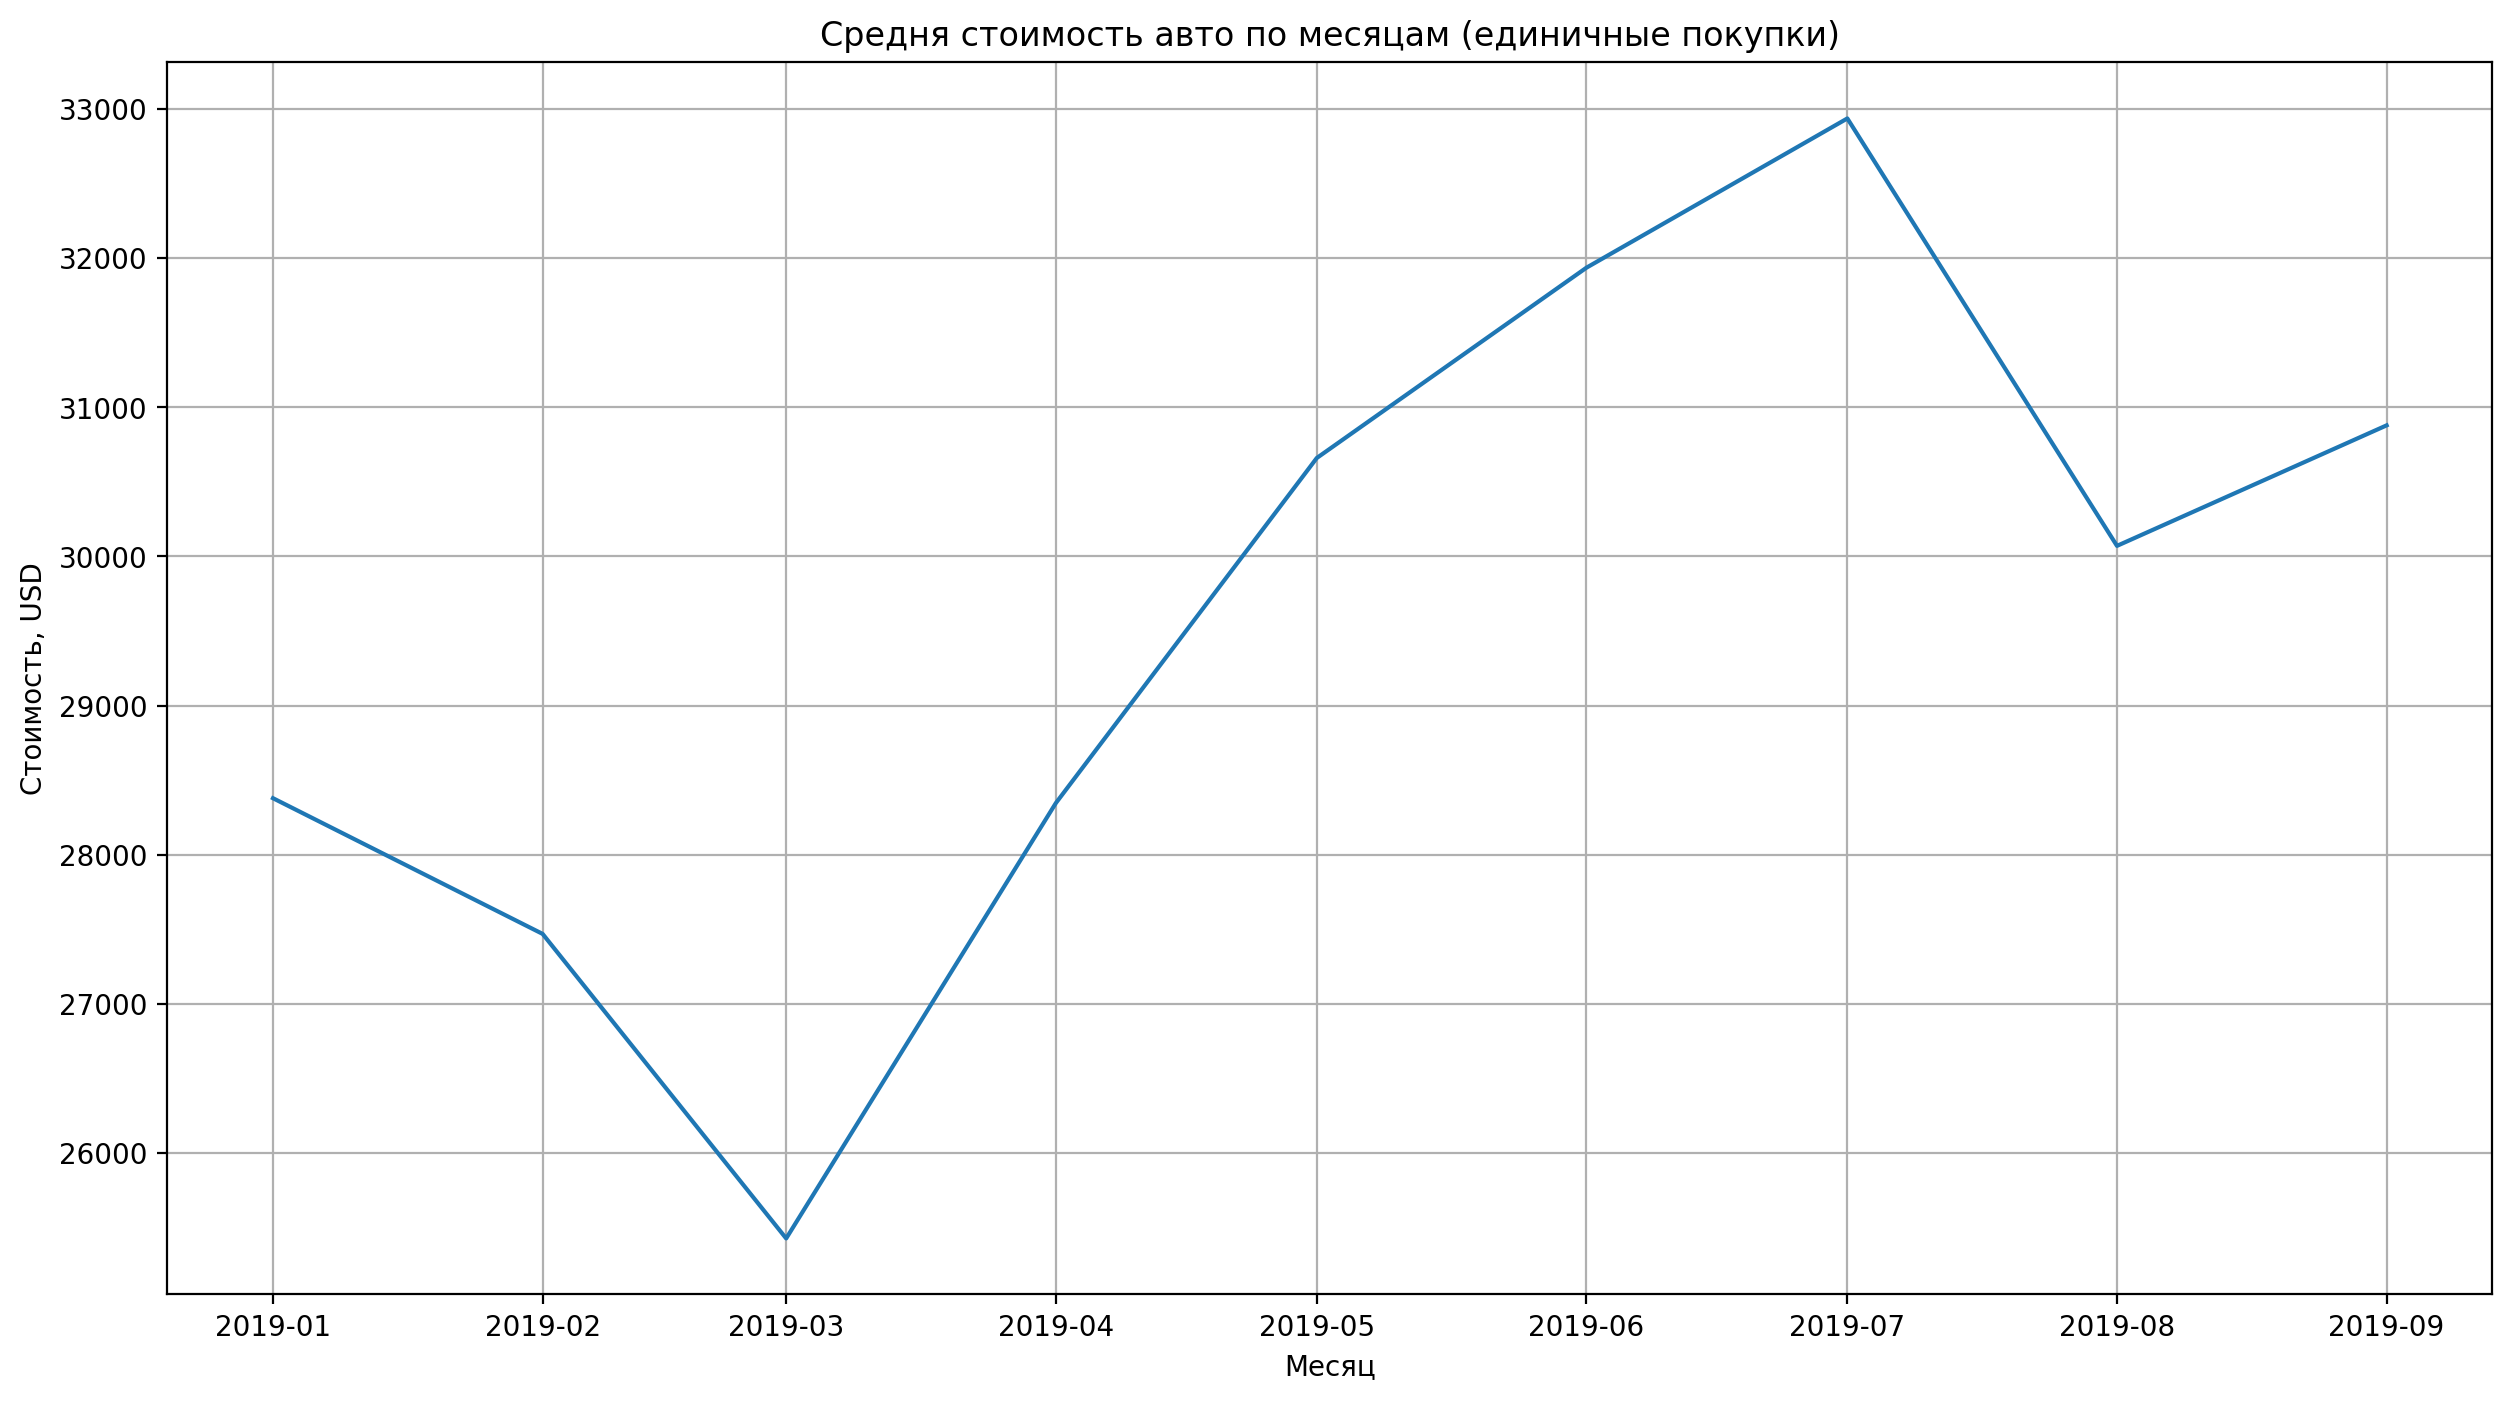

In [100]:
# Визуализируем их.

plt.plot(month_cost['Месяц_продажи'], month_cost['Цена, USD'])
plt.grid(True)
plt.title('Средня стоимость авто по месяцам (единичные покупки)')
plt.xlabel("Месяц")
plt.ylabel("Стоимость, USD");

In [101]:
# Посчитаем среднюю стоимость авто по месяцам для контарктов на более чем один автомобиль.

month_cost_2 = data.loc[data['Количество'] > 1].groupby('Месяц_продажи')['Цена, USD'].mean().reset_index()
month_cost_2['Цена, USD'] = round(month_cost_2['Цена, USD'])
month_cost_2

Месяц_продажи  Цена, USD
0    2019-01-01    15668.0
1    2019-02-01    18533.0
2    2019-03-01    19429.0
3    2019-04-01    17610.0
4    2019-05-01    18153.0
5    2019-06-01    19338.0
6    2019-07-01    18506.0
7    2019-08-01    18461.0
8    2019-09-01    18574.0

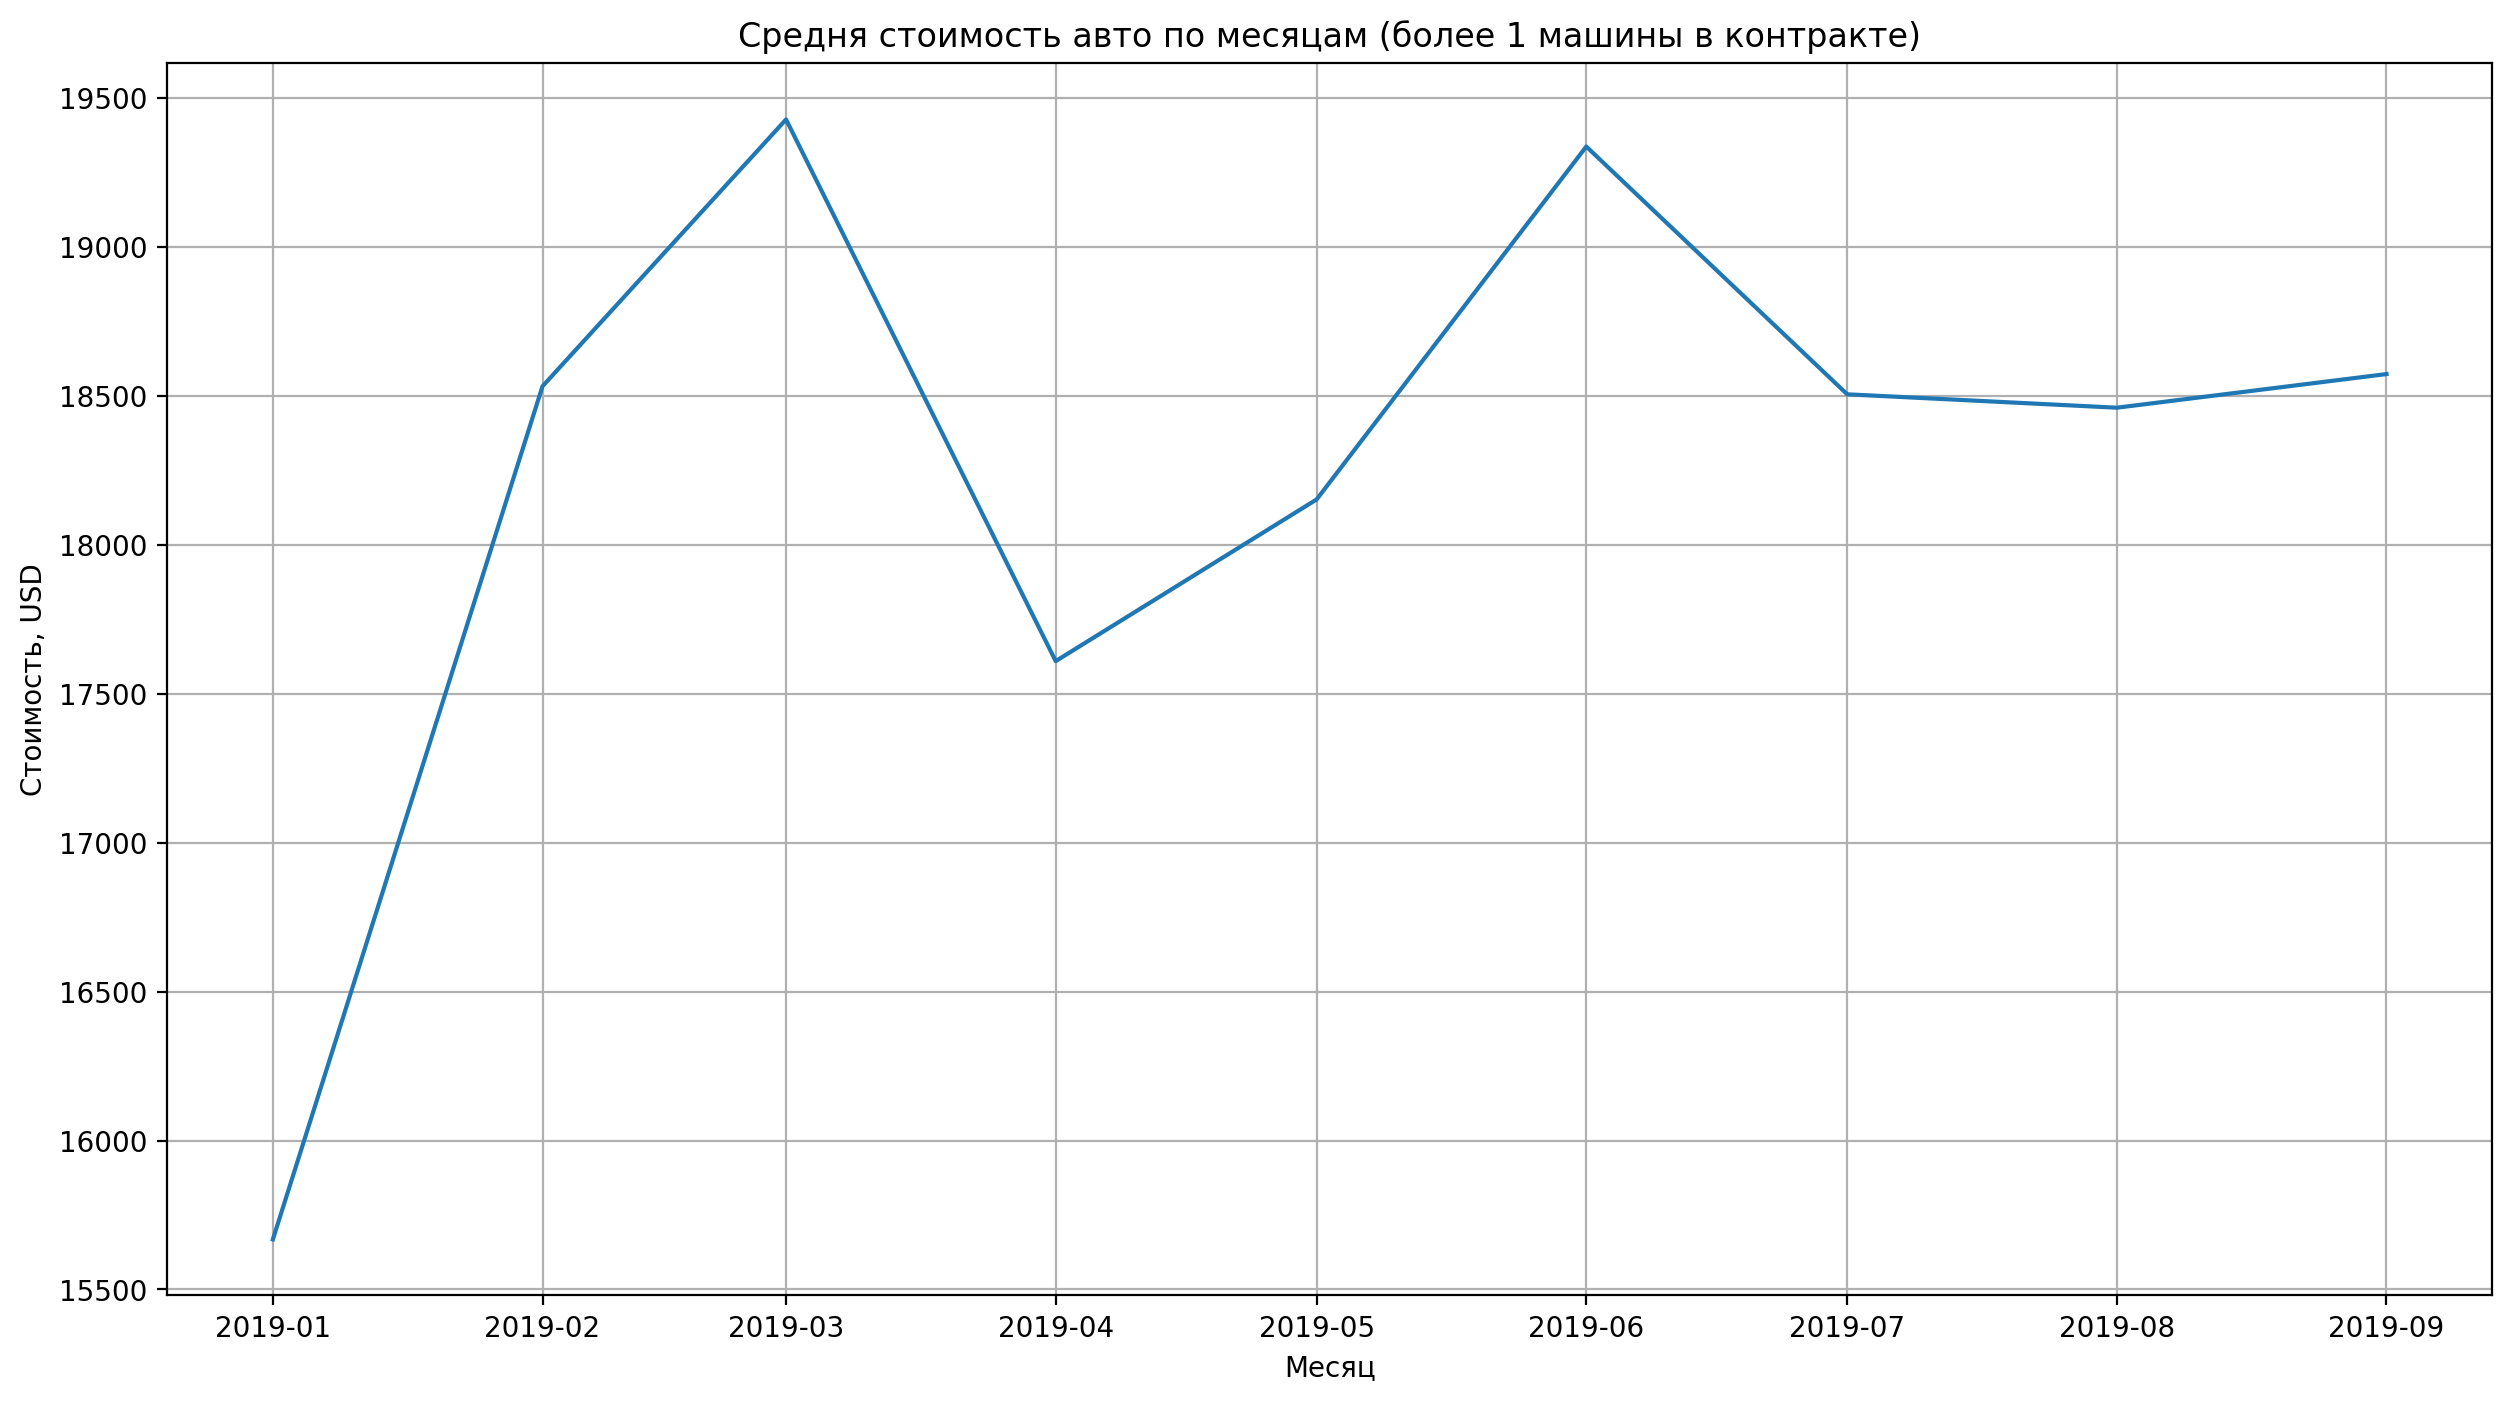

In [102]:
# Визуализируем их.

plt.plot(month_cost_2['Месяц_продажи'], month_cost_2['Цена, USD'])
plt.grid(True)
plt.title('Средня стоимость авто по месяцам (более 1 машины в контракте)')
plt.xlabel("Месяц")
plt.ylabel("Стоимость, USD");

Средняя стоимость при покупке одной машины минимальная в марте (24,4 тыс. долларов), максимальная в июле (32,9 тыс. долларов). При покупках более одной машины, средняя стоимость минимальна в январе (15,7 тыс. долларов), максимальна в марте (19,4 тыс. долларов).

In [103]:
# Посчитаем среднюю стоимость по брандам по месяцам.

brend_month_cost = pd.pivot_table(data, index='Бренд',
                             columns='Месяц_продажи', values='Цена, USD', aggfunc=np.mean).reset_index()
for name in brend_month_cost.columns:
   if name != 'Месяц_продажи' and name != 'Бренд':
    brend_month_cost[name] = round(brend_month_cost[name])
   else:
        pass
brend_month_cost.columns = ['Бренд', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль',
                              'август', 'сентябрь']

brend_month_cost['Средняя стоимость, USD'] = round((brend_month_cost['январь'] + 
                               brend_month_cost['февраль'] +
                               brend_month_cost['март'] + 
                               brend_month_cost['апрель'] + 
                               brend_month_cost['май'] + 
                               brend_month_cost['июнь'] + 
                               brend_month_cost['июль'] + 
                               brend_month_cost['август'] + 
                               brend_month_cost['сентябрь']) / 9)
    
brend_month_cost.sort_values(by='Средняя стоимость, USD', ascending=False)

Бренд    январь   февраль      март    апрель       май  \
27               Porsche  117388.0  130854.0   97780.0  128655.0   98322.0   
3               Cadillac  113021.0  101563.0  116933.0  115481.0  114284.0   
18                 Lexus   75636.0   79735.0   98455.0   76798.0   87362.0   
11              Infiniti   65575.0   76938.0   64408.0   57617.0   90287.0   
2                    BMW   57645.0   61395.0   68956.0   59337.0   68487.0   
1                   Audi   45995.0   53669.0   59341.0   59755.0   64130.0   
22  Mercedes-Benz Trucks   58705.0   57631.0   46420.0   45843.0   63477.0   
13                 Iveco   73363.0   50904.0   45917.0   38616.0   53394.0   
8                   Hino   40044.0   40690.0   40865.0   40341.0   39872.0   
35                Toyota   44797.0   42016.0   36925.0   41609.0   42445.0   
24            Mitsubishi   40264.0   33732.0   36143.0   37985.0   38731.0   
33                Subaru   31360.0   32024.0   32760.0   33865.0   35321.0   
25                Nissan   21033.0   24609.0   23728.0   24709.0   25991.0   
31                 Skoda   25665.0   22153.0   25472.0   28543.0   24215.0   
6                   Ford   20053.0   28246.0   15586.0   16608.0   15306.0   
9                Hyundai   21884.0   24270.0   23884.0   21573.0   20831.0   
15                   Kia   20379.0   22252.0   21920.0   21167.0   20865.0   
7                    GAZ   18249.0   19907.0   20100.0   20467.0   19482.0   
36                   UAZ   14947.0   15714.0   15597.0   14912.0   14600.0   
26               Peugeot   13549.0   15099.0   14761.0   14752.0   13485.0   
4              Chevrolet   16402.0   15028.0   15238.0   13766.0   13013.0   
19                 Lifan   14219.0   16683.0   15944.0   14981.0   14136.0   
14                   Jac   13548.0   13634.0   13408.0   15450.0   13847.0   
16                  Lada   10320.0   10270.0   10414.0   10925.0   10738.0   
0                  ANKAI       NaN       NaN       NaN       NaN       NaN   
5                 Daewoo       NaN  102550.0  101342.0  100084.0   99808.0   
10   Hyundai Truck & Bus   46101.0   69927.0   71085.0   48577.0   64540.0   
12                 Isuzu   33319.0   33856.0       NaN       NaN       NaN   
17            Land Rover       NaN       NaN       NaN       NaN   45958.0   
20                   MAN       NaN       NaN   82632.0       NaN       NaN   
21         Mercedes-Benz       NaN       NaN       NaN       NaN       NaN   
23                  Mini   30201.0   28413.0   33466.0   33051.0       NaN   
28                 Ravon    9812.0   10075.0   10085.0    9839.0    9588.0   
29               Renault   14887.0       NaN   18352.0   13243.0   12490.0   
30           Rolls Royce       NaN       NaN       NaN       NaN       NaN   
32             SsangYong   18310.0   16431.0   17821.0   20529.0   16922.0   
34                Suzuki       NaN       NaN       NaN       NaN       NaN   
37            Volkswagen   24157.0       NaN   20003.0   21423.0   24291.0   
38                 Volvo       NaN       NaN   72414.0   71615.0       NaN   
39                   МАЗ       NaN   54914.0       NaN       NaN       NaN   

        июнь      июль    август  сентябрь  Средняя стоимость, USD  
27   97368.0  116230.0   93699.0  118150.0                110938.0  
3   111940.0   88261.0   80992.0   92782.0                103917.0  
18   78689.0   80533.0   77072.0   72682.0                 80774.0  
11   63723.0   66914.0   62512.0   66116.0                 68232.0  
2    64531.0   60945.0   61152.0   43818.0                 60696.0  
1    70812.0   49516.0   75628.0   64852.0                 60411.0  
22   51502.0   85796.0   69083.0   40750.0                 57690.0  
13   35408.0   34568.0   84142.0   49713.0                 51781.0  
8    38975.0   37392.0   35720.0   75690.0                 43288.0  
35   41670.0   40642.0   38432.0   40650.0                 41021.0  
24   38122.0   33846.0   35538.0   33833.0                 36

Максимальная средняя стоимость у Porsche, Cadillac и Lexus. Минимальная (на данных за полные девять месяцев) у Lifan, Jac и Lada.

<a id='40-bullet'></a>

### Рынок

In [104]:
# Посчитаем емкость рынка в натуральном и количественном выражении.

print('Штук в год:', round(data['Количество'].sum() / 9 * 12))
print('Млн. долларов в год:', round((data['Сумма, тыс. USD'].sum() / 9 * 12)/1000))

Штук в год: 52808
Млн. долларов в год: 1351


Емкость рынка составляет почти 53 тысячи машин в год или 1,35 млрд. долларов.

In [105]:
# Посчитаем емкость рынка в по маркам.

market_capacity_brand = (
    data.groupby('Бренд').agg({'Количество': 'sum', 'Сумма, тыс. USD': 'sum'}).reset_index()
    .sort_values(by='Сумма, тыс. USD', ascending=False)
)
market_capacity_brand['Сумма, тыс. USD'] = round((market_capacity_brand['Сумма, тыс. USD'] / 9 * 12))
market_capacity_brand['Количество'] = round((market_capacity_brand['Количество'] / 9 * 12))
market_capacity_brand.head()

Бренд  Количество  Сумма, тыс. USD
35   Toyota     12499.0         511834.0
9   Hyundai      7604.0         166463.0
16     Lada     11644.0         113752.0
18    Lexus      1401.0         111047.0
7       GAZ      2815.0          53894.0

Наибольшая емкость рынка по бренду Toyota 12,5 тыс. штук в год или 512 млн. долларов.
Hyundai	- 7,6 тыс. штук,	166 млн. долларов.
Lada - 11,6 тыс. штук, 114 млн. долларов.

In [106]:
# Посчитаем емкость рынка по сегментам.

market_capacity_segment = (
    data.groupby('Сегментация 2013').agg({'Количество': 'sum', 'Сумма, тыс. USD': 'sum'}).reset_index()
    .sort_values(by='Сумма, тыс. USD', ascending=False)
)
market_capacity_segment['Сумма, тыс. USD'] = round((market_capacity_segment['Сумма, тыс. USD'] / 9 * 12))
market_capacity_segment['Количество'] = round((market_capacity_segment['Количество'] / 9 * 12))
market_capacity_segment

Сегментация 2013  Количество  Сумма, тыс. USD
0             Внедорожники     22277.0         747380.0
2      Легковые автомобили     24737.0         443829.0
1  Коммерческие автомобили      4632.0         120128.0
4                   Пикапы      1085.0          36168.0
3                 Минивэны        76.0           3100.0

Наибольшая емкость рынка в натуральном выражении в сегменте легковых автомобилей: 24,7 тыс. штук (444 млн. долларов), в стоимостном выражении - в сегменте внедорожников - 747 млн. долларов (22,3 тыс. штук).

In [107]:
# Сгруппируем долю дилеров в натуральном и денежном выражении.

dealers_percent = (
    data.groupby(['Компания']).agg({'Количество': 'sum', 'Сумма, тыс. USD': 'sum'})
    .reset_index().sort_values(by='Сумма, тыс. USD', ascending=False)
)
dealers_percent['Сумма, тыс. USD'] = round(dealers_percent['Сумма, тыс. USD'])
dealers_percent['Доля в шт., %'] = round((dealers_percent['Количество'] / 
                                          dealers_percent['Количество'].sum())*100)
dealers_percent['Доля в выручке, %'] = round((dealers_percent['Сумма, тыс. USD'] / 
                                              dealers_percent['Сумма, тыс. USD'].sum())*100)
dealers_percent.head()

Компания  Количество  Сумма, тыс. USD  Доля в шт., %  \
17   Toyota Motor Kazakhstan       10425         467160.0           26.0   
20                БИПЭК АВТО       11491         140634.0           29.0   
1              Astana Motors        5779         128815.0           15.0   
21                     Вираж        3358          58117.0            8.0   
11  Nissan Manufacturing RUS        1738          43245.0            4.0   

    Доля в выручке, %  
17               46.0  
20               14.0  
1                13.0  
21                6.0  
11                4.0

Лидер в натуральном выражении - БИПЭК АВТО, который продает 29 % автомобилей, при этом на него приходится 14 % выручки рынка в денежном выражении, лидер в денежном выражении - Toyota Motor Kazakhstan 46 % выручки при 26 % проданных машин.

Третье место - Astana Motors 15 % в натуральном выражении и 13 % в денежном.

Четвертое - Вираж - 8 % и 6 %, соответственно.

Пятое - Nissan Manufacturing RUS - по 4 % рынка и в денежном, и в натуральном выражении.

In [108]:
# Посчитаем долю дилеров по маркам.

brend_percent = pd.pivot_table(data, index='Компания',
                             columns='Бренд', values='Количество', aggfunc=np.sum, fill_value=0).reset_index()

for name in brend_percent.columns:
   if name != 'Компания' and name != 'Бренд':
    brend_percent[name] = round(brend_percent[name] / brend_percent[name].sum() * 100)
   else:
        pass    
brend_percent

Бренд                       Компания  ANKAI   Audi    BMW  Cadillac  \
0                         Allur Auto  100.0    0.0    0.0       0.0   
1                      Astana Motors    0.0    0.0    0.0       0.0   
2                        Autokapital    0.0    0.0    0.0       0.0   
3                     Caspian Motors    0.0    0.0    0.0       0.0   
4              Daewoo Bus Kazakhstan    0.0    0.0    0.0       0.0   
5              Eurasia Motor Premium    0.0    0.0    0.0      85.0   
6             Hino Motors Kazakhstan    0.0    0.0    0.0       0.0   
7      Hyundai Com Trans Kazakhstan     0.0    0.0    0.0       0.0   
8                  Jaguar Land Rover    0.0    0.0    0.0       0.0   
9                            MMC RUS    0.0    0.0    0.0       0.0   
10                       Mercur Auto    0.0  100.0    0.0       0.0   
11          Nissan Manufacturing RUS    0.0    0.0    0.0       0.0   
12                    Renault Россия    0.0    0.0    0.0       0.0   
13                               SMC    0.0    0.0    0.0       0.0   
14               Scandinavian Motors    0.0    0.0    0.0       0.0   
15           Sivi Finance Consulting    0.0    0.0    0.0      15.0   
16                 Subaru Kazakhstan    0.0    0.0    0.0       0.0   
17           Toyota Motor Kazakhstan    0.0    0.0    0.0       0.0   
18                 Автоцентр-Бавария    0.0    0.0  100.0       0.0   
19                        Алматы АТО    0.0    0.0    0.0       0.0   
20                        БИПЭК АВТО    0.0    0.0    0.0       0.0   
21                             Вираж    0.0    0.0    0.0       0.0   
22                  Лифан Моторс Рус    0.0    0.0    0.0       0.0   
23                           ММС Рус    0.0    0.0    0.0       0.0   
24                               СВС    0.0    0.0    0.0       0.0   
25                       ТК Рос-Авто    0.0    0.0    0.0       0.0   
26                  УзАвто-Казахстан    0.0    0.0    0.0       0.0   

Бренд  Chevrolet  Daewoo   Ford   GAZ   Hino  Hyundai  Hyundai Truck & Bus  \
0            0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
1            0.0     0.0    0.0   0.0    0.0    100.0                 40.0   
2            0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
3            0.0     0.0  100.0   0.0    0.0      0.0                  0.0   
4            0.0   100.0    0.0   0.0    0.0      0.0                  0.0   
5            1.0     0.0    0.0   0.0    0.0      0.0                  0.0   
6            0.0     0.0    0.0   0.0  100.0      0.0                  0.0   
7            0.0     0.0    0.0   0.0    0.0      0.0                 60.0   
8            0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
9            0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
10           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
11           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
12           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
13           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
14           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
15           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
16           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
17           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
18           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
19           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
20          28.0     0.0    0.0   0.0    0.0      0.0                  0.0   
21          70.0     0.0    0.0  99.0    0.0      0.0                  0.0   
22           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
23           0.0     0.0    0.0   0.0    0.0      0.0                  0.0   
24           0.0     0.0    0.0   0.0    0.0      0.0        

Большинство брендов представлены одним эксклюзивным дилером.

In [109]:
# Посчитаем долю дилеров по сегментам.

brend_segment_percent = pd.pivot_table(data, index='Компания',
                             columns='Сегментация 2013', values='Количество', aggfunc=np.sum).reset_index()

for name in brend_segment_percent.columns:
   if name != 'Компания' and name != 'Сегментация 2013':
    brend_segment_percent[name] = round(brend_segment_percent[name] / brend_segment_percent[name].sum() * 100)
   else:
        pass    
brend_segment_percent

Сегментация 2013                       Компания  Внедорожники  \
0                                    Allur Auto           6.0   
1                                 Astana Motors          19.0   
2                                   Autokapital           0.0   
3                                Caspian Motors           0.0   
4                         Daewoo Bus Kazakhstan           NaN   
5                         Eurasia Motor Premium           0.0   
6                        Hino Motors Kazakhstan           NaN   
7                 Hyundai Com Trans Kazakhstan            NaN   
8                             Jaguar Land Rover           0.0   
9                                       MMC RUS           0.0   
10                                  Mercur Auto           1.0   
11                     Nissan Manufacturing RUS           8.0   
12                               Renault Россия           3.0   
13                                          SMC           0.0   
14                          Scandinavian Motors           0.0   
15                      Sivi Finance Consulting           0.0   
16                            Subaru Kazakhstan           3.0   
17                      Toyota Motor Kazakhstan          30.0   
18                            Автоцентр-Бавария           2.0   
19                                   Алматы АТО           NaN   
20                                   БИПЭК АВТО          19.0   
21                                        Вираж           4.0   
22                             Лифан Моторс Рус           2.0   
23                                      ММС Рус           2.0   
24                                          СВС           NaN   
25                                  ТК Рос-Авто           NaN   
26                             УзАвто-Казахстан           NaN   

Сегментация 2013  Коммерческие автомобили  Легковые автомобили  Минивэны  \
0                                     7.0                  1.0      14.0   
1                                     2.0                 14.0      14.0   
2                                     2.0                  0.0       NaN   
3                                     0.0                  1.0       NaN   
4                                     3.0                  NaN       NaN   
5                                     NaN                  NaN       NaN   
6                                     2.0                  NaN       NaN   
7                                     3.0                  NaN       NaN   
8                                     NaN                  NaN       NaN   
9                                     NaN                  NaN       NaN   
10                                    0.0                  3.0       7.0   
11                                    NaN                  3.0       NaN   
12                                    NaN                  1.0       NaN   
13                                    NaN                  NaN       NaN   
14                                    NaN                  0.0       NaN   
15                                    NaN                  NaN       NaN   
16                                    NaN                  0.0       NaN   
17                                    NaN                 25.0      65.0   
18                                    NaN                  1.0       NaN   
19                                    NaN                  0.0       NaN   
20                                    7.0                 43.0       NaN   
21                                   74.0                  NaN       NaN   
22                                    NaN                  1.0       NaN   
23                                    NaN                  NaN       NaN   
24                                    0.0                  NaN       NaN   
25                                    0.0                  NaN       NaN   
26                                    NaN                  9.0       NaN   

Сегментация 2013  Пикапы  
0                    Na

Наибольшая доля в пикапах у Toyota Motor Kazakhstan (88 %), в коммерческих автомобилях у Вираж (74 %), в минивэнах у Toyota Motor Kazakhstan (65 %), в легковых автомобилях у БИПЭК АВТО (43 %).

In [110]:
# Посмотрим распределение машин на рынке по возрасту.

year = data.groupby('Год выпуска')['Количество'].sum().reset_index().sort_values(by='Количество', ascending=False)
year['%'] = round(year['Количество'] / year['Количество'].sum() * 100, 1)
year

Год выпуска  Количество     %
6         2018       30018  75.8
5         2017        9331  23.6
4         2016         229   0.6
3         2015          21   0.1
2         2014           4   0.0
1         2013           2   0.0
0         2011           1   0.0

Исслебуемые компании продают практически только новые машины.

<a id='41-bullet'></a>

### Анализ конкурентов

По просьбе заказчика необходимо сфокусироваться на Mercur Auto - посмотрим, какими брендами он торгует и в каких регионах, затем изучим конкурентов.

In [111]:
# Посмотрим, какими брендами торгует Mercur Auto.

mercur_brends = data.loc[data['Компания'] == 'Mercur Auto'].groupby('Бренд')['Количество'].sum().reset_index()
mercur_brends

Бренд  Количество
0        Audi         105
1     Porsche          60
2  Volkswagen         558

Mercur Auto торгует Volkswagen, Audi и Porsche.

In [112]:
# Посмотрим, в каких регионах представлен Mercur Auto.

mercur_region = data.loc[data['Компания'] == 'Mercur Auto'].groupby('Регион')['Количество'].sum().reset_index()
mercur_region

Регион  Количество
0     Алматы         326
1     Астана          85
2     Атырау         110
3  Караганда          83
4   Костанай          86
5    Уральск          33

Дилер представлен в шести городах: Алматы, Атырау, Костанай, Астана Караганда и Уральск.

In [113]:
mercur_brends = list(mercur_brends['Бренд'])
data.query('Бренд in @mercur_brends').groupby('Компания')['Количество'].sum()

Компания
Mercur Auto    723
Name: Количество, dtype: int64

In [114]:
mercur_region = list(mercur_region['Регион'])
(
    data.query('Регион in @mercur_region').groupby('Компания')['Количество'].sum().reset_index()
.sort_values(by='Количество', ascending=False)
)

Компания  Количество
17        Toyota Motor Kazakhstan        8084
20                     БИПЭК АВТО        5956
1                   Astana Motors        4337
21                          Вираж        1974
11       Nissan Manufacturing RUS        1455
26               УзАвто-Казахстан         965
0                      Allur Auto         962
10                    Mercur Auto         723
22               Лифан Моторс Рус         490
12                 Renault Россия         429
16              Subaru Kazakhstan         351
18              Автоцентр-Бавария         344
23                        ММС Рус         299
3                  Caspian Motors         179
2                     Autokapital         158
7   Hyundai Com Trans Kazakhstan          104
6          Hino Motors Kazakhstan          62
4           Daewoo Bus Kazakhstan          56
9                         MMC RUS          37
5           Eurasia Motor Premium          24
24                            СВС          24
14            Scandinavian Motors          22
25                    ТК Рос-Авто          15
15        Sivi Finance Consulting           4
8               Jaguar Land Rover           2
19                     Алматы АТО           1
13                            SMC           1

Mercur Auto - эксклюзивный дилер Volkswagen, Audi и Porsche - конкурентов, торгующих тем же брендом, у него нет.

В регионах присутствия Mercur Auto работают еще несколько десятков дилеров, самые крупные: Toyota Motor Kazakhstan, БИПЭК АВТО и Astana Motors.

## Выводы и рекомендации

<a id='42-bullet'></a>

### Выводы и рекомендации

В рамках работы проведена предобработка данных: удалены пропуски, исправлены ошибки ручного заполнения и некорретные типы данных, проанализированы и удалены выбросы.

Важно отметить, что для исследования были получены данные за 9 месяцев, а не за весь год, что не дает возможности изучить более полную картину авторынка, особенно в части сезонности продаж и их общего объема. 

Автомоблильный рынок новых машин Казастана составляет примерно 53 тысячи машин или 1,4 млрд. долларов в год. 97,5 % из них - бензиновые, 2,2 % дизельные, газ 0,2 %, гибрид 0,1 %. 61 % машин с автоматической коробкой, 39 % с механической. С передним приводом 40 %, 38 % с полным приводом, 5 % с задним, еще у 17 % указан привод 2WD - нет возможности установить, передний он или задний. 51 % с объемом двигателя до 2 литров, 41 % от 2 до 3 литров.

Наиболее популярные бренды Toyota (модели Camry, LC Prado и RAV4), Lada	(модели Granta, 4x4 и Largus) и Hyundai (модели Tucson, Accent и Creta). 

Суммарные продажи в натуральном выражении растут от января к сентябрю со снижением в июле и сентябре (остносительно августа). В денежном выражении продажи растут от января до июня (с небольшим снижением в марте), затем снижаются от июня к сентябрю.

Срденяя стоимость автмомблия при единичной покупке 30 тыс. долларов, при покупке более одной машины сразу - почти 16 тыс. долларов. Единичные продажи составляют 70 % рынка в натуральном выражении и 82 % в денежном. 

Лидер в натуральном выражении лидер рынка - БИПЭК АВТО, который продает 29 % автомобилей, при этом на него приходится 14 % выручки рынка в денежном выражении, лидер в денежном выражении - Toyota Motor Kazakhstan 46 % выручки при 26 % проданных машин. Третье место - Astana Motors 15 % в натуральном выражении и 13 % в денежном.

Mercur Auto - экслюзивный дилер брендов Audi, Porsche и Volkswagen, занимает седьмое место по обороту, за 9 месяцев продал 723	автомобиля на 24,3 млн. долларов. Дилер работает в Алматы, Атырау, Костанае, Астане, Караганде, Уральске. 

Учитывая статус эксклюзивного диллера, прямых конкурентов по брендам нет, вместе с тем, представленные бренды не входят в ТОП-10 по продажам: выше всех находится Volkswagen (13 место в натуральном выражении и 15 в денежном). Лидируют японские, корейские и российские бренды, что может объясняться географическим положением. 

Средняя стоимость машин марки Volkswagen (21 тыс. долларов) близка к одному из брендов-лидеров Hyundai (22 тыс. долларов), вдвое ниже бренда-лидера Toyota (41 тыс. болларов) и вдвое дороже Lada (11 тыс. долларов), занимающей вторую строчку лидеров продаж.

Mercur Auto предсатвлен в среднем, дорогом и очень дорогом сегментах, а большинство машин продается в сегменте ниже среднего (до 20 тыс. долларов за авто) - соит рассмотреть включения в ассортимент моделей или новой марки из данного сегмента. Кроме того, если Mercur Auto еще не представлен на рынке автомобилей с пробегом, стоит изучить это направление: покупатели среднего, дорого и очень дорого сегментов смогут воспользоватья опцией  trade-in, а дилер сможет предложить автомобили марок, представителем которых он является, потребителям из сегмента ниже средней ценовой категории, но это будут уже автомобили с пробегом.

На рынке практически отсуствуют электромобили, что может объясняться отсутствием инфраструктуры при обширности территории страны. Учитывая, что Mercur Auto не является лидером рынка, самостоятельно развивать инфрастурктуру вряд ли под силу - стоит рассмотреть регионы, вкоторых дилер уже представлен, на предмет доли домохозяств, поживающих в частных домах с уровнем доходов выше среднего - это потенциальная аудитория для электромобилей, так как для повседневных поездок могут пользоваться таким авто без дополнительной инфраструктуры. 